This is made from 3 parent python notebooks:
1. 0_google_apps.ipynb
2. Google_IHD_analysis2_paper1
3. Google_IHD_analysis1_paper1

## Jsons to dataframe

In [1]:
# All imports
import pandas as pd
import glob, os, json
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect
from random import sample
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import requests
from wordcloud import WordCloud
import wordcloud as wc
from langdetect import detect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import nltk
from sklearn.preprocessing import LabelEncoder
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')


In [47]:
# Set the directory containing the JSON files
json_dir = "/Users/keerthidubbala/Desktop/July_2023_mHealthapps/google_app_individual_jsons"

# Initialize an empty list to store the extracted data
data = []

# Iterate over the JSON files in the directory
for file_name in os.listdir(json_dir):
    if file_name.endswith(".json"):
        file_path = os.path.join(json_dir, file_name)
        
        # Read the JSON file
        with open(file_path, "r") as file:
            json_data = json.load(file)
        
        # Extract the attributes dynamically
        attributes = json_data.keys()
        
        # Create a dictionary to store the extracted data
        row_data = {}
        for attr in attributes:
            row_data[attr] = json_data.get(attr)
        
        # Append the extracted data dictionary to the list
        data.append(row_data)

# Create a DataFrame from the extracted data
google_apps_19july2023 = pd.DataFrame(data)

# Save the DataFrame as a CSV file
csv_file_path = "/Users/keerthidubbala/Desktop/July_2023_mHealthapps/google_apps_19july2023.csv" #change the name of the csv file here
google_apps_19july2023.to_csv(csv_file_path, index=False)

google_apps_19july2023

# 326434 rows × 21 columns

id                           title  \
0                  com.mc.fixitformiband2            Fix-it for Mi Band 2   
1        com.jamal.californiaadmissionday  California Admission Day 2021    
2                  com.macropinch.novaaxe                Next Alarm Clock   
3                 com.ibtdi.abqaryacademy                  أكاديمية عبقري   
4                  unifor.br.interautismo                    Interautismo   
...                                   ...                             ...   
326429                  co.spurry.actfree     Australian Citizenship 2022   
326430  com.kognito.togetherstrongspanish       Together Strong (Español)   
326431                      com.volta.cdf                          Le CDF   
326432               com.cf.lettersmanrun                 Letters Man Run   
326433  pl.shreqg2.sumator_hematologiczny  Hematological Cell Counter (RB   

                                                  summary  \
0                              Recover your unpaired band   
1            California Admission Day 2021 Rate us please   
2             A new and stylish look. Unique clock faces.   
3                              برامج تعليمية جذابة للطلاب   
4       Support to the professional and family of chil...   
...                                                   ...   
326429  Our Common Bond Book &amp; Practice Test Quest...   
326430  Support your military friends - Practice conve...   
326431  The Dentist of France on your tablet and on yo...   
326432         Сollect a word from letters to go further!   
326433  Professional application dedicated to process ...   

                                              description      released  \
0       Can't get official app working anymore?\nAre y...   Oct 6, 2016   
1       California Admission Day 2021 application is f...  Aug 25, 2021   
2       Next Alarm - a new and stylish look with uniqu...  Apr 27, 2016   
3       نقدم برامج تعليمية جذابة للطلاب من مرحلة التعل...   May 4, 2021   
4       O aplicativo Interautismo resultado de um proj...            NA   
...                                                   ...           ...   
326429  The Australian citizenship test is designed to...  Aug 26, 2019   
326430  Estuvo listo cuando su país llamo por usted. A...  Jan 22, 2015   
326431  Le Chirurgien-dentiste de France (CDF Mag) est...  Jun 26, 2014   
326432  In this game, you will face many interesting m...  Mar 21, 2021   
326433  Try out and explore this brand new, profession...  Apr 23, 2017   

       installs_2020 installs_2021  installs_2022                size  \
0             645916        758433         823982                7.4M   
1                 NA            NA              0                  NA   
2              38541         69092         132147  Varies with device   
3                 NA            NA           1465                  NA   
4                139           194            262                 25M   
...              ...           ...            ...                 ...   
326429            NA         35749          64237                 75M   
326430            NA            37             37                 16M   
326431            NA          1509           1552                 17M   
326432            NA            NA            868                  NA   
326433         18462         20295          22174                 18M   

       android_2020  ... android_2022 price     score ratings  \
0        4.3 and up  ...          4.3   0.0      3.11    1373   
1                NA  ...          5.0   0.0         0       0   
2        3.0 and up  ...         VARY   0.0  4.241758     985   
3                NA  ...          4.4   0.0         0       0   
4        4.4 and up  ...          4.4   0.0         0       0   
...             ...  ...          ...   ...       ...     ...   
326429           NA  ...          6.0   0.0  4.555555     460   
326430           NA  ...          2.3   0.0         0       0   
326431           N

In [77]:
# import pandas as pd

# Path to the CSV file
csv_file = 'google_apps_19july2023.csv' #change the name of the csv file here

# Read the CSV file into a DataFrame
google_df = pd.read_csv(csv_file)

# Display the DataFrame
print(google_df)

google_df

# Print the list of columns in the DataFrame
print(google_df.columns.tolist())

# List of all the columns:
# [['id', 'title', 'summary', 'description', 'released', 'installs_2020', 'installs_2021', 'installs_2022',
#  'size', 'android_2020', 'android_2021', 'android_2022', 'price', 'score', 'ratings', 'histogram', 'reviews', 
# 'iap', 'category', 'developer', 'scrapped_time']

                                       id                           title  \
0                  com.mc.fixitformiband2            Fix-it for Mi Band 2   
1        com.jamal.californiaadmissionday  California Admission Day 2021    
2                  com.macropinch.novaaxe                Next Alarm Clock   
3                 com.ibtdi.abqaryacademy                  أكاديمية عبقري   
4                  unifor.br.interautismo                    Interautismo   
...                                   ...                             ...   
326429                  co.spurry.actfree     Australian Citizenship 2022   
326430  com.kognito.togetherstrongspanish       Together Strong (Español)   
326431                      com.volta.cdf                          Le CDF   
326432               com.cf.lettersmanrun                 Letters Man Run   
326433  pl.shreqg2.sumator_hematologiczny  Hematological Cell Counter (RB   

                                                  summary  \
0             

## Selecting Medical and Health apps

In [78]:
# Select genre medical and health 

# See what genres are there
categories = google_df['category'].unique()

print(categories)

# ['Health & Fitness' 'Events' 'Productivity' 'Education' 'Lifestyle'
#  'Casual' 'Medical' 'Business' 'Music & Audio' 'Racing'
#  'Video Players & Editors' 'Shopping' 'Sports' 'Entertainment' 'Adventure'
#  'Personalization' 'Parenting' 'Photography' 'Role Playing' 'Puzzle'
#  'Books & Reference' 'Food & Drink' 'Card' 'Action' 'Beauty' 'Arcade'
#  'Tools' 'Art & Design' 'News & Magazines' 'Board' 'Social'
#  'Travel & Local' 'Simulation' 'House & Home' 'Maps & Navigation'
#  'Educational' 'Finance' 'Word' 'Communication' 'Strategy'
#  'Auto & Vehicles' 'Trivia' 'Weather' 'Libraries & Demo' 'Comics' 'Dating'
#  'Music' 'Casino']

handm = google_df.loc[(google_df['category'] == 'Health & Fitness') | (google_df['category'] == 'Medical')]
handm

# m = google_df.loc[(google_df['category'] == 'Medical')]

# 108945 rows × 22 columns health and fitness and medical apps



['Health & Fitness' 'Events' 'Productivity' 'Education' 'Lifestyle'
 'Casual' 'Medical' 'Business' 'Music & Audio' 'Racing'
 'Video Players & Editors' 'Shopping' 'Sports' 'Entertainment' 'Adventure'
 'Personalization' 'Parenting' 'Photography' 'Role Playing' 'Puzzle'
 'Books & Reference' 'Food & Drink' 'Card' 'Action' 'Beauty' 'Arcade'
 'Tools' 'Art & Design' 'News & Magazines' 'Board' 'Social'
 'Travel & Local' 'Simulation' 'House & Home' 'Maps & Navigation'
 'Educational' 'Finance' 'Word' 'Communication' 'Strategy'
 'Auto & Vehicles' 'Trivia' 'Weather' 'Libraries & Demo' 'Comics' 'Dating'
 'Music' 'Casino']


id                           title  \
0                  com.mc.fixitformiband2            Fix-it for Mi Band 2   
4                  unifor.br.interautismo                    Interautismo   
9                    com.denta.network188    Первая Цифровая Стоматология   
10           com.nuance.powershare_mobile               Nuance PowerShare   
12                            com.planker  Planker - Plank Workout & Chal   
...                                   ...                             ...   
326425    com.migym.com.Xtra_Innings_Iowa               Xtra Innings Iowa   
326427    com.fitmetrix.planoathleticclub             Plano Athletic Club   
326430  com.kognito.togetherstrongspanish       Together Strong (Español)   
326431                      com.volta.cdf                          Le CDF   
326433  pl.shreqg2.sumator_hematologiczny  Hematological Cell Counter (RB   

                                                  summary  \
0                              Recover your unpaired band   
4       Support to the professional and family of chil...   
9       Application for online patient registration wi...   
10      Share, access and collaborate on medical image...   
12      Highly efficient plank workouts and challenges...   
...                                                   ...   
326425  Xtra Innings is a premier indoor hitting and t...   
326427  Download the Plano Athletic Club App today and...   
326430  Support your military friends - Practice conve...   
326431  The Dentist of France on your tablet and on yo...   
326433  Professional application dedicated to process ...   

                                              description      released  \
0       Can't get official app working anymore?\nAre y...   Oct 6, 2016   
4       O aplicativo Interautismo resultado de um proj...           NaN   
9       Приложение разработано с учетом пожеланий паци...  Nov 23, 2021   
10      Nuance PowerShare Mobile gives you instant acc...  Jan 24, 2021   
12      There are few forms of exercise as effective a...  Jan 10, 2019   
...                                                   ...           ...   
326425  Xtra Innings is central Iowa's premier indoor ...  Nov 23, 2021   
326427  Download the Plano Athletic Club App today. Fr...  Oct 29, 2021   
326430  Estuvo listo cuando su país llamo por usted. A...  Jan 22, 2015   
326431  Le Chirurgien-dentiste de France (CDF Mag) est...  Jun 26, 2014   
326433  Try out and explore this brand new, profession...  Apr 23, 2017   

        installs_2020  installs_2021  installs_2022  size android_2020  ...  \
0            645916.0       758433.0         823982  7.4M   4.3 and up  ...   
4               139.0          194.0            262   25M   4.4 and up  ...   
9                 NaN            NaN            115   NaN          NaN  ...   
10              994.0         1350.0           1873  5.2M   7.0 and up  ...   
12                NaN         1422.0           1695  9.4M          NaN  ...   
...               ...            ...            ...   ...          ...  ...   
326425            NaN            NaN             20   NaN          NaN  ...   
326427            NaN            NaN            384   NaN          NaN  ...   
326430            NaN           37.0             37   16M          NaN  ...   
326431            NaN         1509.0           1552   17M          NaN  ...   
326433        18462.0        20295.0          22174   18M   4.1 and up  ...   

       android_2022 price     score  ratings  \
0               4.3   0.0  3.110000   1373.0   
4               4.4   0.0  0.000000      0.0   
9               5.1   0.0  0.000000      0.0   
10                9   0.0  0.000000      0.0   
12              4.1   0.0  0.000000      0.0   
...             ...   ...       ...      ...   
326425          4.4   0.0  0.000000      0.0   
326427          5.0   0.0  0.000000      0.0   
326430          2.3   0.0  0.000000      0.0   
326431          3.0   0.0  0.000000      0.0   
326

## Languages

In [51]:
### This takes 30 minutes
# sorting out different languages in the apps

def eliminate_language(x):
    try:
        return detect(x)
    except:
        return 'NA'
handm["language"] = handm["description"].apply(lambda x: eliminate_language(x))

lang_counts = pd.value_counts(handm.language).reset_index()
indo_langs = ['hi', 'te', 'ta', 'ml', 'kn', 'gu', 'pa', 'bn', 'mr', 'ks', 'ur', 'or']
lang_counts['index']
lang_counts[pd.DataFrame(lang_counts['index'].tolist()).isin(indo_langs).any(1).values]
# lang_counts['index'].tolist()
# saving the csv file because this step takes too long

# Save the DataFrame as a CSV file
csv_file_path = "/Users/keerthidubbala/Desktop/July_2023_mHealthapps/languages_google_apps_15Aug2023.csv" #change the name of the csv file here
handm.to_csv(csv_file_path, index=False)

/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_21955/1152160394.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handm["language"] = handm["description"].apply(lambda x: eliminate_language(x))
/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_21955/1152160394.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lang_counts[pd.DataFrame(lang_counts['index'].tolist()).isin(indo_langs).any(1).values]


### --------------------------- Break Point -------------------------------- after language detection

In [2]:
# Path to the CSV file
csv_file_path = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/languages_google_apps_15Aug2023.csv' #change the name of the csv file here

csv_file_path = 'languages_google_apps_15Aug2023.csv' #change the name of the csv file here

# Read the CSV file into a DataFrame
handm = pd.read_csv(csv_file_path)

from langdetect import detect

# Create a dictionary to map language codes to full names
language_mapping = {
    'af': 'Afrikaans',
    'an': 'Aragonese',
    'ar': 'Arabic',
    'ast': 'Asturian',
    'be': 'Belarusian',
    'br': 'Breton',
    'ca': 'Catalan',
    'bg': 'Bulgarian',
    'bn': 'Bengali',
    'cs': 'Czech',
    'cy': 'Welsh',
    'da': 'Danish',
    'de': 'German',
    'el': 'Greek',
    'en': 'English',
    'es': 'Spanish',
    'et': 'Estonian',
    'eu': 'Basque',
    'fa': 'Persian',
    'fi': 'Finnish',
    'fr': 'French',
    'ga': 'Irish',
    'gl': 'Galician',
    'gu': 'Gujarati',
    'he': 'Hebrew',
    'hi': 'Hindi',
    'hr': 'Croatian',
    'ht': 'Haitian',
    'hu': 'Hungarian',
    'id': 'Indonesian',
    'is': 'Icelandic',
    'it': 'Italian',
    'ja': 'Japanese',
    'km': 'Khmer',
    'kn': 'Kannada',
    'ko': 'Korean',
    'lt': 'Lithuanian',
    'lv': 'Latvian',
    'mk': 'Macedonian',
    'ml': 'Malayalam',
    'mr': 'Marathi',
    'ms': 'Malay',
    'mt': 'Maltese',
    'ne': 'Nepali',
    'nl': 'Dutch',
    'no': 'Norwegian',
    'oc': 'Occitan',
    'pa': 'Punjabi',
    'pl': 'Polish',
    'pt': 'Portuguese',
    'ro': 'Romanian',
    'ru': 'Russian',
    'sk': 'Slovak',
    'sl': 'Slovene',
    'so': 'Somali',
    'sq': 'Albanian',
    'sr': 'Serbian',
    'sv': 'Swedish',
    'sw': 'Swahili',
    'ta': 'Tamil',
    'te': 'Telugu',
    'th': 'Thai',
    'tl': 'Tagalog',
    'tr': 'Turkish',
    'uk': 'Ukrainian',
    'ur': 'Urdu',
    'vi': 'Vietnamese',
    'yi': 'Yiddish',
    'zh': 'Chinese',
    'zh-cn': 'Simplified Chinese',
    'nb': 'Norwegian Bokmål',
    'ka': 'Georgian',
    'kk': 'Kazakh',
    'az': 'Azerbaijani',
    'nn': 'Norwegian Nynorsk',
    'zh-tw': 'Traditional Chinese',
    'hi': 'Hindi',
    'bn': 'Bengali',
    'te': 'Telugu',
    'mr': 'Marathi',
    'ta': 'Tamil',
    'ur': 'Urdu',
    'gu': 'Gujarati',
    'kn': 'Kannada',
    'or': 'Oriya',
    'pa': 'Punjabi',
    'ml': 'Malayalam',
    'as': 'Assamese',
    'mai': 'Maithili',
    'ne': 'Nepali',
    'kok': 'Konkani',
    'mni': 'Manipuri',
    'sa': 'Sanskrit',
    'sd': 'Sindhi',
    'sat': 'Santali',
    'dgo': 'Dogri',
    'brx': 'Bodo',
    'zu': 'Zulu',
    'mn': 'Mongolian',
    'bs': 'Bosnian',
    'my': 'Burmese',
    'hy': 'Armenian',
    'ps': 'Pashto',
    'lo': 'Lao',
    'am': 'Amharic',
    'st': 'Southern Sotho',
    'uz': 'Uzbek',
    'si': 'Sinhala',
    'gd': 'Scottish Gaelic',
    'xh': 'Xhosa',
    'ha': 'Hausa',
    'ky': 'Kyrgyz',
    'jv': 'Javanese',
    'ku': 'Kurdish',
    'ug': 'Uighur',
    'tn': 'Tswana',
    'rw': 'Kinyarwanda',
    'se': 'Northern Sami',
    'ks': 'Kashmiri',
    'lb': 'Luxembourgish',
    'yo': 'Yoruba',
    'la': 'Latin',
    'eo': 'Esperanto',
    'tg': 'Tajik',
    'mi': 'Maori',
    'ig': 'Igbo',
    'bo': 'Tibetan',
    'sm': 'Samoan',
    'tk': 'Turkmen',
    'ti': 'Tigrinya',
    'mg': 'Malagasy',
    'kl': 'Kalaallisut',
    'co': 'Corsican',
    'ny': 'Nyanja',
    'su': 'Sundanese',
    'sn': 'Shona',
    'rm': 'Romansh',
    'dv': 'Divehi',
    'tw': 'Twi',
    'lg': 'Ganda',
    'fy': 'Western Frisian',
    'kr': 'Kanuri',
    'fo': 'Faroese',
    'tt': 'Tatar',
    'ak': 'Akan',
    'fj': 'Fijian',
    'ss': 'Swati',
    'ch': 'Chamorro',
    'qu': 'Quechua',
    'ff': 'Fulah',
    'om': 'Oromo',
    'ee': 'Ewe',
    'wa': 'Walloon',
    've': 'Venda',
    'ts': 'Tsonga',
    'cr': 'Cree',
    'ii': 'Sichuan Yi',
    'nr': 'South Ndebele',
    'wo': 'Wolof',
    'iu': 'Inuktitut',
    'ba': 'Bashkir',
    'ab': 'Abkhazian',
    'ce': 'Chechen',
    'ln': 'Lingala',
    'mh': 'Marshallese',
    'aa': 'Afar',
    'av': 'Avaric',
    'kw': 'Cornish',
    'sc': 'Sardinian',
    'pi': 'Pali',
    'sg': 'Sango',
    'ae': 'Avestan',
    'ty': 'Tahitian',
    'sh': 'Serbo-Croatian',
    'oj': 'Ojibwa',
    'za': 'Zhuang',
    'os': 'Ossetian',
    'ay': 'Aymara',
    'cv': 'Chuvash',
    'ng': 'Ndonga',
    'bm': 'Bambara',
    'na': 'Nauru',
    'gv': 'Manx',
    'li': 'Limburgan',
    'kj': 'Kuanyama',
    'kg': 'Kongo',
    'kv': 'Komi',
    'rn': 'Rundi',
    'bi': 'Bislama',
    'ho': 'Hiri Motu',
    'hz': 'Herero',
    'gn': 'Guarani',
    'dz': 'Dzongkha',
    'ie': 'Interlingue'
}  

# List of Indian languages
indian_languages = [
    'Hindi',
    'Bengali',
    'Telugu',
    'Marathi',
    'Tamil',
    'Urdu',
    'Gujarati',
    'Kannada',
    'Oriya',
    'Punjabi',
    'Malayalam',
    'Assamese',
    'Maithili',
    'Nepali',
    'Konkani',
    'Manipuri',
    'Sanskrit',
    'Sindhi',
    'Santali',
    'Dogri',
    'Bodo',
    'Kashmiri'
]
# Replace language abbreviations with full names
handm['language'] = handm['language'].map(language_mapping)

handm['language']

0            English
1         Portuguese
2            Russian
3            English
4            English
             ...    
108940       English
108941       English
108942       Spanish
108943        French
108944       English
Name: language, Length: 108945, dtype: object

In [3]:
# from langdetect import detect

# Create a dictionary to map language codes to full names
language_mapping = {
    'af': 'Afrikaans',
    'an': 'Aragonese',
    'ar': 'Arabic',
    'ast': 'Asturian',
    'be': 'Belarusian',
    'br': 'Breton',
    'ca': 'Catalan',
    'bg': 'Bulgarian',
    'bn': 'Bengali',
    'cs': 'Czech',
    'cy': 'Welsh',
    'da': 'Danish',
    'de': 'German',
    'el': 'Greek',
    'en': 'English',
    'es': 'Spanish',
    'et': 'Estonian',
    'eu': 'Basque',
    'fa': 'Persian',
    'fi': 'Finnish',
    'fr': 'French',
    'ga': 'Irish',
    'gl': 'Galician',
    'gu': 'Gujarati',
    'he': 'Hebrew',
    'hi': 'Hindi',
    'hr': 'Croatian',
    'ht': 'Haitian',
    'hu': 'Hungarian',
    'id': 'Indonesian',
    'is': 'Icelandic',
    'it': 'Italian',
    'ja': 'Japanese',
    'km': 'Khmer',
    'kn': 'Kannada',
    'ko': 'Korean',
    'lt': 'Lithuanian',
    'lv': 'Latvian',
    'mk': 'Macedonian',
    'ml': 'Malayalam',
    'mr': 'Marathi',
    'ms': 'Malay',
    'mt': 'Maltese',
    'ne': 'Nepali',
    'nl': 'Dutch',
    'no': 'Norwegian',
    'oc': 'Occitan',
    'pa': 'Punjabi',
    'pl': 'Polish',
    'pt': 'Portuguese',
    'ro': 'Romanian',
    'ru': 'Russian',
    'sk': 'Slovak',
    'sl': 'Slovene',
    'so': 'Somali',
    'sq': 'Albanian',
    'sr': 'Serbian',
    'sv': 'Swedish',
    'sw': 'Swahili',
    'ta': 'Tamil',
    'te': 'Telugu',
    'th': 'Thai',
    'tl': 'Tagalog',
    'tr': 'Turkish',
    'uk': 'Ukrainian',
    'ur': 'Urdu',
    'vi': 'Vietnamese',
    'yi': 'Yiddish',
    'zh': 'Chinese',
    'zh-cn': 'Simplified Chinese',
    'nb': 'Norwegian Bokmål',
    'ka': 'Georgian',
    'kk': 'Kazakh',
    'az': 'Azerbaijani',
    'nn': 'Norwegian Nynorsk',
    'zh-tw': 'Traditional Chinese',
    'hi': 'Hindi',
    'bn': 'Bengali',
    'te': 'Telugu',
    'mr': 'Marathi',
    'ta': 'Tamil',
    'ur': 'Urdu',
    'gu': 'Gujarati',
    'kn': 'Kannada',
    'or': 'Oriya',
    'pa': 'Punjabi',
    'ml': 'Malayalam',
    'as': 'Assamese',
    'mai': 'Maithili',
    'ne': 'Nepali',
    'kok': 'Konkani',
    'mni': 'Manipuri',
    'sa': 'Sanskrit',
    'sd': 'Sindhi',
    'sat': 'Santali',
    'dgo': 'Dogri',
    'brx': 'Bodo',
    'zu': 'Zulu',
    'mn': 'Mongolian',
    'bs': 'Bosnian',
    'my': 'Burmese',
    'hy': 'Armenian',
    'ps': 'Pashto',
    'lo': 'Lao',
    'am': 'Amharic',
    'st': 'Southern Sotho',
    'uz': 'Uzbek',
    'si': 'Sinhala',
    'gd': 'Scottish Gaelic',
    'xh': 'Xhosa',
    'ha': 'Hausa',
    'ky': 'Kyrgyz',
    'jv': 'Javanese',
    'ku': 'Kurdish',
    'ug': 'Uighur',
    'tn': 'Tswana',
    'rw': 'Kinyarwanda',
    'se': 'Northern Sami',
    'ks': 'Kashmiri',
    'lb': 'Luxembourgish',
    'yo': 'Yoruba',
    'la': 'Latin',
    'eo': 'Esperanto',
    'tg': 'Tajik',
    'mi': 'Maori',
    'ig': 'Igbo',
    'bo': 'Tibetan',
    'sm': 'Samoan',
    'tk': 'Turkmen',
    'ti': 'Tigrinya',
    'mg': 'Malagasy',
    'kl': 'Kalaallisut',
    'co': 'Corsican',
    'ny': 'Nyanja',
    'su': 'Sundanese',
    'sn': 'Shona',
    'rm': 'Romansh',
    'dv': 'Divehi',
    'tw': 'Twi',
    'lg': 'Ganda',
    'fy': 'Western Frisian',
    'kr': 'Kanuri',
    'fo': 'Faroese',
    'tt': 'Tatar',
    'ak': 'Akan',
    'fj': 'Fijian',
    'ss': 'Swati',
    'ch': 'Chamorro',
    'qu': 'Quechua',
    'ff': 'Fulah',
    'om': 'Oromo',
    'ee': 'Ewe',
    'wa': 'Walloon',
    've': 'Venda',
    'ts': 'Tsonga',
    'cr': 'Cree',
    'ii': 'Sichuan Yi',
    'nr': 'South Ndebele',
    'wo': 'Wolof',
    'iu': 'Inuktitut',
    'ba': 'Bashkir',
    'ab': 'Abkhazian',
    'ce': 'Chechen',
    'ln': 'Lingala',
    'mh': 'Marshallese',
    'aa': 'Afar',
    'av': 'Avaric',
    'kw': 'Cornish',
    'sc': 'Sardinian',
    'pi': 'Pali',
    'sg': 'Sango',
    'ae': 'Avestan',
    'ty': 'Tahitian',
    'sh': 'Serbo-Croatian',
    'oj': 'Ojibwa',
    'za': 'Zhuang',
    'os': 'Ossetian',
    'ay': 'Aymara',
    'cv': 'Chuvash',
    'ng': 'Ndonga',
    'bm': 'Bambara',
    'na': 'Nauru',
    'gv': 'Manx',
    'li': 'Limburgan',
    'kj': 'Kuanyama',
    'kg': 'Kongo',
    'kv': 'Komi',
    'rn': 'Rundi',
    'bi': 'Bislama',
    'ho': 'Hiri Motu',
    'hz': 'Herero',
    'gn': 'Guarani',
    'dz': 'Dzongkha',
    'ie': 'Interlingue'
}  

# List of Indian languages
indian_languages = [
    'Hindi',
    'Bengali',
    'Telugu',
    'Marathi',
    'Tamil',
    'Urdu',
    'Gujarati',
    'Kannada',
    'Oriya',
    'Punjabi',
    'Malayalam',
    'Assamese',
    'Maithili',
    'Nepali',
    'Konkani',
    'Manipuri',
    'Sanskrit',
    'Sindhi',
    'Santali',
    'Dogri',
    'Bodo',
    'Kashmiri'
]
# Replace language abbreviations with full names
# handm['languages'] = handm['languages'].map(language_mapping)


# print(handm['languages'])

# Get the unique values in the "languages" column
languages = handm['language'].unique()

# Print the unique values
print(languages)

# ['en' 'ar' 'pt' 'ru' 'et' 'ja' 'id' 'es' 'bn' 'nl' 'cy' 'fr' 'ro' 'ko'
#  'zh-cn' 'tr' 'de' 'fa' 'it' 'uk' 'pl' 'tl' 'lt' 'vi' 'no' 'el' 'hr' 'th'
#  'sv' 'sw' 'zh-tw' 'cs' 'sl' 'so' 'te' 'he' 'hi' 'da' 'af' 'fi' 'mr' 'ta'
#  'ur' 'ca' 'bg' 'sk' 'hu' 'gu' 'sq' 'NA' 'ne' 'pa' 'mk' 'ml' 'kn' 'lv']

['English' 'Portuguese' 'Russian' 'Japanese' 'Dutch' 'Arabic' 'Indonesian'
 'French' 'Romanian' 'Simplified Chinese' 'Turkish' 'German' 'Spanish'
 'Polish' 'Tagalog' 'Ukrainian' 'Vietnamese' 'Swedish' 'Swahili' 'Italian'
 'Persian' 'Czech' 'Slovene' 'Korean' 'Hebrew' 'Danish' 'Finnish'
 'Bengali' 'Thai' 'Marathi' 'Norwegian' 'Croatian' 'Urdu' 'Greek' 'Hindi'
 'Bulgarian' 'Hungarian' 'Catalan' 'Somali' 'Afrikaans'
 'Traditional Chinese' 'Welsh' 'Slovak' 'Estonian' 'Lithuanian' nan
 'Tamil' 'Malayalam' 'Macedonian' 'Kannada' 'Latvian' 'Nepali' 'Albanian'
 'Gujarati']


### Languages vs Installs

          language  installs_2022                                 id  \
0          English         823982             com.mc.fixitformiband2   
1       Portuguese            262             unifor.br.interautismo   
2          Russian            115               com.denta.network188   
3          English           1873       com.nuance.powershare_mobile   
4          English           1695                        com.planker   
...            ...            ...                                ...   
108940     English             20    com.migym.com.Xtra_Innings_Iowa   
108941     English            384    com.fitmetrix.planoathleticclub   
108942     Spanish             37  com.kognito.togetherstrongspanish   
108943      French           1552                      com.volta.cdf   
108944     English          22174  pl.shreqg2.sumator_hematologiczny   

                                 title  
0                 Fix-it for Mi Band 2  
1                         Interautismo  
2         Пе

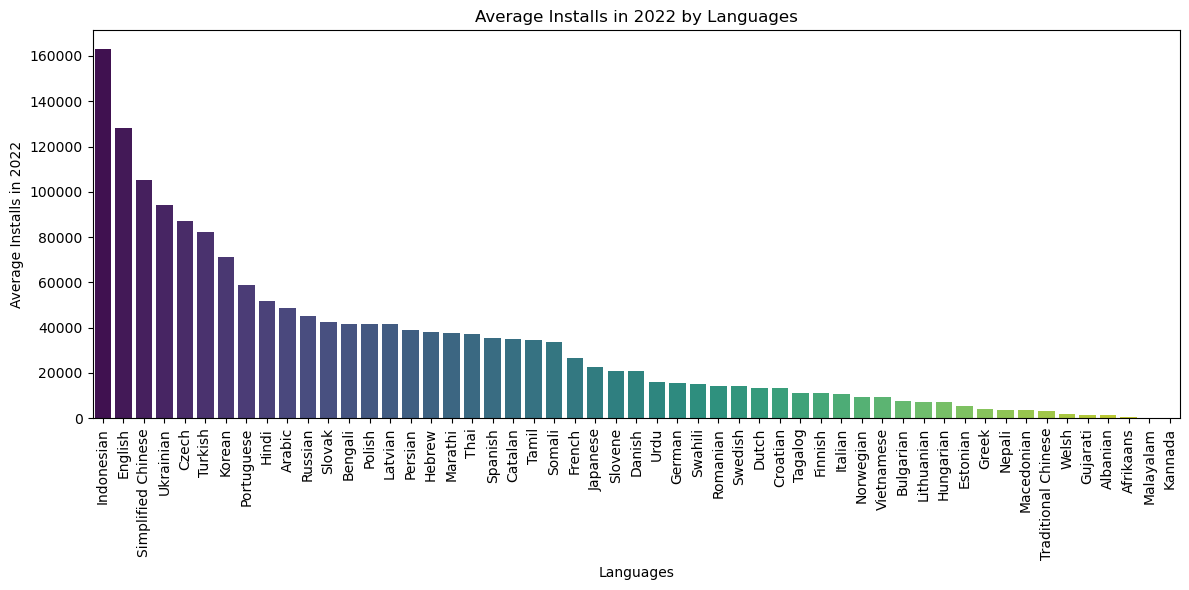

In [273]:
# import pandas as pd

# Create a new DataFrame with selected columns
new_df = handm[['language', 'installs_2022', 'id', 'title']].copy()

# Display the new DataFrame
print(new_df)

#give unique labels to all the languages

# from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'disease' column to get encoded values
new_df['encoded_language'] = label_encoder.fit_transform(new_df['language'])

# Simple linear regression for languages and installs_2022
# import pandas as pd
# import statsmodels.api as sm

# Load your dataset (if not already loaded)
# all_df = pd.read_csv('your_data.csv')

# Specify the dependent variable
y = new_df['installs_2022']

# Specify the independent variable you want to analyze
independent_var = 'encoded_language'  

# Add a constant term to the independent variable
X = sm.add_constant(new_df[independent_var])

# Perform simple linear regression
model = sm.OLS(y, X).fit()

# Display the regression summary
print(f"Independent Variable: {independent_var}")
print(model.summary())

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Load your dataset (if not already loaded)
# all_df = pd.read_csv('your_data.csv')

# Group data by 'languages' and calculate the mean of 'installs_2022' for each language
language_installs_mean = new_df.groupby('language')['installs_2022'].mean()

# Sort the values in descending order to see which languages have higher average installs
language_installs_mean = language_installs_mean.sort_values(ascending=False)

# Create a bar plot to visualize the average installs for each language
plt.figure(figsize=(12, 6))
sns.barplot(x=language_installs_mean.index, y=language_installs_mean.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Languages')
plt.ylabel('Average Installs in 2022')
plt.title('Average Installs in 2022 by Languages')
plt.tight_layout()
plt.savefig('google_big_db_language_installs_plot.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()

### Repeat this after selecting health and medical apps 

## Exploring languages and released years 
## Exploring languages and number of apps

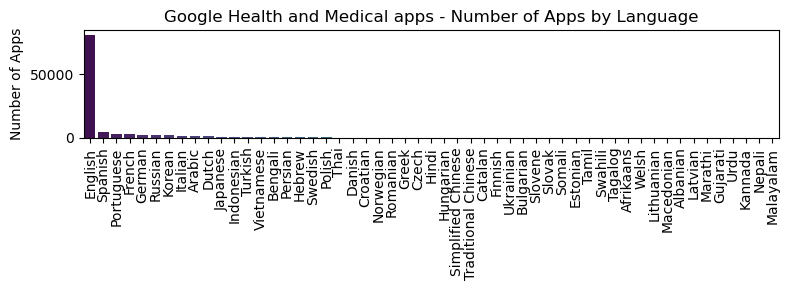

                                                       id  \
30                                       com.bei5000.debm   
374                 com.mengage.doctor.sixhundredfourteen   
865                         nopriadi.dedi.beratbadanideal   
1001    bachonkinazarebad.sehifazat.mrkhan.bachonkinaz...   
1062                                    com.vmedis.pasien   
...                                                   ...   
108438                       id.rspkuwonosobo.pendaftaran   
108604            com.mutiaradev.cara_menambah_beratbadan   
108618                                   ai.asaren.mobile   
108717                                com.kanodoc.kanodoc   
108880                                   toyolgroup88.com   

                                 title  \
30      DEBM - Diet Enak Bahagia Menye   
374              Shanti Yadav Hospital   
865           Hitung Berat Badan Ideal   
1001    Bachon Ki Nazar E Bad Se Hifaz   
1062      VmedisMart - Apotek Terdekat   
...            

In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Load your dataset (if not already loaded)
# google_df = pd.read_csv('your_data.csv')

# Count the occurrences of each unique value in the 'languages' column
language_counts = handm['language'].value_counts()

# Set up the figure and axes
plt.figure(figsize=(8, 3))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')
plt.xticks(rotation=90)
# plt.xlabel('Language')
plt.ylabel('Number of Apps')
plt.title('Google Health and Medical apps - Number of Apps by Language')
plt.tight_layout()

# Show the plot
plt.show()

# Load your dataset (if not already loaded)
# google_df = pd.read_csv('your_data.csv')

# Filter rows with the value 'Indonesian' in the 'languages' column
indonesian_rows = handm[handm['language'] == 'Indonesian']

# Print the rows
print(indonesian_rows) # 855 indonesian apps

# Filter rows with the value 'Indonesian' in the 'languages' column
english_rows = handm[handm['language'] == 'English']

# Print the rows
print(english_rows) # 80326 english apps

In [81]:
handm

id                           title  \
0                  com.mc.fixitformiband2            Fix-it for Mi Band 2   
1                  unifor.br.interautismo                    Interautismo   
2                    com.denta.network188    Первая Цифровая Стоматология   
3            com.nuance.powershare_mobile               Nuance PowerShare   
4                             com.planker  Planker - Plank Workout & Chal   
...                                   ...                             ...   
108940    com.migym.com.Xtra_Innings_Iowa               Xtra Innings Iowa   
108941    com.fitmetrix.planoathleticclub             Plano Athletic Club   
108942  com.kognito.togetherstrongspanish       Together Strong (Español)   
108943                      com.volta.cdf                          Le CDF   
108944  pl.shreqg2.sumator_hematologiczny  Hematological Cell Counter (RB   

                                                  summary  \
0                              Recover your unpaired band   
1       Support to the professional and family of chil...   
2       Application for online patient registration wi...   
3       Share, access and collaborate on medical image...   
4       Highly efficient plank workouts and challenges...   
...                                                   ...   
108940  Xtra Innings is a premier indoor hitting and t...   
108941  Download the Plano Athletic Club App today and...   
108942  Support your military friends - Practice conve...   
108943  The Dentist of France on your tablet and on yo...   
108944  Professional application dedicated to process ...   

                                              description      released  \
0       Can't get official app working anymore?\nAre y...   Oct 6, 2016   
1       O aplicativo Interautismo resultado de um proj...           NaN   
2       Приложение разработано с учетом пожеланий паци...  Nov 23, 2021   
3       Nuance PowerShare Mobile gives you instant acc...  Jan 24, 2021   
4       There are few forms of exercise as effective a...  Jan 10, 2019   
...                                                   ...           ...   
108940  Xtra Innings is central Iowa's premier indoor ...  Nov 23, 2021   
108941  Download the Plano Athletic Club App today. Fr...  Oct 29, 2021   
108942  Estuvo listo cuando su país llamo por usted. A...  Jan 22, 2015   
108943  Le Chirurgien-dentiste de France (CDF Mag) est...  Jun 26, 2014   
108944  Try out and explore this brand new, profession...  Apr 23, 2017   

        installs_2020  installs_2021  installs_2022  size android_2020  ...  \
0            645916.0       758433.0         823982  7.4M   4.3 and up  ...   
1               139.0          194.0            262   25M   4.4 and up  ...   
2                 NaN            NaN            115   NaN          NaN  ...   
3               994.0         1350.0           1873  5.2M   7.0 and up  ...   
4                 NaN         1422.0           1695  9.4M          NaN  ...   
...               ...            ...            ...   ...          ...  ...   
108940            NaN            NaN             20   NaN          NaN  ...   
108941            NaN            NaN            384   NaN          NaN  ...   
108942            NaN           37.0             37   16M          NaN  ...   
108943            NaN         1509.0           1552   17M          NaN  ...   
108944        18462.0        20295.0          22174   18M   4.1 and up  ...   

       price     score  ratings  \
0        0.0  3.110000   1373.0   
1        0.0  0.000000      0.0   
2        0.0  0.000000      0.0   
3        0.0  0.000000      0.0   
4        0.0  0.000000      0.0   
...      ...       ...      ...   
108940   0.0  0.000000      0.0   
108941   0.0  0.000000      0.0   
108942   0.0  0.000000      0.0   
108943   0.0  0.000000      0.0   
108944   0.0  4.833334    144.0   

                                                histogram  reviews    iap  \
0       {'1': 462, '2': 81, '3': 

In [82]:
# Figure 1: languages

plt.rcParams["font.family"] = "Times New Roman"
 
indian_languages_sorted = sorted(indian_languages)

# Language grouping 1: priority-wise - Indian, English, Other
handm["language_grouping1"] = handm["language"].apply(lambda x: "Indian" if x in indian_languages else x)
for i in range(len(handm)):
    if handm.loc[i, "language_grouping1"] in ["Indian", "English"]:
        continue
    else:
        handm.loc[i, "language_grouping1"] = "Other"

# Language grouping 2: English, Non-Indian, Hindi, Tamil etc.
handm["language_grouping2"] = handm["language"].apply(lambda x: x if x in indian_languages+["English"] else ["Other"])
language_counts = handm["language_grouping2"].explode().value_counts().to_frame()
allowed_languages = ["English", "Other"] + indian_languages_sorted
allowed_languages = pd.DataFrame(allowed_languages).set_index(0)
language_counts2 = allowed_languages.merge(language_counts, left_index=True, right_index=True, how="left").fillna(0).reset_index().rename(columns={0: "Language", "language_grouping2": "Count"})
language_counts2["Count"] = language_counts2["Count"].apply(int)

array([73.72435633, 25.77263757,  0.5030061 ])

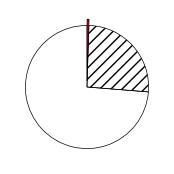

In [8]:
sizes = handm["language_grouping1"].explode().value_counts().to_list()

fig, ax = plt.subplots(figsize=(2,2))
wedges, texts = ax.pie(sizes, explode=(0,0,0.1), colors=["None", "None", "#aaaaaa"], startangle=90, wedgeprops=dict(edgecolor="k",linewidth=0.5))

# Apply hatching patterns
for wedge, hatch in zip(wedges, ['','///','']):
    wedge.set_hatch(hatch)

fig.savefig("languages_google_pie.pdf", bbox_inches='tight')
100*np.array(sizes)/sum(sizes)

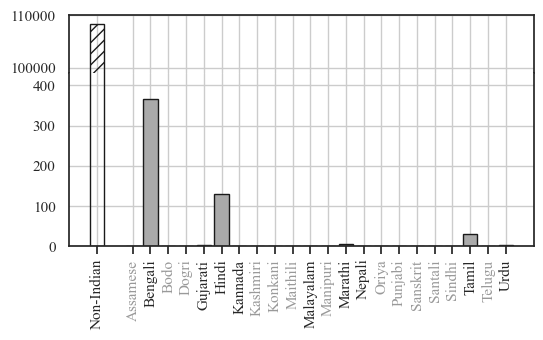

In [56]:
# Version 1
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={
                           'height_ratios': [1, 3],}, sharex=True, figsize=(6,3))
fig.subplots_adjust(hspace=0.0) 

ax1.bar(language_counts2.index[0], language_counts2.loc[0, "Count"], color="none", edgecolor="k")
ax2.bar(language_counts2.index[0], language_counts2.loc[0, "Count"], color="none", edgecolor="k")
ax1.bar(language_counts2.index[0], language_counts2.loc[1, "Count"], bottom=language_counts2.loc[0, "Count"], fill=False, hatch='///', edgecolor="k")
ax2.bar(language_counts2.index[2:], language_counts2.loc[2:,"Count"], color="#aaaaaa", edgecolor="k")

ax1.set_ylim(99000, 110000) 
ax2.set_ylim(0, 430)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.tick_params(labeltop=False)
ax2.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

xticks = list(range(len(language_counts2.index)))
xticks.remove(1)
xticklabels = list(language_counts2["Language"])
xticklabels.remove("Other")
xticklabels[0] = "Non-Indian"

ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklabels, rotation=90)

for i in range(len(ax2.get_xticklabels())):
    if language_counts2.loc[i+1,"Count"]==0:
        ax2.get_xticklabels()[i].set_color("#999999")
ax1.grid()
ax2.grid()
fig.savefig("languages_google.pdf", bbox_inches='tight')


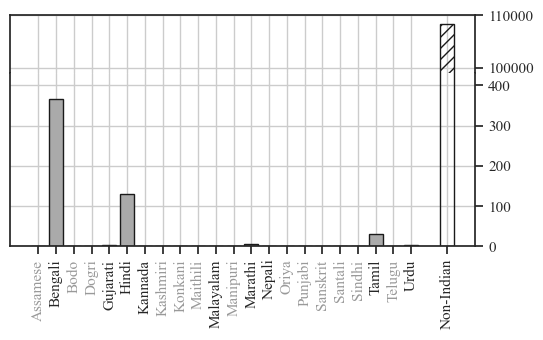

In [83]:
# Version 2

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={
                           'height_ratios': [1, 3],}, sharex=True, figsize=(6, 3))
fig.subplots_adjust(hspace=0.0) 

ax1.bar(language_counts2.index[0]+len(language_counts2.index)-1, language_counts2.loc[0, "Count"], color="none", edgecolor="k")
ax2.bar(language_counts2.index[0]+len(language_counts2.index)-1, language_counts2.loc[0, "Count"], color="none", edgecolor="k")
ax1.bar(language_counts2.index[0]+len(language_counts2.index)-1, language_counts2.loc[1, "Count"], bottom=language_counts2.loc[0, "Count"], fill=False, edgecolor="k", hatch='///')
ax2.bar(language_counts2.index[2:]-2, language_counts2.loc[2:,"Count"], color="#aaaaaa", edgecolor="k")

ax1.set_ylim(99000, 110000) 
ax2.set_ylim(0, 430)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax1.yaxis.tick_right()
ax2.yaxis.tick_right()

xticks = list(range(len(language_counts2.index)))
xticks.remove(len(xticks)-2)
xticklabels = list(language_counts2["Language"])
xticklabels.remove("Other")
xticklabels.remove("English")
xticklabels.append("Non-Indian")

ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklabels, rotation=90)
for i in range(len(ax2.get_xticklabels())-1):
    if language_counts2.loc[i+2,"Count"]==0:
        ax2.get_xticklabels()[i].set_color("#999999")
ax1.grid()
ax2.grid()
fig.savefig("languages_google.pdf", bbox_inches='tight')

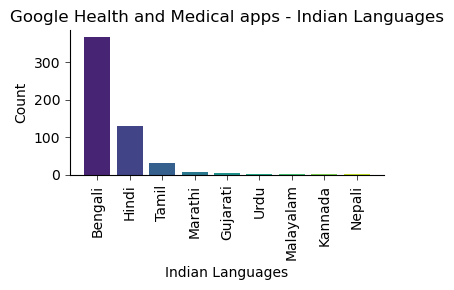

In [8]:
# Load your dataset (if not already loaded)
# handm = pd.read_csv('your_data.csv')

# List of Indian languages
indian_languages = [
    'Hindi',
    'Bengali',
    'Telugu',
    'Marathi',
    'Tamil',
    'Urdu',
    'Gujarati',
    'Kannada',
    'Oriya',
    'Punjabi',
    'Malayalam',
    'Assamese',
    'Maithili',
    'Nepali',
    'Konkani',
    'Manipuri',
    'Sanskrit',
    'Sindhi',
    'Santali',
    'Dogri',
    'Bodo',
    'Kashmiri'
]

# Filter rows with Indian languages
indian_apps_df = handm[handm['language'].apply(lambda lang: isinstance(lang, str) and any(indian_lang.lower() in lang.lower() for indian_lang in indian_languages))]

# Count the occurrences of each Indian language in the filtered DataFrame
indian_language_counts = indian_apps_df['language'].value_counts()

# Filter out non-Indian languages
indian_language_counts = indian_language_counts[indian_language_counts.index.isin(indian_languages)]

# Sort the language counts in descending order
sorted_language_counts = indian_language_counts.sort_values(ascending=False)

# Define the color palette
colors = sns.color_palette("viridis", len(sorted_language_counts))

# Create a bar plot of Indian language counts with the specified color palette
plt.figure(figsize=(4, 3))
bars = plt.bar(sorted_language_counts.index, sorted_language_counts.values, color=colors)
plt.xlabel('Indian Languages')
plt.ylabel('Count')
plt.title('Google Health and Medical apps - Indian Languages')

# Customize style and layout
plt.xticks(rotation=90, ha='center', va='top', fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_tick_params(width=0.5)
plt.gca().yaxis.set_tick_params(width=0.5)

# Remove numbers on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '', ha='center', va='bottom')

# Save the plot
plt.tight_layout()
plt.savefig('indian_language_counts.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [275]:
english_rows

id                           title  \
0                  com.mc.fixitformiband2            Fix-it for Mi Band 2   
3            com.nuance.powershare_mobile               Nuance PowerShare   
4                             com.planker  Planker - Plank Workout & Chal   
5             com.fitivity.dynamic_warmup   Dynamic Warm Up & Flexibility   
6       com.newandromo.dev29159.app759746               Fat Burning Meals   
...                                   ...                             ...   
108938           com.healure.painrecovery  Healure: Physiotherapy Exercis   
108939                   dk.gynzone.birth                 Birth Positions   
108940    com.migym.com.Xtra_Innings_Iowa               Xtra Innings Iowa   
108941    com.fitmetrix.planoathleticclub             Plano Athletic Club   
108944  pl.shreqg2.sumator_hematologiczny  Hematological Cell Counter (RB   

                                                  summary  \
0                              Recover your unpaired band   
3       Share, access and collaborate on medical image...   
4       Highly efficient plank workouts and challenges...   
5       Improve flexibility, strength and overall athl...   
6       fat burning meals the best app to lose weight,...   
...                                                   ...   
108938  Easy-to-use,<b>home physiotherapy exercise app...   
108939  Birth Positions - an active choice. Inspiratio...   
108940  Xtra Innings is a premier indoor hitting and t...   
108941  Download the Plano Athletic Club App today and...   
108944  Professional application dedicated to process ...   

                                              description      released  \
0       Can't get official app working anymore?\nAre y...   Oct 6, 2016   
3       Nuance PowerShare Mobile gives you instant acc...  Jan 24, 2021   
4       There are few forms of exercise as effective a...  Jan 10, 2019   
5       Fitivity gets you better. Looks like you’re he...  Jul 22, 2013   
6       When you're looking to boost your metabolism a...  May 28, 2020   
...                                                   ...           ...   
108938  1000+ exercises combined with individual asses...  Oct 14, 2017   
108939  Birth is movement\n\nBirth Positions - an acti...   Mar 2, 2016   
108940  Xtra Innings is central Iowa's premier indoor ...  Nov 23, 2021   
108941  Download the Plano Athletic Club App today. Fr...  Oct 29, 2021   
108944  Try out and explore this brand new, profession...  Apr 23, 2017   

        installs_2020  installs_2021  installs_2022  size  android_2020  ...  \
0            645916.0       758433.0         823982  7.4M    4.3 and up  ...   
3               994.0         1350.0           1873  5.2M    7.0 and up  ...   
4                 NaN         1422.0           1695  9.4M           NaN  ...   
5                 NaN        36710.0          37428   85M           NaN  ...   
6                 NaN         1583.0           1658   14M           NaN  ...   
...               ...            ...            ...   ...           ...  ...   
108938        30690.0        33031.0          35152   22M    4.4 and up  ...   
108939          294.0          326.0            356  3.0M  4.0.3 and up  ...   
108940            NaN            NaN             20   NaN           NaN  ...   
108941            NaN            NaN            384   NaN           NaN  ...   
108944        18462.0        20295.0          22174   18M    4.1 and up  ...   

        price     score  ratings  \
0         0.0  3.110000   1373.0   
3         0.0  0.000000      0.0   
4         0.0  0.000000      0.0   
5         0.0  3.222222    199.0   
6         0.0  0.000000      0.0   
...       ...       ...      ...   
108938    0.0  4.390000    208.0   
108939  340.0  0.000000      0.0   
108940    0.0  0.000000      0.0   
108941    0.0  0.000000      0.0   
108944    0.0  4.833334    144.0   

                                                histogram  reviews    iap  \
0       {

In [276]:
handm['released']

0          Oct 6, 2016
1                  NaN
2         Nov 23, 2021
3         Jan 24, 2021
4         Jan 10, 2019
              ...     
108940    Nov 23, 2021
108941    Oct 29, 2021
108942    Jan 22, 2015
108943    Jun 26, 2014
108944    Apr 23, 2017
Name: released, Length: 108945, dtype: object

#### To visualize the trends of release years of apps according to language, you can create a line plot where each line represents the number of apps released in a specific language for each year

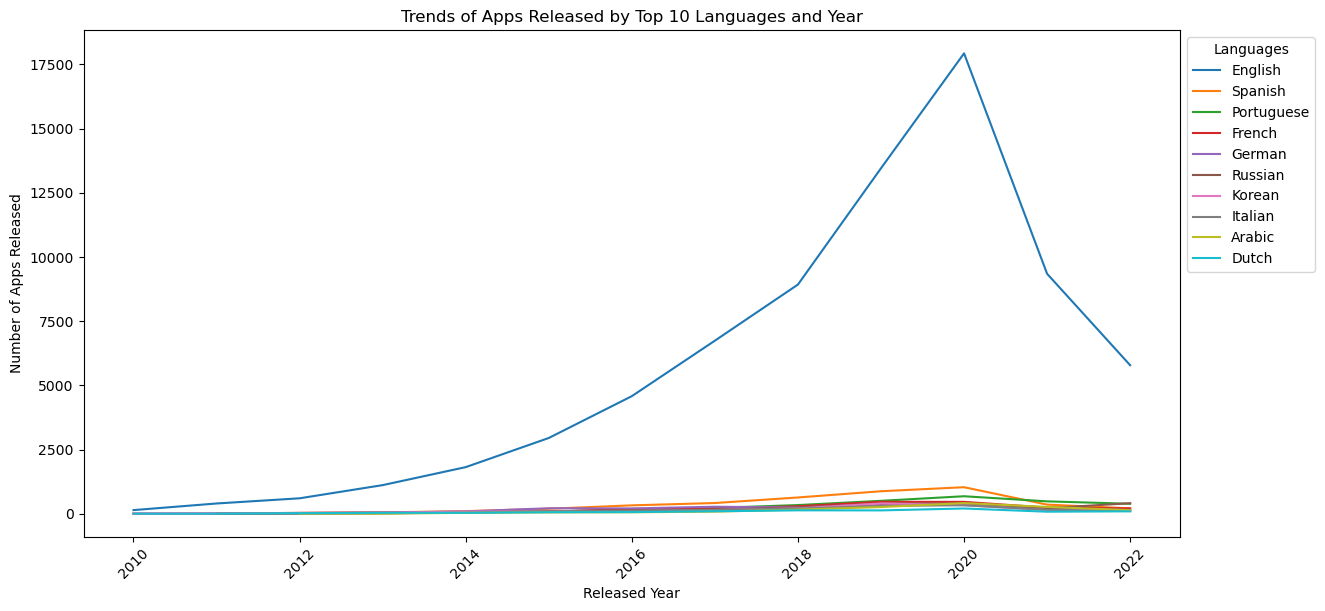

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already transformed the 'released' column to datetime
handm['released_year'] = pd.to_datetime(handm['released'], errors='coerce')

# Group data by 'language' and 'released_year', and count the number of apps for each combination
language_released_counts = handm.groupby(['language', handm['released_year'].dt.year])['id'].count().reset_index()

# Get the top 10 languages by total counts
top_languages = language_released_counts.groupby('language')['id'].sum().sort_values(ascending=False).head(10).index

# Filter the data for the top languages
top_language_released_counts = language_released_counts[language_released_counts['language'].isin(top_languages)]

# Plot the trends of release years for the top 10 languages using line plots
plt.figure(figsize=(12, 6))

for language in top_languages:
    language_data = top_language_released_counts[top_language_released_counts['language'] == language]
    plt.plot(language_data['released_year'], language_data['id'], label=language)

plt.xlabel('Released Year')
plt.ylabel('Number of Apps Released')
plt.title('Trends of Apps Released by Top 10 Languages and Year')
plt.tight_layout()
plt.legend(title='Languages', bbox_to_anchor=(1, 1))  # Move legend outside the plot
plt.xticks(rotation=45)
plt.show()


#### 'Trends of Apps Released by Top Languages (Excluding English) and Year'

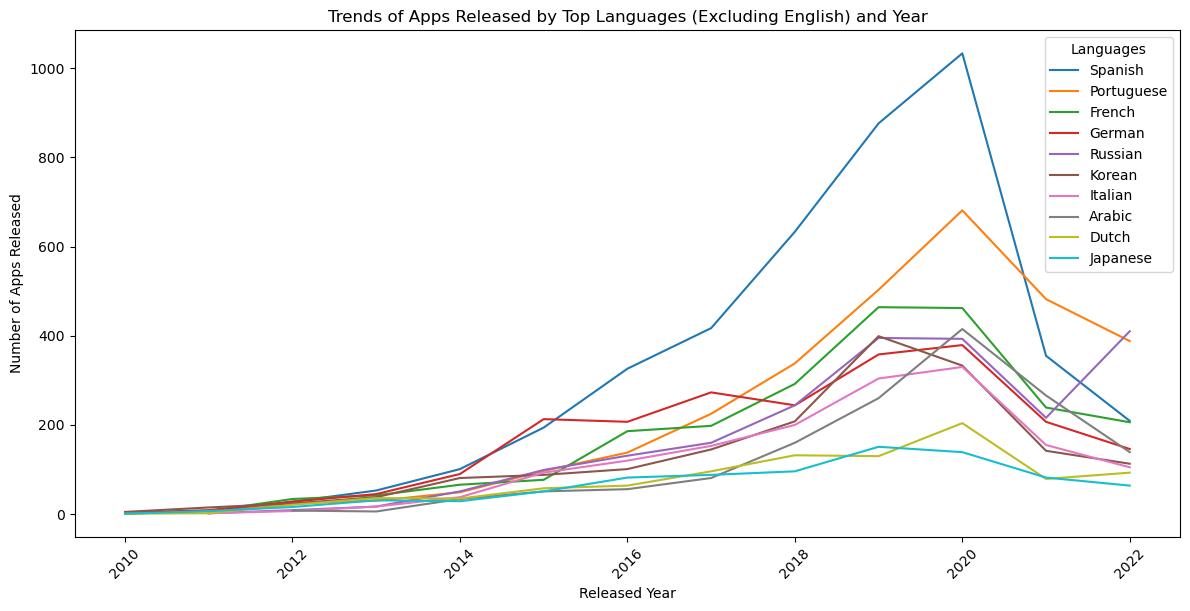

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already transformed the 'released' column to datetime
handm['released_year'] = pd.to_datetime(handm['released_year'], errors='coerce')

# Group data by 'language' and 'released_year', and count the number of apps for each combination
language_released_counts = handm.groupby(['language', handm['released_year'].dt.year])['id'].count().reset_index()

# Get the top languages by total counts excluding 'English'
top_languages_exclude_english = language_released_counts[language_released_counts['language'] != 'English'] \
    .groupby('language')['id'].sum().sort_values(ascending=False).head(10).index

# Filter the data for the top languages excluding 'English'
top_language_released_counts_exclude_english = language_released_counts[
    language_released_counts['language'].isin(top_languages_exclude_english)]

# Plot the trends of release years for the top languages excluding 'English' using line plots
plt.figure(figsize=(12, 6))

for language in top_languages_exclude_english:
    language_data = top_language_released_counts_exclude_english[
        top_language_released_counts_exclude_english['language'] == language]
    plt.plot(language_data['released_year'], language_data['id'], label=language)

plt.xlabel('Released Year')
plt.ylabel('Number of Apps Released')
plt.title('Trends of Apps Released by Top Languages (Excluding English) and Year')
plt.tight_layout()
plt.legend(title='Languages', bbox_to_anchor=(1, 1))  # Move legend outside the plot
plt.xticks(rotation=45)
plt.show()


## % of apps according to languages


In [279]:
import pandas as pd

# Assuming you have the 'language' column in your DataFrame
# Load your data or use your existing DataFrame
# handm = pd.read_csv('your_data.csv')

# Define Indian languages
# List of Indian languages
indian_languages = [
    'Hindi',
    'Bengali',
    'Telugu',
    'Marathi',
    'Tamil',
    'Urdu',
    'Gujarati',
    'Kannada',
    'Oriya',
    'Punjabi',
    'Malayalam',
    'Assamese',
    'Maithili',
    'Nepali',
    'Konkani',
    'Manipuri',
    'Sanskrit',
    'Sindhi',
    'Santali',
    'Dogri',
    'Bodo'
]

# Calculate the total number of rows in the dataset
total_rows = len(handm)

# Calculate the total number of rows with Indian languages
indian_language_rows = len(handm[handm['language'].isin(indian_languages)])

# Calculate the percentage of Indian language rows in the entire dataset
indian_language_percentage = (indian_language_rows / total_rows) * 100

print(f"Percentage of Indian languages in the dataset: {indian_language_percentage:.2f}%")

## Percentage of Indian languages in the dataset: 0.50%


Percentage of Indian languages in the dataset: 0.50%


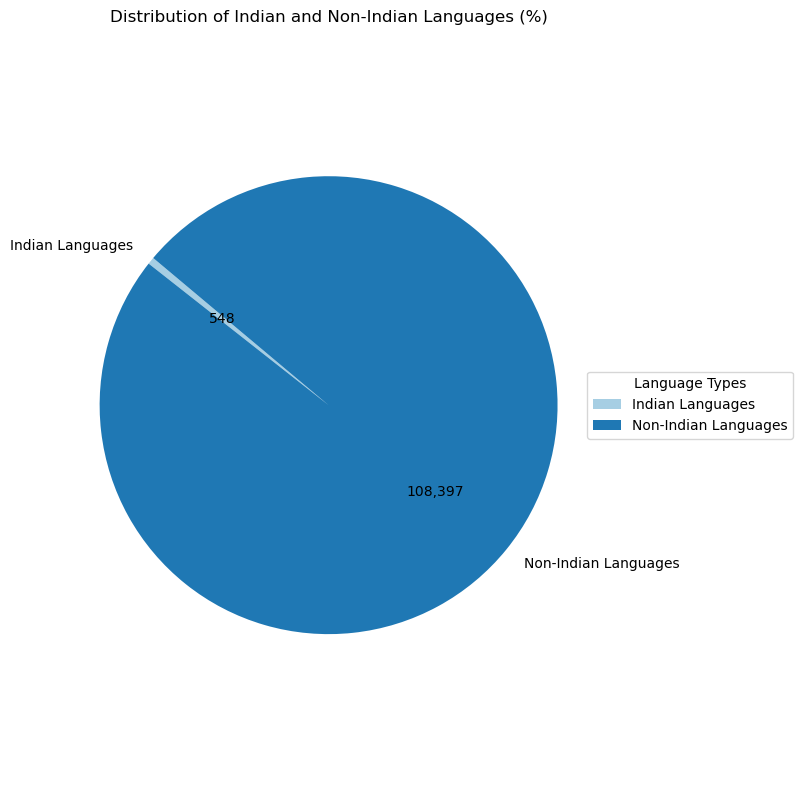

In [280]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'language' column in your DataFrame
# Load your data or use your existing DataFrame
# handm = pd.read_csv('your_data.csv')

# Define Indian languages
# List of Indian languages
# indian_languages = [
#     'Hindi',
#     'Bengali',
#     'Telugu',
#     'Marathi',
#     'Tamil',
#     'Urdu',
#     'Gujarati',
#     'Kannada',
#     'Oriya',
#     'Punjabi',
#     'Malayalam',
#     'Assamese',
#     'Maithili',
#     'Nepali',
#     'Konkani',
#     'Manipuri',
#     'Sanskrit',
#     'Sindhi',
#     'Santali',
#     'Dogri',
#     'Bodo'
# ]

# Calculate the counts of Indian and non-Indian languages
indian_language_count = handm['language'].isin(indian_languages).sum()
non_indian_language_count = len(handm) - indian_language_count

# Create a dictionary for the language counts
language_counts = {
    'Indian Languages': indian_language_count,
    'Non-Indian Languages': non_indian_language_count
}

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired(range(len(language_counts)))
wedges, texts, autotexts = plt.pie(language_counts.values(), labels=language_counts.keys(), autopct='%1.1f%%', startangle=140, colors=colors)

# Annotate top Indian languages
for i, (label, count) in enumerate(language_counts.items()):
    texts[i].set_fontsize(10)
    autotexts[i].set_fontsize(10)
    autotexts[i].set_text(f'{count:,}')

plt.title('Distribution of Indian and Non-Indian Languages (%)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a legend with custom labels
plt.legend(wedges, language_counts.keys(), title='Language Types', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()


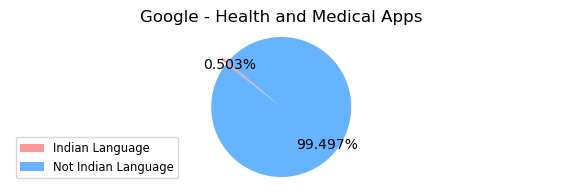

In [353]:
import matplotlib.pyplot as plt

# Calculate the counts of Indian and non-Indian languages
indian_language_count = handm['language'].isin(indian_languages).sum()
non_indian_language_count = len(handm) - indian_language_count

# Create a pie chart
sizes = [indian_language_count, non_indian_language_count]
colors = ['#ff9999', '#66b3ff']  # Custom colors for the slices
explode = (0.1, 0)  # explode 1st slice

# Use a custom autopct format string to show more decimal places
autopct_format = '%.3f%%'

plt.figure(figsize=(7, 2))  # Adjust the size of the pie chart
wedges, texts, autotexts = plt.pie(sizes, explode=explode, colors=colors, autopct=autopct_format, pctdistance=0.85, shadow=False, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a legend with labels and reduce the font size
labels = ['Indian Language', 'Not Indian Language']
legend = plt.legend(wedges, labels, loc='lower left', fontsize='small')

# Set the labels in the legend to be outside the pie chart
for text in texts:
    text.set_horizontalalignment('center')

plt.title('Google - Health and Medical Apps')
plt.show()

## Which language apps have the most numebr of avg installs, and most num of sum of installs together

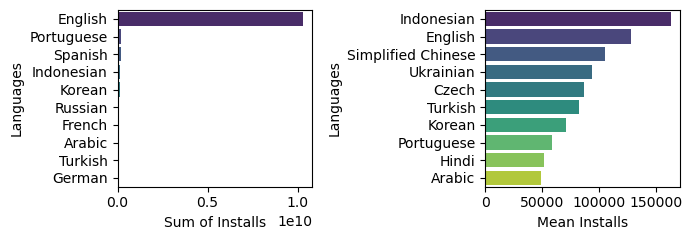

In [359]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Group data by 'language' and calculate the sum and mean of installs for each language
language_installs_sum = handm.groupby('language')['installs_2022'].sum()
language_installs_mean = handm.groupby('language')['installs_2022'].mean()

# Sort the values in descending order for both sum and mean
language_installs_sum = language_installs_sum.sort_values(ascending=False).head(10)
language_installs_mean = language_installs_mean.sort_values(ascending=False).head(10)

# Create two subplots for sum and mean of installs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 2.5))

# Plot for sum of installs
sns.barplot(x=language_installs_sum.values, y=language_installs_sum.index, ax=axes[0], palette='viridis')
# axes[0].set_title('Top 10 Languages by Sum of Installs in 2022')
axes[0].set_xlabel('Sum of Installs')
axes[0].set_ylabel('Languages')

# Plot for mean of installs
sns.barplot(x=language_installs_mean.values, y=language_installs_mean.index, ax=axes[1], palette='viridis')
# axes[1].set_title('Top 10 Languages by Mean Installs in 2022')
axes[1].set_xlabel('Mean Installs')
axes[1].set_ylabel('Languages')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## Languages vs score, ratings and reviews

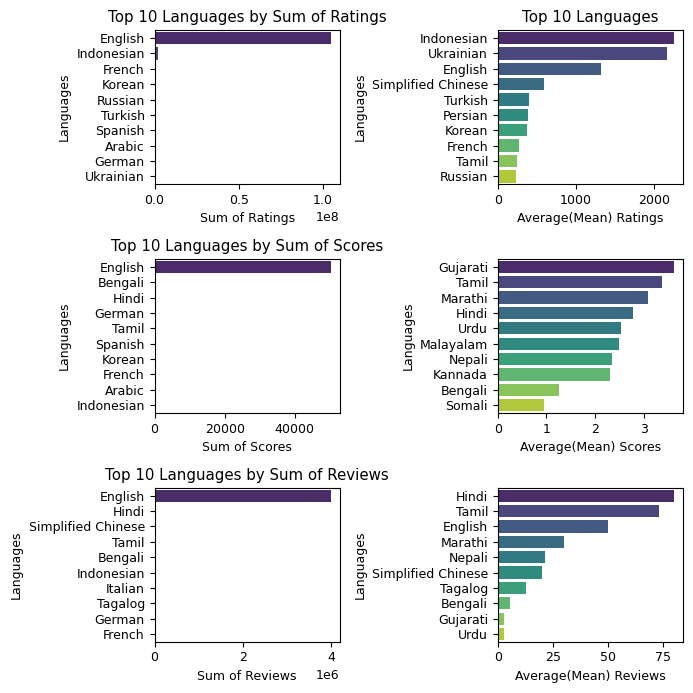

In [364]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Group data by 'language' and calculate the sum and mean of ratings for each language
language_ratings_sum = handm.groupby('language')['ratings'].sum()
language_ratings_mean = handm.groupby('language')['ratings'].mean()

# Group data by 'language' and calculate the sum and mean of scores for each language
language_scores_sum = handm.groupby('language')['score'].sum()
language_scores_mean = handm.groupby('language')['score'].mean()

# Group data by 'language' and calculate the sum and mean of reviews for each language
language_reviews_sum = handm.groupby('language')['reviews'].sum()
language_reviews_mean = handm.groupby('language')['reviews'].mean()

# Sort the values in descending order for sum and mean ratings, scores, and reviews
language_ratings_sum = language_ratings_sum.sort_values(ascending=False).head(10)
language_ratings_mean = language_ratings_mean.sort_values(ascending=False).head(10)
language_scores_sum = language_scores_sum.sort_values(ascending=False).head(10)
language_scores_mean = language_scores_mean.sort_values(ascending=False).head(10)
language_reviews_sum = language_reviews_sum.sort_values(ascending=False).head(10)
language_reviews_mean = language_reviews_mean.sort_values(ascending=False).head(10)

# Create subplots for sum and mean ratings, scores, and reviews
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
# Set the default font size for the entire plot
plt.rcParams['font.size'] = 9

# Plot for sum of ratings
sns.barplot(x=language_ratings_sum.values, y=language_ratings_sum.index, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Top 10 Languages by Sum of Ratings')
axes[0, 0].set_xlabel('Sum of Ratings')
axes[0, 0].set_ylabel('Languages')

# Plot for mean of ratings
sns.barplot(x=language_ratings_mean.values, y=language_ratings_mean.index, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Top 10 Languages')
axes[0, 1].set_xlabel('Average(Mean) Ratings')
axes[0, 1].set_ylabel('Languages')

# Plot for sum of scores
sns.barplot(x=language_scores_sum.values, y=language_scores_sum.index, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Top 10 Languages by Sum of Scores')
axes[1, 0].set_xlabel('Sum of Scores')
axes[1, 0].set_ylabel('Languages')

# Plot for mean of scores
sns.barplot(x=language_scores_mean.values, y=language_scores_mean.index, ax=axes[1, 1], palette='viridis')
# axes[1, 1].set_title('Top 10 Languages by Average(Mean) Scores')
axes[1, 1].set_xlabel('Average(Mean) Scores')
axes[1, 1].set_ylabel('Languages')

# Plot for sum of reviews
sns.barplot(x=language_reviews_sum.values, y=language_reviews_sum.index, ax=axes[2, 0], palette='viridis')
axes[2, 0].set_title('Top 10 Languages by Sum of Reviews')
axes[2, 0].set_xlabel('Sum of Reviews')
axes[2, 0].set_ylabel('Languages')

# Plot for mean of reviews
sns.barplot(x=language_reviews_mean.values, y=language_reviews_mean.index, ax=axes[2, 1], palette='viridis')
# axes[2, 1].set_title('Top 10 Languages by Mean Reviews')
axes[2, 1].set_xlabel('Average(Mean) Reviews')
axes[2, 1].set_ylabel('Languages')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


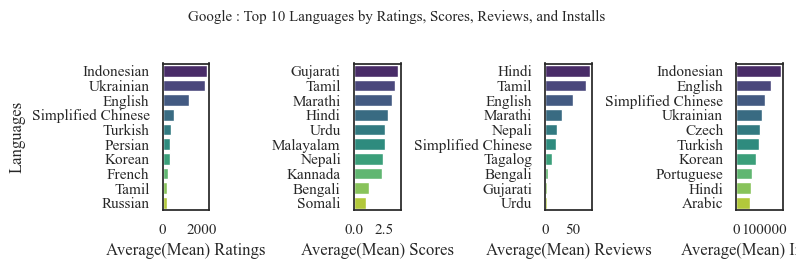

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'language' and calculate the mean of ratings for each language
language_ratings_mean = handm.groupby('language')['ratings'].mean()

# Group data by 'language' and calculate the mean of scores for each language
language_scores_mean = handm.groupby('language')['score'].mean()

# Group data by 'language' and calculate the mean of reviews for each language
language_reviews_mean = handm.groupby('language')['reviews'].mean()

# Group data by 'language' and calculate the mean of installs for each language
language_installs_mean = handm.groupby('language')['installs_2022'].mean()

# Sort the values in descending order for mean ratings, scores, reviews, and installs
language_ratings_mean = language_ratings_mean.sort_values(ascending=False).head(10)
language_scores_mean = language_scores_mean.sort_values(ascending=False).head(10)
language_reviews_mean = language_reviews_mean.sort_values(ascending=False).head(10)
language_installs_mean = language_installs_mean.sort_values(ascending=False).head(10)

# Create a single row of subplots for mean ratings, mean scores, mean reviews, and mean installs
fig, axes = plt.subplots(ncols=4, figsize=(8, 2.5))

# Set the default font size for the entire plot
plt.rcParams['font.size'] = 9

# Plot for mean ratings
sns.barplot(x=language_ratings_mean.values, y=language_ratings_mean.index, ax=axes[0], palette='viridis')
axes[0].set_xlabel('Average(Mean) Ratings')
axes[0].set_ylabel('Languages')

# Plot for mean scores
sns.barplot(x=language_scores_mean.values, y=language_scores_mean.index, ax=axes[1], palette='viridis')
axes[1].set_xlabel('Average(Mean) Scores')
axes[1].set_ylabel('')  # Empty y-label for subsequent plots

# Plot for mean reviews
sns.barplot(x=language_reviews_mean.values, y=language_reviews_mean.index, ax=axes[2], palette='viridis')
axes[2].set_xlabel('Average(Mean) Reviews')
axes[2].set_ylabel('')  # Empty y-label for subsequent plots

# Plot for mean installs
sns.barplot(x=language_installs_mean.values, y=language_installs_mean.index, ax=axes[3], palette='viridis')
axes[3].set_xlabel('Average(Mean) Installs')
axes[3].set_ylabel('')  # Empty y-label for subsequent plots

# Set the title for the entire row of plots
plt.suptitle('Google : Top 10 Languages by Ratings, Scores, Reviews, and Installs', y=1.05)

# Adjust layout to allocate more space for y-labels
plt.subplots_adjust(wspace=0.4)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


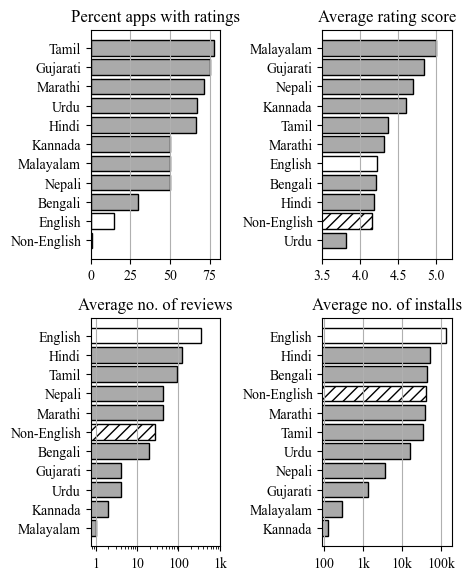

In [20]:
cm = 1/2.54
plt.rcParams["font.family"] = "Times New Roman"

handm["language_grouping2"] = handm["language"].apply(lambda x: x if x in indian_languages+["English"] else "Non-English")

language_scores_exist = handm.groupby('language_grouping2')['score'].agg(lambda x: 100*sum(x>0)/len(x))
handm["score"] = handm["score"].replace({0: np.nan})
handm["reviews"] = handm["reviews"].replace({0: np.nan})
language_scores_mean = handm.groupby('language_grouping2')['score'].mean()
language_reviews_mean = handm.groupby('language_grouping2')['reviews'].mean()
language_installs_mean = handm.groupby('language_grouping2')['installs_2022'].mean()
language_scores_exist = language_scores_exist.sort_values(ascending=False)
language_scores_mean = language_scores_mean.sort_values(ascending=False)
language_reviews_mean = language_reviews_mean.sort_values(ascending=False)
language_installs_mean = language_installs_mean.sort_values(ascending=False)

fig, axs = plt.subplots(2, 2, figsize=(12*cm, 15*cm))

# Percent apps with scores
colors = []
hatches = []
fills = []
for i in range(len(language_scores_exist)):
    if language_scores_exist.index[i] in indian_languages:
        fills.append(True)
        colors.append("#aaaaaa")
        hatches.append("")
    elif language_scores_exist.index[i]=="English":
        fills.append(True)
        colors.append("#ffffff")
        hatches.append("")
    else:
        fills.append(False)
        colors.append("none")
        hatches.append("///")

ax = axs[0,0]
ax.barh(language_scores_exist.index, language_scores_exist.values, fill=fills, color=colors, hatch=hatches, edgecolor="k")
ax.set_title('Percent apps with ratings')
# ax.set_xlim([3.8, 5.2])
ax.set_ylabel('')
ax.set_xlabel('')
ax.invert_yaxis()
ax.set_xticks([0, 25, 50, 75])
ax.xaxis.grid()

# Average scores
colors = []
hatches = []
fills = []
for i in range(len(language_scores_mean)):
    if language_scores_mean.index[i] in indian_languages:
        fills.append(True)
        colors.append("#aaaaaa")
        hatches.append("")
    elif language_scores_mean.index[i]=="English":
        fills.append(True)
        colors.append("#ffffff")
        hatches.append("")
    else:
        fills.append(False)
        colors.append("none")
        hatches.append("///")

ax = axs[0,1]
ax.barh(language_scores_mean.index, language_scores_mean.values, fill=fills, color=colors, hatch=hatches, edgecolor="k")
ax.set_title('Average rating score')
ax.set_xlim([3.5, 5.2])
ax.set_xticks([3.5, 4.0, 4.5, 5.0])
ax.set_ylabel('')
ax.set_xlabel('')
ax.invert_yaxis()
ax.xaxis.grid()

# Average reviews
colors = []
hatches = []
fills = []
for i in range(len(language_reviews_mean)):
    if language_reviews_mean.index[i] in indian_languages:
        fills.append(True)
        colors.append("#aaaaaa")
        hatches.append("")
    elif language_reviews_mean.index[i]=="English":
        fills.append(True)
        colors.append("#ffffff")
        hatches.append("")
    else:
        fills.append(False)
        colors.append("none")
        hatches.append("///")

ax = axs[1,0]
ax.barh(language_reviews_mean.index, language_reviews_mean.values, fill=fills, color=colors, hatch=hatches, edgecolor="k")
ax.set_title('Average no. of reviews')
ax.set_ylabel('')
ax.set_xlabel('')
ax.invert_yaxis()
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000])
ax.set_xticklabels(['1', '10', '100', '1k'])
ax.xaxis.grid()

# Average installs
colors = []
hatches = []
fills = []
for i in range(len(language_installs_mean)):
    if language_installs_mean.index[i] in indian_languages:
        fills.append(True)
        colors.append("#aaaaaa")
        hatches.append("")
    elif language_installs_mean.index[i]=="English":
        fills.append(True)
        colors.append("#ffffff")
        hatches.append("")
    else:
        fills.append(False)
        colors.append("none")
        hatches.append("///")

ax = axs[1,1]
ax.barh(language_installs_mean.index, language_installs_mean.values, fill=fills, color=colors, hatch=hatches, edgecolor="k")
ax.set_title('Average no. of installs')
ax.set_ylabel('')
ax.set_xlabel('')
ax.invert_yaxis()
ax.set_xscale('log')
ax.set_xticks([100, 1000, 10000, 100000])
ax.set_xticklabels(['100', '1k', '10k', '100k'])
ax.xaxis.grid()

fig.tight_layout()
fig.savefig("top_languages_by_attr.pdf")

In [123]:
handm["language"]


0            English
1         Portuguese
2            Russian
3            English
4            English
             ...    
108940       English
108941       English
108942       Spanish
108943        French
108944       English
Name: language, Length: 108945, dtype: object

## Taking out vet words - Use health and medical handm english_df from now on

### Selecting Health and Medical apps and making monograms and bigrams for them 

#### Making monograms and bigrams for handm dataset

In [284]:

handm_eng = handm.loc[handm['language']=='English']
# eng['tokenized_description'] = eng.apply(lambda row: [x.lower() for x in word_tokenize(row['description'])], axis=1)
handm_eng

# Assuming your DataFrame is named df
handm_eng.to_csv('handm_eng_google_apps.csv', index=False) #change the file name here

In [285]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
import re

# Download NLTK data for tokenization
# nltk.download('punkt')

# Define a function to preprocess text and remove stop words
def preprocess_text(text):
    if text is not None and isinstance(text, str):
        # Remove punctuation and unnecessary symbols
        text = re.sub('[' + string.punctuation + ']', '', text)

        # Tokenize the text into individual words, including hyphenated words
        tokens = word_tokenize(text.lower())

        # Read stopwords from a local file and store as a list
        with open("stopwords_git.txt", "r") as file:
            stopwords_list = file.read().splitlines()

        # Additional custom stop words
        extra_stop_words = ['–', '1', '-', 'also', 'always', 'often', 'app', ',', '(', ')', '{', '}', '.', '!', '?', '--', '/b', '\'s', '\'\'', 'n\'t', '"',
                            'based', 'href', 'url', 'http', '\\', '/', '\'re', "''", "``", '•', '●', '·', '⁃', '’', '✔', '◼️', '✰', '❖', '—', '⦁', 'है।', 'के']
        all_stop_words = stopwords_list + extra_stop_words

        tokens = [token for token in tokens if token not in all_stop_words]

        # Remove hyphens at the beginning and in between words
        tokens = [re.sub('-+', '', token) for token in tokens]

        # Return the preprocessed tokens as a list
        return tokens
    else:
        return []

# Apply the preprocessing function to the 'title' column
handm_eng['title_tokens'] = handm_eng['title'].apply(preprocess_text)
handm_eng['summary_tokens'] = handm_eng['summary'].apply(preprocess_text)
handm_eng['description_tokens'] = handm_eng['description'].apply(preprocess_text)

# Generate bigrams for each row in the 'title_tokens' column
handm_eng['title_bigrams'] = handm_eng['title_tokens'].apply(lambda x: list(ngrams(x, 2, pad_left=True, pad_right=True)))

# Generate bigrams for each row in the 'description_tokens' column
handm_eng['summary_bigrams'] = handm_eng['summary_tokens'].apply(lambda x: list(ngrams(x, 2, pad_left=True, pad_right=True)))

# Generate bigrams for each row in the 'description_tokens' column
handm_eng['description_bigrams'] = handm_eng['description_tokens'].apply(lambda x: list(ngrams(x, 2, pad_left=True, pad_right=True)))

# Generate monograms (single words) for each row in the 'title_tokens' column
handm_eng['title_monograms'] = handm_eng['title_tokens'].apply(lambda x: [token for token in x if '-' not in token])

# Generate monograms (single words) for each row in the 'title_tokens' column
handm_eng['summary_monograms'] = handm_eng['summary_tokens'].apply(lambda x: [token for token in x if '-' not in token])

# Generate monograms (single words) for each row in the 'description_tokens' column
handm_eng['description_monograms'] = handm_eng['description_tokens'].apply(lambda x: [token for token in x if '-' not in token])

handm_eng.to_csv('english_hm_google_apps.csv', index=False)
# Read the CSV file into a DataFrame
handm_eng = pd.read_csv('english_hm_google_apps.csv')

/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_21955/2560492134.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handm_eng['title_tokens'] = handm_eng['title'].apply(preprocess_text)
/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_21955/2560492134.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handm_eng['summary_tokens'] = handm_eng['summary'].apply(preprocess_text)
/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_21955/2560492134.py:41: SettingWithCopyWarning: 
A 

In [286]:
# Creating a list of words for Ischemic Heart Disease and associated conditions
disease_1_list = ['vet', 'veterinary', 'animal', 'dog', 'cat', 'pet']
#Tokenising and stemising these words
import nltk
from nltk.stem import SnowballStemmer

# Define the stemmer;llk
stemmer = SnowballStemmer('english')

# Tokenize and stem each word in the disease list and store in a new list
disease_list_stemmed = []
for phrase in disease_1_list:
    tokens = nltk.word_tokenize(phrase)
    stems = [stemmer.stem(token) for token in tokens]
    disease_list_stemmed += stems

# Remove duplicates from the list and words 'stable', 'unstable', and 'disease'
# disease_list_clean = list(set([word for word in disease_list_stemmed if word not in ['care', 'health', 'well', 'track', 'nutrit', 'behavior',
                                                                                      # 'train' ]]))
disease_list_clean = disease_list_stemmed
# Print the cleaned disease list
print('Tokenised and Summarised disease terms list is - ', disease_list_clean)

# Tokenised and Summarised disease terms list is -  
# ['vet', 'veterinari', 'anim', 'dog', 'cat', 'pet', 'anim', 'pet', 'groom', 'adopt', 
# 'rescu', 'communic', 'pet', 'insur', 'shelter', 'pet', 'first', 'aid', 'anim',
#  'therapi', 'pet-friend', 'anim', 'lover', 'pet', 'suppli', 'anim', 'hospit', 'asana', 'pranayama', 'yoga', 
# 'pose', 'yoga', 'workout', 'yoga', 'exercis', 'yoga', 'routin', 'yoga', 'class', 'yoga', 'train', 'yoga', 'practic', 
# 'yoga', 'session', 'mind', 'relax', 'contempl', 'deep', 'breath', 'mental', 'calm', 'inner', 'peac', 'self-reflect',
#  'stress', 'relief', 'guid', 'medit', 'medit', 'exercis']
#----------------------------------------------------------

# Counting Disease terms in tokenised and stemmized - Title, Summary and description

# Check the data type of each column
print(handm_eng['title_monograms'].apply(type))
print(handm_eng['summary_monograms'].apply(type))
print(handm_eng['description_monograms'].apply(type))

# Define a function to calculate the frequency of disease terms in a list of words
def count_disease_terms(text, disease_list_clean):
    # Count the frequency of each disease term in the list of words
    freq = {term: 0 for term in disease_list_clean}
    for term in disease_list_clean:
        freq[term] = text.count(term)
    # Return the frequency counts as a list
    return list(freq.values())

# Calculate the frequency of disease terms in each row of the data frame. This is specific for each of the diseases
# Instead of creating new columns for each, we will just reuse each. 
handm_eng['vet_freq_title'] = handm_eng['title_monograms'].apply(lambda x: count_disease_terms(x, disease_list_clean) if isinstance(x, list) else [0] * len(disease_list_clean))
handm_eng['vet_freq_summary'] = handm_eng['summary_monograms'].apply(lambda x: count_disease_terms(x, disease_list_clean) if isinstance(x, list) else [0] * len(disease_list_clean))
handm_eng['vet_freq_description'] = handm_eng['description_monograms'].apply(lambda x: count_disease_terms(x, disease_list_clean) if isinstance(x, list) else [0] * len(disease_list_clean))

# Print the data frame with the new columns
print(handm_eng)


# Filter the dataframe to exclude apps with vet-related words in the title
english_df2 = handm_eng[~(handm_eng['title'].str.contains('|'.join(disease_list_clean), case=False) |
                           handm_eng['summary'].str.contains('|'.join(disease_list_clean), case=False) |
                           handm_eng['description'].str.contains('|'.join(disease_list_clean), case=False))]


# Print the updated dataframe
print(english_df2)

# There were 67448 apps originally
# There are [40647 rows x 34 columns] apps that do not have the words - veterinary words

english_df2['description_bigrams']

english_df2['description_monograms']

english_df2.to_csv('english_novet_google_apps.csv', index=False) #one without a number is the current version. Where as numbers are given for older versions

# 16 Aug version is aug_english_novet_google_apps.csv  #change here

Tokenised and Summarised disease terms list is -  ['vet', 'veterinari', 'anim', 'dog', 'cat', 'pet']
0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
80314    <class 'str'>
80315    <class 'str'>
80316    <class 'str'>
80317    <class 'str'>
80318    <class 'str'>
Name: title_monograms, Length: 80319, dtype: object
0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
80314    <class 'str'>
80315    <class 'str'>
80316    <class 'str'>
80317    <class 'str'>
80318    <class 'str'>
Name: summary_monograms, Length: 80319, dtype: object
0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
80314    <class 'str'>
80315    <class 'str'>
80316    <class 'str'>
80317    <class 'str'>
80318    <class 'str'>
Name: description_monograms, Lengt

In [287]:
english_df2

id                           title  \
0                    com.mc.fixitformiband2            Fix-it for Mi Band 2   
2                               com.planker  Planker - Plank Workout & Chal   
3               com.fitivity.dynamic_warmup   Dynamic Warm Up & Flexibility   
4         com.newandromo.dev29159.app759746               Fat Burning Meals   
10     com.trainerize.accelerateperformance          Accelerate Performance   
...                                     ...                             ...   
80309           com.buggadooli.bloodtypeapp              Blood Diet Express   
80310         app.thrivefit.train.store.own                 Thrive Training   
80311              com.getzend.get_zend_new                         GetZENd   
80315                      dk.gynzone.birth                 Birth Positions   
80317       com.fitmetrix.planoathleticclub             Plano Athletic Club   

                                                 summary  \
0                             Recover your unpaired band   
2      Highly efficient plank workouts and challenges...   
3      Improve flexibility, strength and overall athl...   
4      fat burning meals the best app to lose weight,...   
10                Leading app for fitness professionals.   
...                                                  ...   
80309  Eat foods that are good for your blood type wi...   
80310                 Log your Thrive Training workouts.   
80311       GetZENd, an award-winning inspirational App.   
80315  Birth Positions - an active choice. Inspiratio...   
80317  Download the Plano Athletic Club App today and...   

                                             description      released  \
0      Can't get official app working anymore?\nAre y...   Oct 6, 2016   
2      There are few forms of exercise as effective a...  Jan 10, 2019   
3      Fitivity gets you better. Looks like you’re he...  Jul 22, 2013   
4      When you're looking to boost your metabolism a...  May 28, 2020   
10     With the Accelerate Performance Personal Train...  Jan 23, 2019   
...                                                  ...           ...   
80309  Are you eating foods that are good for your bl...  Oct 11, 2016   
80310  Log your Thrive Fit Training workouts from any...   Dec 2, 2019   
80311  GetZENd, an award-winning inspirational App, o...   Nov 9, 2020   
80315  Birth is movement\n\nBirth Positions - an acti...   Mar 2, 2016   
80317  Download the Plano Athletic Club App today. Fr...  Oct 29, 2021   

       installs_2020  installs_2021  installs_2022  size  android_2020  ...  \
0           645916.0       758433.0         823982  7.4M    4.3 and up  ...   
2                NaN         1422.0           1695  9.4M           NaN  ...   
3                NaN        36710.0          37428   85M           NaN  ...   
4                NaN         1583.0           1658   14M           NaN  ...   
10               NaN            6.0             12  150M           NaN  ...   
...              ...            ...            ...   ...           ...  ...   
80309            NaN         8629.0           8786  1.5M           NaN  ...   
80310            NaN          144.0            152   20M           NaN  ...   
80311            NaN           36.0           1443   16M           NaN  ...   
80315          294.0          326.0            356  3.0M  4.0.3 and up  ...   
80317            NaN            NaN            384   NaN           NaN  ...   

                                      description_tokens  \
0      ['official', 'band', 'paired', 'person', 'unpa...   
2      ['forms', 'exercise', 'effective', 'planks', '...   
3      ['fitivity', 'warmed', 'focuses', 'beginner', ...   
4      ['boost', 'metabolism', 'burn', 'fat', 'foods'...   
10     ['accelerate', 'performance', 'personal', 'tra...   
...                                                  ...   
80309  ['eating', 'foods', 'blood', 'type', 'blood', ...   
80310  ['log', 'thrive', 'fit', 'training', 'workouts

/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_21955/205208150.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['released_year'] = pd.to_datetime(filtered_df['released'], errors='coerce').dt.year


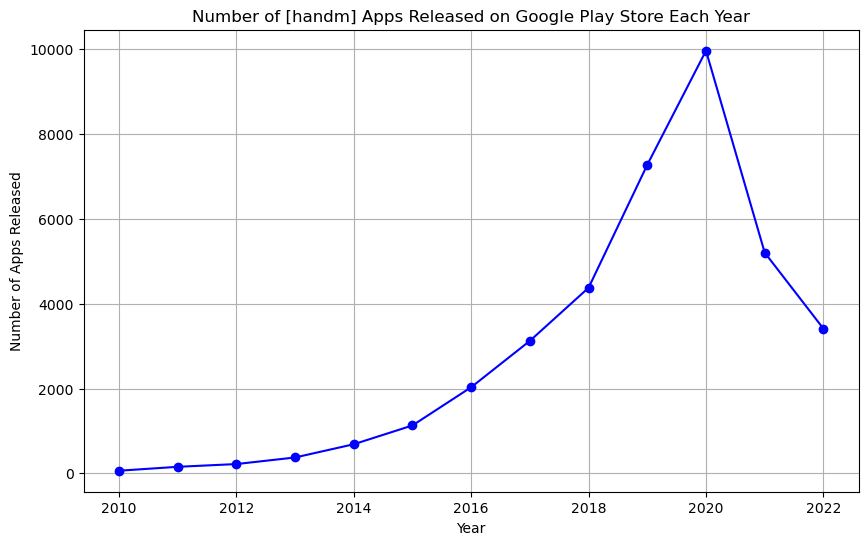

In [288]:
# Number of [handm] Apps Released on Google Play Store Each Year

import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset (if not already loaded)
# google_df = pd.read_csv('your_data.csv')

# Filter out rows with missing or invalid values in the 'released' column
filtered_df = english_df2.dropna(subset=['released'])
filtered_df['released_year'] = pd.to_datetime(filtered_df['released'], errors='coerce').dt.year

# Group the data by year and count the number of apps released each year
apps_released_by_year = filtered_df.groupby('released_year').size()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a line plot for the number of apps released each year
ax.plot(apps_released_by_year.index, apps_released_by_year.values, marker='o', color='blue')

# Set the x-axis and y-axis labels
ax.set_xlabel("Year")
ax.set_ylabel("Number of Apps Released")

# Set the title
ax.set_title("Number of [handm] Apps Released on Google Play Store Each Year")

# Enable grid lines
ax.grid(True)

# Show the plot
plt.show()


In [289]:
english_df2['description_bigrams']

handm_eng['description_monograms']
# df_en
# df_en['description']

0        ['official', 'band', 'paired', 'person', 'unpa...
1        ['nuance', 'powershare', 'mobile', 'instant', ...
2        ['forms', 'exercise', 'effective', 'planks', '...
3        ['fitivity', 'warmed', 'focuses', 'beginner', ...
4        ['boost', 'metabolism', 'burn', 'fat', 'foods'...
                               ...                        
80314    ['1000', 'exercises', 'combined', 'individual'...
80315    ['birth', 'movement', 'birth', 'positions', 'a...
80316    ['xtra', 'innings', 'central', 'iowas', 'premi...
80317    ['download', 'plano', 'athletic', 'club', 'sig...
80318    ['explore', 'brand', 'professional', 'applicat...
Name: description_monograms, Length: 80319, dtype: object

## -------------Break point-----------

## Now it has handm, english, and (vet apps removed) human health apps

In [11]:
import pandas as pd

# Assuming you have a CSV file called 'filename.csv' in the current directory

# Read the CSV file into a DataFrame
english_df = pd.read_csv('english_novet_google_apps.csv') # check if this is onlym

# ---------------------------Do this everytime the csv file is loaded-----------
# # # Evaluating strings that are actually lists into lists
import ast

english_df['description_monograms'] = english_df['description_monograms'].apply(ast.literal_eval)
english_df['title_monograms'] = english_df['title_monograms'].apply(ast.literal_eval)
english_df['summary_monograms'] = english_df['summary_monograms'].apply(ast.literal_eval)
english_df['summary_bigrams'] = english_df['summary_bigrams'].apply(ast.literal_eval)
english_df['description_bigrams'] = english_df['description_bigrams'].apply(ast.literal_eval)
english_df['title_bigrams'] = english_df['title_bigrams'].apply(ast.literal_eval)
# # -----------------------------Do it only once---------------------

In [2]:
# Read the CSV file into a DataFrame
# english_df = pd.read_csv('english_novet_df.csv')

english_df['title_monograms'][0]

['fixit', 'mi', 'band', '2']

In [3]:
english_df
# 40652 rows × 34 columns; this is the latest database

id                           title  \
0                    com.mc.fixitformiband2            Fix-it for Mi Band 2   
1                               com.planker  Planker - Plank Workout & Chal   
2               com.fitivity.dynamic_warmup   Dynamic Warm Up & Flexibility   
3         com.newandromo.dev29159.app759746               Fat Burning Meals   
4      com.trainerize.accelerateperformance          Accelerate Performance   
...                                     ...                             ...   
40643           com.buggadooli.bloodtypeapp              Blood Diet Express   
40644         app.thrivefit.train.store.own                 Thrive Training   
40645              com.getzend.get_zend_new                         GetZENd   
40646                      dk.gynzone.birth                 Birth Positions   
40647       com.fitmetrix.planoathleticclub             Plano Athletic Club   

                                                 summary  \
0                             Recover your unpaired band   
1      Highly efficient plank workouts and challenges...   
2      Improve flexibility, strength and overall athl...   
3      fat burning meals the best app to lose weight,...   
4                 Leading app for fitness professionals.   
...                                                  ...   
40643  Eat foods that are good for your blood type wi...   
40644                 Log your Thrive Training workouts.   
40645       GetZENd, an award-winning inspirational App.   
40646  Birth Positions - an active choice. Inspiratio...   
40647  Download the Plano Athletic Club App today and...   

                                             description      released  \
0      Can't get official app working anymore?\nAre y...   Oct 6, 2016   
1      There are few forms of exercise as effective a...  Jan 10, 2019   
2      Fitivity gets you better. Looks like you’re he...  Jul 22, 2013   
3      When you're looking to boost your metabolism a...  May 28, 2020   
4      With the Accelerate Performance Personal Train...  Jan 23, 2019   
...                                                  ...           ...   
40643  Are you eating foods that are good for your bl...  Oct 11, 2016   
40644  Log your Thrive Fit Training workouts from any...   Dec 2, 2019   
40645  GetZENd, an award-winning inspirational App, o...   Nov 9, 2020   
40646  Birth is movement\n\nBirth Positions - an acti...   Mar 2, 2016   
40647  Download the Plano Athletic Club App today. Fr...  Oct 29, 2021   

       installs_2020  installs_2021  installs_2022  size  android_2020  ...  \
0           645916.0       758433.0         823982  7.4M    4.3 and up  ...   
1                NaN         1422.0           1695  9.4M           NaN  ...   
2                NaN        36710.0          37428   85M           NaN  ...   
3                NaN         1583.0           1658   14M           NaN  ...   
4                NaN            6.0             12  150M           NaN  ...   
...              ...            ...            ...   ...           ...  ...   
40643            NaN         8629.0           8786  1.5M           NaN  ...   
40644            NaN          144.0            152   20M           NaN  ...   
40645            NaN           36.0           1443   16M           NaN  ...   
40646          294.0          326.0            356  3.0M  4.0.3 and up  ...   
40647            NaN            NaN            384   NaN           NaN  ...   

                                      description_tokens  \
0      ['official', 'band', 'paired', 'person', 'unpa...   
1      ['forms', 'exercise', 'effective', 'planks', '...   
2      ['fitivity', 'warmed', 'focuses', 'beginner', ...   
3      ['boost', 'metabolism', 'burn', 'fat', 'foods'...   
4      ['accelerate', 'performance', 'personal', 'tra...   
...                                                  ...   
40643  ['eating', 'foods', 'blood', 'type', 'blood', ...   
40644  ['log', 'thrive', 'fit', 'training', 'workouts

### Disease words Monograms and Bigrams

In [12]:
# I have all English apps, I have all monograms and bigrams from title, summary and description. I can now do the IHD thingy

#------------------Monograms from Disease words--------------------------

# Creating a list of words for Ischemic Heart Disease and associated conditions
disease_1_list = ['Heart disease', 'Cardiovascular disease', 'Coronary artery disease', 'Myocardial infarction', 'Ischemic heart disease', 
                  'Angina', 'Atherosclerosis', 'Hypertensive heart disease', 'Valvular heart disease', 'Congenital heart disease', 'Rheumatic heart disease', 
                  'Heart failure', 'Cardiomyopathy', 'Arrhythmia', 'Palpitations', 'Chest pain', 'Shortness of breath', 'Fatigue', 'Edema', 'High blood pressure', 
                  'Hypertension', 'Coronary artery bypass graft', 'Percutaneous coronary intervention', 'Stent', 'Echocardiogram', 'Electrocardiogram', 
                  'Cardiac catheterization', 'Cardiac MRI', 'Cardiac rehabilitation', 'Beta-blockers', 'Calcium channel blockers', 'ACE inhibitors', 'Diuretics', 
                  'Statins', 'Antiplatelet medications', 'Anticoagulants', 'Angiotensin receptor blockers', 'Pacemaker', 'Defibrillator', 'Heart transplant', 
                  'Atrial fibrillation', 'Ventricular fibrillation', 'Supraventricular tachycardia', 'Bradycardia', 'Heart murmur', 'Pericarditis', 'Endocarditis', 
                  'Myocarditis', 'Kawasaki disease', 'Systemic lupus erythematosus', 'Rheumatoid arthritis', 'Giant cell myocarditis', 'Viral myocarditis', 
                  'Dilated cardiomyopathy', 'Hypertrophic cardiomyopathy', 'Restrictive cardiomyopathy', 'Blocked arteries', 'Clogged arteries', 'Heart blockage', 
                  'Heart attack', 'Cardiac arrest', 'Heart condition', 'Heart problems', 'Heart trouble', 'Heart disorder', 'Heart issues', 'Chest discomfort', 
                  'Chest tightness', 'Heartache', 'Breathlessness', 'Labored breathing', 'Heavy breathing', 'Racing heart', 'Rapid heartbeat', 'Irregular heartbeat', 
                  'Skipped beats', 'Swelling', 'Fluid retention', 'Silent killer', 'Bypass surgery', 'Heart surgery', 'Open-heart surgery', 'Coronary bypass', 
                  'Bypass operation', 'Stent surgery', 'Stent placement', 'Balloon procedure', 'Valve surgery', 'Heart valve repair', 'Valve replacement', 'Cardiac rehab', 
                  'Blood thinners', 'Clot-busting drugs', 'Clot-preventing medication', 'Blood pressure meds', 'Cholesterol-lowering drugs', 'Statins', 'Heart rehab', 
                  'Cardiac rehab', 'Heart transplant', 'New heart', 'Artificial heart', 'Pacemaker', 'Defibrillator', 'Shock device', 'Electrical device', 
                  'Beating again', 'Life-saving surgery', 'cardiology', 'cardiologist', 'cardiothoracic']

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Define the stemmer
stemmer = SnowballStemmer('english')

# Create an empty list to store the stemmed words
disease_list_stemmed = []

# Tokenize, stem, and add unique words to the stemmed list
for phrase in disease_1_list:
    tokens = word_tokenize(phrase.lower())  # Convert to lowercase before tokenization
    stems = [stemmer.stem(token) for token in tokens]
    disease_list_stemmed.extend(stems)

# Get unique stemmed words by converting the list to a set and then back to a list
disease_list_stemmed_unique = list(set(disease_list_stemmed))

print(disease_list_stemmed_unique)

#===========================Results===============================

#'angiotensin', 'receptor', 'rheumatoid', 'ace', 'dilat', 'infarct', 'mri', 'erythematosus', 'chest', 'bradycardia', 'heart', 'blood', 'medic', 
# 'murmur', 'short', 'blocker', 'cardiac', 'inhibitor', 'angina', 'beta-block', 'endocard', 'palpit', 'tachycardia', 'fibril', 'rheumat', 'hypertens',
#  'pressur', 'intervent', 'ischem', 'failur', 'diseas', 'percutan', 'cell', 'myocard', 'ventricular', 'bypass', 'pericard', 'arrhythmia', 'channel', 'echocardiogram',
#  'coronari', 'rehabilit', 'congenit', 'antiplatelet', 'diuret', 'electrocardiogram', 'statin', 'system', 'graft', 'atherosclerosi', 'fatigu', 'calcium', 'stent',
#  'of', 'catheter', 'supraventricular', 'pain', 'giant', 'pacemak', 'valvular', 'myocardi', 'cardiomyopathi', 'arteri', 'restrict', 'edema', 'high', 'anticoagul', 
# 'transplant', 'defibril', 'kawasaki', 'arthriti', 'hypertroph', 'atrial', 'viral', 'breath', 'lupus', 'cardiovascular'

# However, This did not include - ECG, EKG, so we will add them separately and delete the word 'of'

disease_list_stemmed_unique = [word for word in disease_list_stemmed_unique if word != 'of']
disease_list_stemmed_unique.extend(['ekg', 'ecg'])

print(disease_list_stemmed_unique)
# Now it is fixed

stemmed_monogram_list = disease_list_stemmed_unique

#------------------Bigrams from Disease words--------------------------

# Generate bigrams from the list of words

from nltk import bigrams, word_tokenize, PorterStemmer

# List of words
word_list = ['Heart disease', 'Cardiovascular disease', 'Coronary artery disease', 'Myocardial infarction', 'Ischemic heart disease', 
                  'Angina', 'Atherosclerosis', 'Hypertensive heart disease', 'Valvular heart disease', 'Congenital heart disease', 'Rheumatic heart disease', 
                  'Heart failure', 'Cardiomyopathy', 'Arrhythmia', 'Palpitations', 'Chest pain', 'Shortness of breath', 'Fatigue', 'Edema', 'High blood pressure', 
                  'Hypertension', 'Coronary artery bypass graft', 'Percutaneous coronary intervention', 'Stent', 'Echocardiogram', 'Electrocardiogram', 
                  'Cardiac catheterization', 'Cardiac MRI', 'Cardiac rehabilitation', 'Beta-blockers', 'Calcium channel blockers', 'ACE inhibitors', 'Diuretics', 
                  'Statins', 'Antiplatelet medications', 'Anticoagulants', 'Angiotensin receptor blockers', 'Pacemaker', 'Defibrillator', 'Heart transplant', 
                  'Atrial fibrillation', 'Ventricular fibrillation', 'Supraventricular tachycardia', 'Bradycardia', 'Heart murmur', 'Pericarditis', 'Endocarditis', 
                  'Myocarditis', 'Kawasaki disease', 'Systemic lupus erythematosus', 'Rheumatoid arthritis', 'Giant cell myocarditis', 'Viral myocarditis', 
                  'Dilated cardiomyopathy', 'Hypertrophic cardiomyopathy', 'Restrictive cardiomyopathy', 'Blocked arteries', 'Clogged arteries', 'Heart blockage', 
                  'Heart attack', 'Cardiac arrest', 'Heart condition', 'Heart problems', 'Heart trouble', 'Heart disorder', 'Heart issues', 'Chest discomfort', 
                  'Chest tightness', 'Heartache', 'Breathlessness', 'Labored breathing', 'Heavy breathing', 'Racing heart', 'Rapid heartbeat', 'Irregular heartbeat', 
                  'Skipped beats', 'Swelling', 'Fluid retention', 'Silent killer', 'Bypass surgery', 'Heart surgery', 'Open-heart surgery', 'Coronary bypass', 
                  'Bypass operation', 'Stent surgery', 'Stent placement', 'Balloon procedure', 'Valve surgery', 'Heart valve repair', 'Valve replacement', 'Cardiac rehab', 
                  'Blood thinners', 'Clot-busting drugs', 'Clot-preventing medication', 'Blood pressure meds', 'Cholesterol-lowering drugs', 'Statins', 'Heart rehab', 
                  'Cardiac rehab', 'Heart transplant', 'New heart', 'Artificial heart', 'Pacemaker', 'Defibrillator', 'Shock device', 'Electrical device', 
                  'Beating again', 'Life-saving surgery', 'cardiology', 'cardiologist', 'cardiothoracic']

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Create bigrams and perform stemming
stemmed_bigram_list = []
for phrase in word_list:
    words = word_tokenize(phrase)
    stemmed_words = [stemmer.stem(word) for word in words if word not in ['of', "'s", '(', ')', 'b', 'c' ]]
    bigrams_list = list(bigrams(stemmed_words))
    stemmed_bigram_list.extend(bigrams_list)

# Print the stemmed bigrams
for bigram in stemmed_bigram_list:
    print(bigram)



['hypertroph', 'defibril', 'atherosclerosi', 'skip', 'myocardi', 'ischem', 'system', 'repair', 'edema', 'failur', 'heart', 'diuret', 'tight', 'problem', 'antiplatelet', 'placement', 'artifici', 'stent', 'rheumatoid', 'arthriti', 'procedur', 'again', 'high', 'mri', 'chest', 'blockag', 'valvular', 'viral', 'irregular', 'calcium', 'bradycardia', 'fluid', 'killer', 'retent', 'open-heart', 'echocardiogram', 'cholesterol-low', 'valv', 'angina', 'condit', 'atrial', 'cardiologist', 'rehabilit', 'percutan', 'restrict', 'pacemak', 'issu', 'race', 'infarct', 'cardiolog', 'hypertens', 'diseas', 'murmur', 'med', 'fibril', 'block', 'arrest', 'arteri', 'kawasaki', 'bypass', 'medic', 'beta-block', 'pericard', 'rheumat', 'lupus', 'rapid', 'disord', 'oper', 'breath', 'ventricular', 'attack', 'shock', 'myocard', 'rehab', 'troubl', 'cardiac', 'anticoagul', 'silent', 'clot-bust', 'breathless', 'replac', 'swell', 'pain', 'devic', 'transplant', 'cell', 'pressur', 'cardiothorac', 'fatigu', 'clog', 'giant', 'l

### Finding disease monograms and bigrams in the apps 

In [13]:
# import pandas as pd

# df = english_df

def process_disease_monograms(row):
    # Initialize empty lists for the disease terms in the description
    description_terms = []
    summary_terms = []
    title_terms = []
    
    # Loop through the disease terms and append them to the list if they are present in the row
    for term in set(stemmed_monogram_list):
        if term in row['description_monograms']:
            description_terms.append(term)
        if term in row['summary_monograms']:
            summary_terms.append(term)
        if term in row['title_monograms']:
            title_terms.append(term)
    # Create a new column by combining the terms from different columns
    combined_terms = description_terms + title_terms + summary_terms
    
    return pd.Series({
        'disease_terms_description_monograms': description_terms,
        'disease_terms_summary_monograms': summary_terms,
        'disease_terms_title_monograms': title_terms,
        'disease_terms_description_monograms_count': len(description_terms),
        'disease_terms_summary_monograms_count': len(summary_terms),
        'disease_terms_title_monograms_count': len(title_terms),
        'total_count_monograms_app': len(description_terms) + len(summary_terms) + len(title_terms),
        'combined_monogram_terms': combined_terms
    })

# Apply the function to create new columns with lists of disease terms in each row
english_df[['disease_terms_description_monograms', 'disease_terms_summary_monograms', 'disease_terms_title_monograms',
    'disease_terms_description_monograms_count', 'disease_terms_summary_monograms_count',
    'disease_terms_title_monograms_count', 'total_count_monograms_app', 'combined_monogram_terms']] = english_df.apply(process_disease_monograms, axis=1)

# Print the resulting data frame
print(english_df)

# Calculate the minimum and maximum values for the count columns
min_counts = english_df[['disease_terms_description_monograms_count', 'disease_terms_summary_monograms_count',
                 'disease_terms_title_monograms_count', 'total_count_monograms_app']].min()
max_counts = english_df[['disease_terms_description_monograms_count', 'disease_terms_summary_monograms_count',
                 'disease_terms_title_monograms_count', 'total_count_monograms_app']].max()

# Print the minimum and maximum values
print("Minimum counts:")
print(min_counts)
print("\nMaximum counts:")
print(max_counts)

# ------------------------------------------- Counting Bigrams 

### Making new columns for disease bigrams found in Title, summary and Description


## df is still english_df, so not changing anything

# import pandas as pd
# import numpy as np

# Define a function to create lists of disease terms in each row and count the number of bigrams
def process_disease_bigrams(row):
    # stemmed_bigram_list = ['bigram1', 'bigram2', 'bigram3']  # Make sure there is a stemmed list of bigrams already
    
    # Initialize empty lists for the disease terms in the description
    description_terms = []
    summary_terms = []
    title_terms = []
    
    # Loop through the disease terms and append them to the list if they are present in the row
    for term in set(stemmed_bigram_list):
        if term in row['description_bigrams']:
            description_terms.append(term)
        if term in row['summary_bigrams']:
            summary_terms.append(term)
        if term in row['title_bigrams']:
            title_terms.append(term)
    
   # Create a new column by combining the terms from different columns
    combined_terms = description_terms + summary_terms + title_terms
    
    return pd.Series({
        'disease_terms_description_bigrams': description_terms,
        'disease_terms_summary_bigrams': summary_terms,
        'disease_terms_title_bigrams': title_terms,
        'disease_terms_description_bigrams_count': len(description_terms),
        'disease_terms_summary_bigrams_count': len(summary_terms),
        'disease_terms_title_bigrams_count': len(title_terms),
        'total_count_bigrams_app': len(description_terms) + len(summary_terms) + len(title_terms),
        'combined_bigram_terms': combined_terms
    })

# Apply the function to create new columns with lists of disease terms in each row
english_df[['disease_terms_description_bigrams', 'disease_terms_summary_bigrams', 'disease_terms_title_bigrams',
    'disease_terms_description_bigrams_count', 'disease_terms_summary_bigrams_count', 'disease_terms_title_bigrams_count', 
    'total_count_bigrams_app', 'combined_bigram_terms']] = english_df.apply(process_disease_bigrams, axis=1)

# Print the resulting data frame
print(english_df)
# Calculate the minimum and maximum values for the count columns
min_counts = english_df[['disease_terms_description_bigrams_count', 'disease_terms_summary_bigrams_count',
                 'disease_terms_title_bigrams_count', 'total_count_bigrams_app']].min()
max_counts = english_df[['disease_terms_description_bigrams_count', 'disease_terms_summary_bigrams_count',
                 'disease_terms_title_bigrams_count', 'total_count_bigrams_app']].max()

# Print the minimum and maximum values
print("Minimum counts:")
print(min_counts)
print("\nMaximum counts:")
print(max_counts)

# type(df["description_bigrams"][0])

# disease_terms_summary_bigrams_count                      1
# disease_terms_title_bigrams_count                        1
# total_count_bigrams_app                                  3

# disease_terms_description_bigrams_count    [(chest, pain)]
# disease_terms_summary_bigrams_count                      1
# disease_terms_title_bigrams_count                        1
# total_count_bigrams_app                                  3

                                         id                           title  \
0                    com.mc.fixitformiband2            Fix-it for Mi Band 2   
1                               com.planker  Planker - Plank Workout & Chal   
2               com.fitivity.dynamic_warmup   Dynamic Warm Up & Flexibility   
3         com.newandromo.dev29159.app759746               Fat Burning Meals   
4      com.trainerize.accelerateperformance          Accelerate Performance   
...                                     ...                             ...   
40643           com.buggadooli.bloodtypeapp              Blood Diet Express   
40644         app.thrivefit.train.store.own                 Thrive Training   
40645              com.getzend.get_zend_new                         GetZENd   
40646                      dk.gynzone.birth                 Birth Positions   
40647       com.fitmetrix.planoathleticclub             Plano Athletic Club   

                                                 su

In [14]:
stemmed_bigram_list

[('heart', 'diseas'),
 ('cardiovascular', 'diseas'),
 ('coronari', 'arteri'),
 ('arteri', 'diseas'),
 ('myocardi', 'infarct'),
 ('ischem', 'heart'),
 ('heart', 'diseas'),
 ('hypertens', 'heart'),
 ('heart', 'diseas'),
 ('valvular', 'heart'),
 ('heart', 'diseas'),
 ('congenit', 'heart'),
 ('heart', 'diseas'),
 ('rheumat', 'heart'),
 ('heart', 'diseas'),
 ('heart', 'failur'),
 ('chest', 'pain'),
 ('short', 'breath'),
 ('high', 'blood'),
 ('blood', 'pressur'),
 ('coronari', 'arteri'),
 ('arteri', 'bypass'),
 ('bypass', 'graft'),
 ('percutan', 'coronari'),
 ('coronari', 'intervent'),
 ('cardiac', 'catheter'),
 ('cardiac', 'mri'),
 ('cardiac', 'rehabilit'),
 ('calcium', 'channel'),
 ('channel', 'blocker'),
 ('ace', 'inhibitor'),
 ('antiplatelet', 'medic'),
 ('angiotensin', 'receptor'),
 ('receptor', 'blocker'),
 ('heart', 'transplant'),
 ('atrial', 'fibril'),
 ('ventricular', 'fibril'),
 ('supraventricular', 'tachycardia'),
 ('heart', 'murmur'),
 ('kawasaki', 'diseas'),
 ('system', 'lupu'),

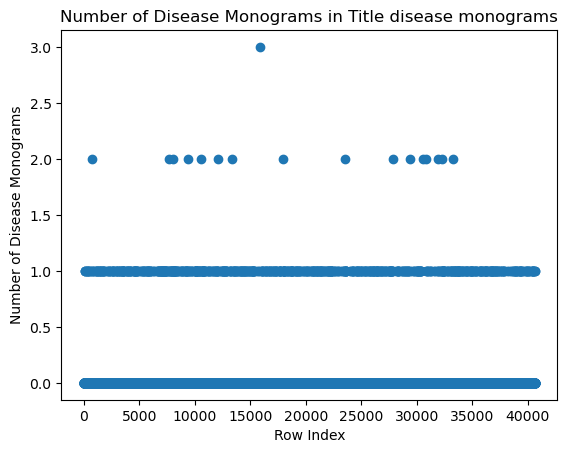

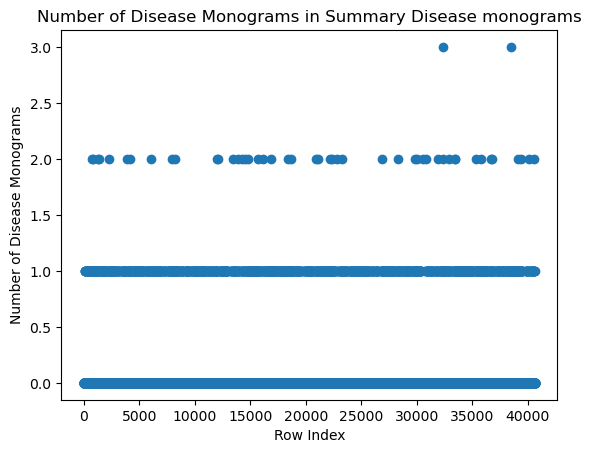

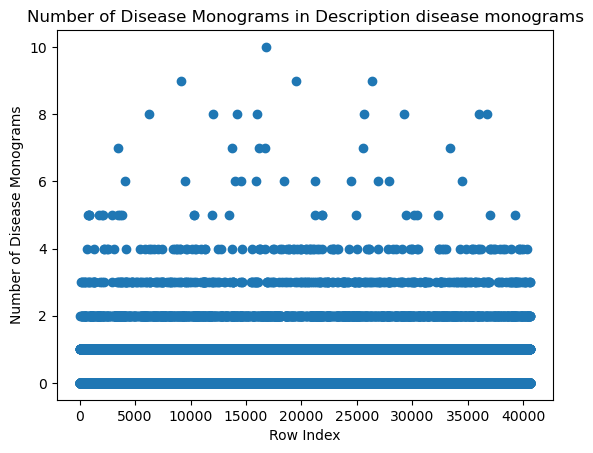

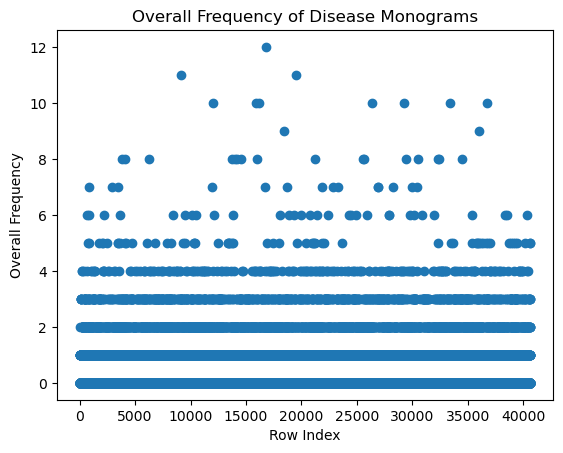

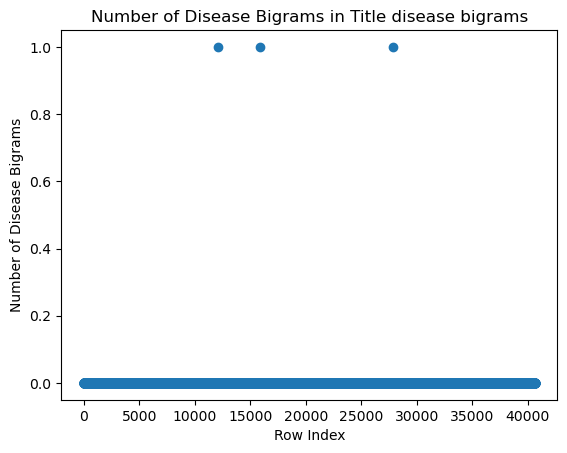

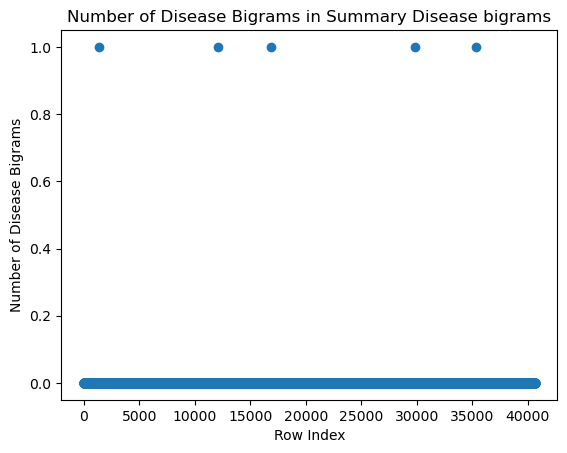

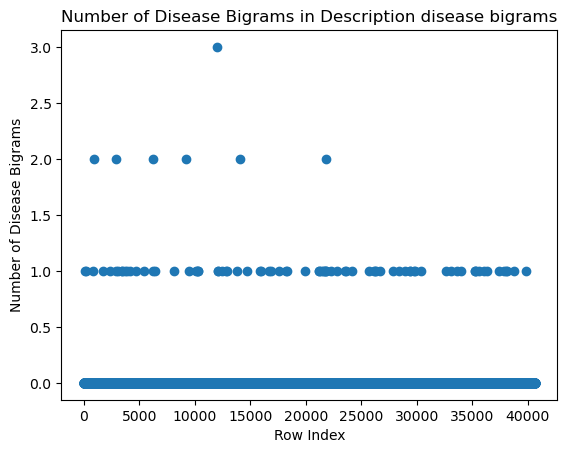

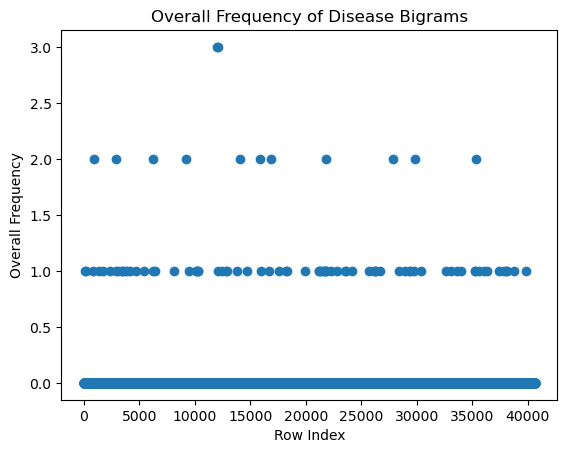

In [7]:
## df is still english_df, so not changing anything

import os
import matplotlib.pyplot as plt

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/google_apps_plots/ihd' #change disease here

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

##-----------------------PLOTS for Monograms-----------------

# Define the columns and plot titles
columns = ['disease_terms_title_monograms_count', 'disease_terms_summary_monograms_count', 'disease_terms_description_monograms_count']
plot_titles = ['Title disease monograms', 'Summary Disease monograms', 'Description disease monograms']
plot_filenames = ['title_disease_monograms.png', 'summary_disease_monograms.png', 'description_disease_monograms.png']

# Generate plots for each column
for column, title, filename in zip(columns, plot_titles, plot_filenames):
    plt.scatter(range(len(english_df)), english_df[column])
    plt.xlabel('Row Index')
    plt.ylabel('Number of Disease Monograms')
    plt.title('Number of Disease Monograms in ' + title)
    plot_filename = os.path.join(plot_directory, filename)
    plt.savefig(plot_filename)
    plt.show()

# Generate plot for overall frequency
plt.scatter(range(len(english_df)), english_df['total_count_monograms_app'])
plt.xlabel('Row Index')
plt.ylabel('Overall Frequency')
plt.title('Overall Frequency of Disease Monograms')
plot_filename = os.path.join(plot_directory, 'overall_frequency_monograms.png')
plt.savefig(plot_filename)
plt.show()

##-----------------------PLOTS for Bigrams-----------------

# Define the columns and plot titles
columns = ['disease_terms_title_bigrams_count', 'disease_terms_summary_bigrams_count', 'disease_terms_description_bigrams_count']
plot_titles = ['Title disease bigrams', 'Summary Disease bigrams', 'Description disease bigrams']
plot_filenames = ['title_disease_bigrams.png', 'summary_disease_bigrams.png', 'description_disease_bigrams.png']

# Generate plots for each column
for column, title, filename in zip(columns, plot_titles, plot_filenames):
    plt.scatter(range(len(english_df)), english_df[column])
    plt.xlabel('Row Index')
    plt.ylabel('Number of Disease Bigrams')
    plt.title('Number of Disease Bigrams in ' + title)
    plot_filename = os.path.join(plot_directory, filename)
    plt.savefig(plot_filename)
    plt.show()

# Generate plot for overall frequency
plt.scatter(range(len(english_df)), english_df['total_count_bigrams_app'])
plt.xlabel('Row Index')
plt.ylabel('Overall Frequency')
plt.title('Overall Frequency of Disease Bigrams')
plot_filename = os.path.join(plot_directory, 'overall_frequency_bigrams.png')
plt.savefig(plot_filename)
plt.show()


In [8]:
df_monogram_1 = english_df[english_df['total_count_monograms_app'] != 0]
df_monogram_2 = english_df[english_df['total_count_monograms_app'] > 1]
df_bigram_1 = english_df[english_df['total_count_bigrams_app'] != 0]
df_bigram_2 = english_df[english_df['total_count_bigrams_app'] > 1]


# Number of rows in df_monogram_1
rows_monogram_1 = len(df_monogram_1)
print("Rows >0 monograms:", rows_monogram_1)

# Number of rows in df_monogram_2
rows_monogram_2 = df_monogram_2.shape[0]
print("Rows >1 monograms:", rows_monogram_2)

# Number of rows in df_bigram_1
rows_bigram_1 = len(df_bigram_1)
print("Rows >0 bigrams:", rows_bigram_1)

# Number of rows in df_bigram_2
rows_bigram_2 = df_bigram_2.shape[0]
print("Rows >1 bigrams:", rows_bigram_2)

##=======================Results=========================
# Rows >0 monograms: 5426
# Rows >1 monograms: 1996
# Rows >0 bigrams: 25
# Rows >1 bigrams: 1

Rows >0 monograms: 6733
Rows >1 monograms: 2652
Rows >0 bigrams: 87
Rows >1 bigrams: 13


### Checking and counting frequencies of monograms and bigrams

0 33915
1 4081
2 1549
3 760
4 209
5 61
6 31
7 14
8 16
9 2
10 7
11 2
12 1


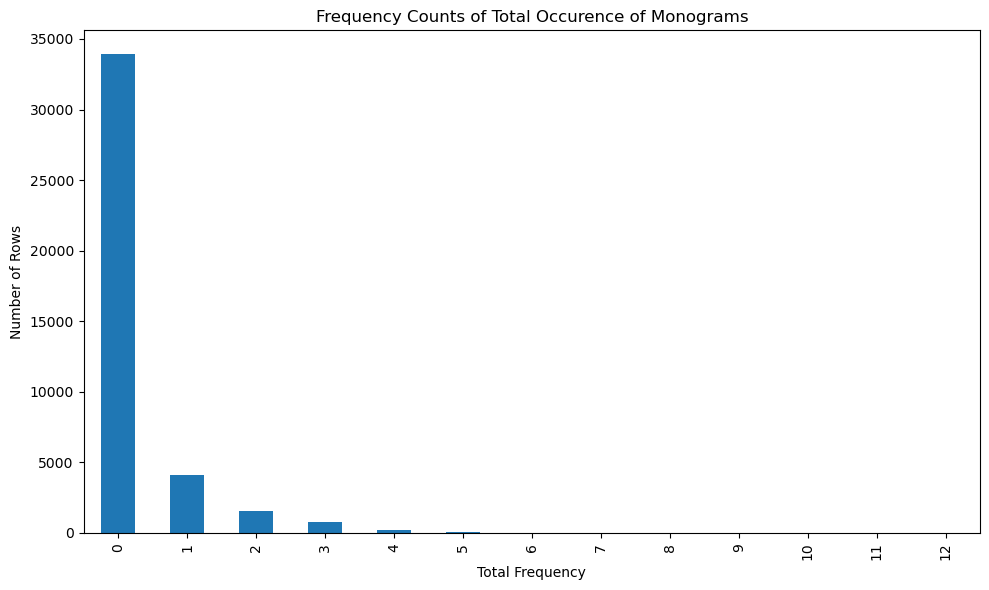

0 40561
1 74
2 11
3 2


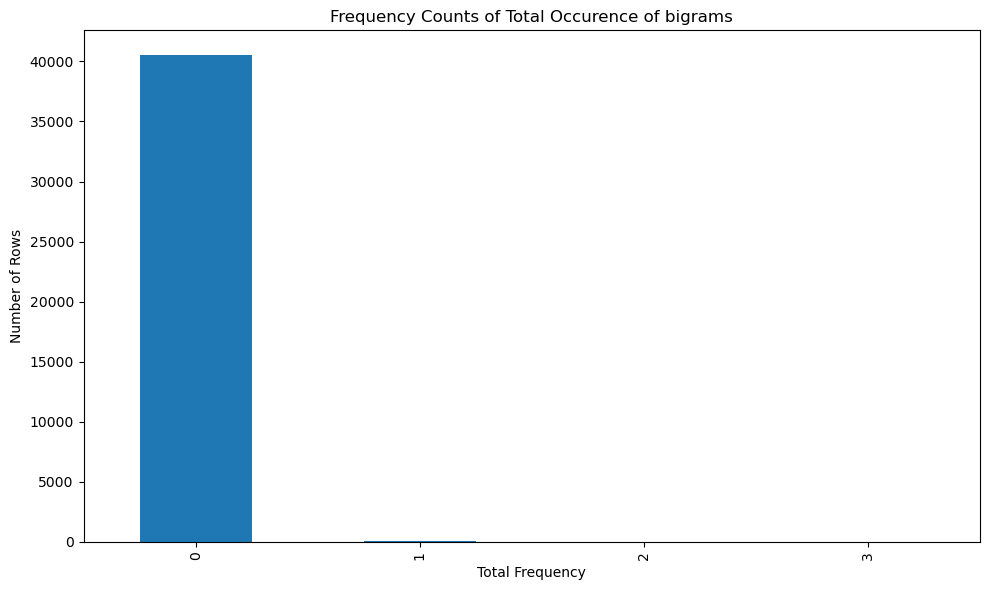

In [9]:
## Making plots for frequencies
### How many monograms and bigrams does each row have = to be precise
#------------------Monograms-------------------

# Assuming 'df' is your DataFrame
# Assuming 'total_count_monograms_app' is the name of the column with the sum of bigram frequencies

# Calculate the count of rows for each frequency value
frequency_counts = english_df['total_count_monograms_app'].value_counts().sort_index()

# Print the number of rows and corresponding frequency counts
for frequency, count in frequency_counts.items():
    print(frequency, count)

# Create a bar plot of the frequency counts
fig, ax = plt.subplots(figsize=(10, 6))
frequency_counts.plot.bar(ax=ax)
ax.set_xlabel('Total Frequency')
ax.set_ylabel('Number of Rows')
ax.set_title('Frequency Counts of Total Occurence of Monograms')
plt.tight_layout()
plt.show()

# ====== Results_for Android=================
# 0 52065
# 1 5018
# 2 1814
# 3 993
# 4 316
# 5 77
# 6 53
# 7 24
# 8 9
# 9 12
# 10 4
# 11 5
# 12 2
# 13 1
# ====== Results_for google=================
# 0 35221
# 1 3430
# 2 1198
# 3 574
# 4 150
# 5 31
# 6 19
# 7 13
# 8 6
# 9 3
# 10 1
# 11 1
#------------------Bigrams-------------------
# Assuming 'df' is your DataFrame
# Assuming 'total_count_monograms_app' is the name of the column with the sum of bigram frequencies

# Calculate the count of rows for each frequency value
frequency_counts = english_df['total_count_bigrams_app'].value_counts().sort_index()

# Print the number of rows and corresponding frequency counts
for frequency, count in frequency_counts.items():
    print(frequency, count)

# Create a bar plot of the frequency counts
fig, ax = plt.subplots(figsize=(10, 6))
frequency_counts.plot.bar(ax=ax)
ax.set_xlabel('Total Frequency')
ax.set_ylabel('Number of Rows')
ax.set_title('Frequency Counts of Total Occurence of bigrams')
plt.tight_layout()
plt.show()

# ====== Results_for Android=================
# 0 60306
# 1 74
# 2 9
# 3 4
# ====== Results_for google=================
# 0 40622
# 1 24
# 3 1

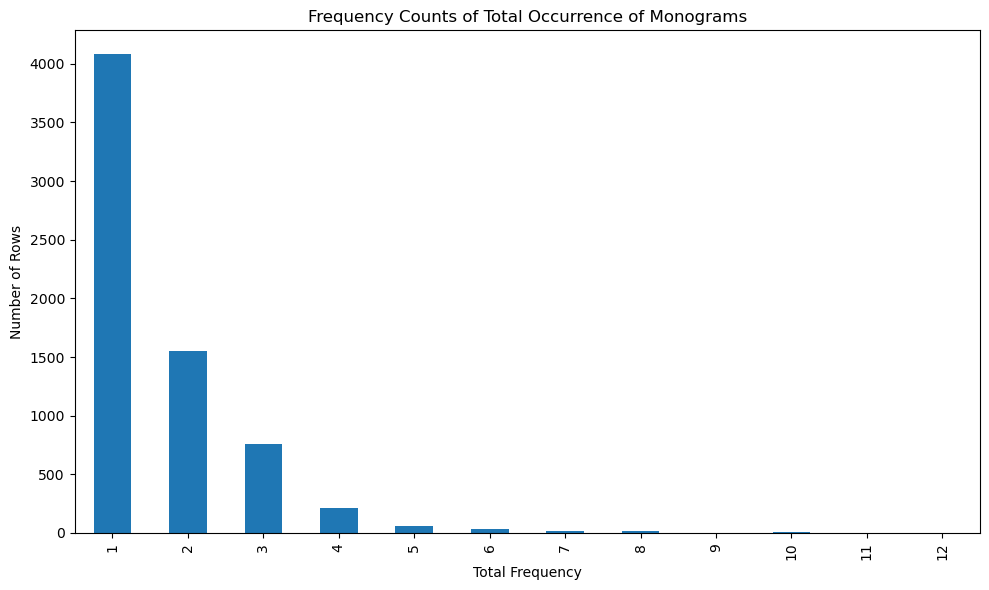

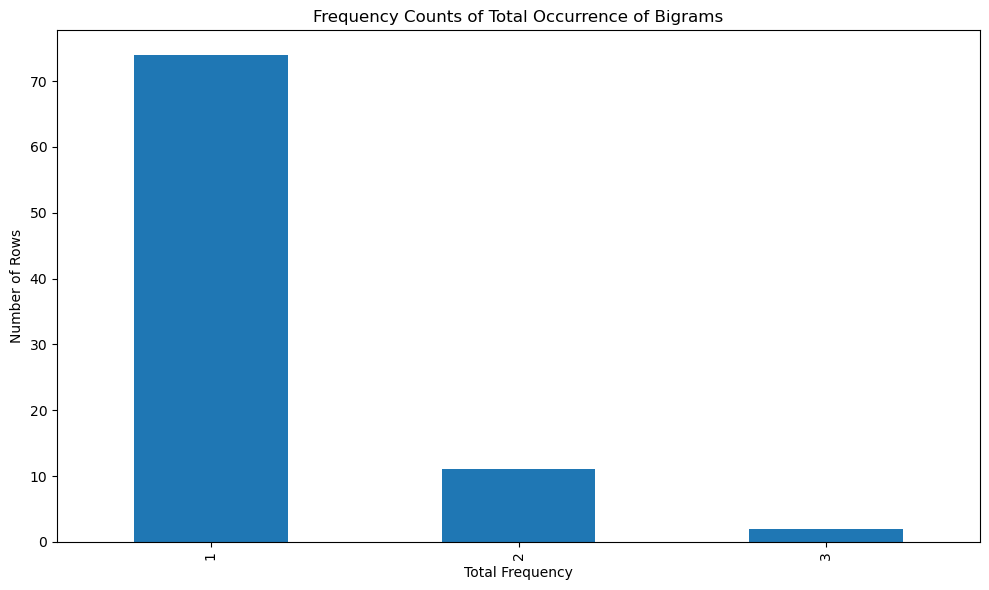

In [10]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Assuming 'total_count_monograms_app' and 'total_count_bigrams_app' are the names of the columns with the sum of monogram and bigram frequencies

# Filter out rows with frequency count of 0
filtered_df_monograms = english_df[english_df['total_count_monograms_app'] > 0]
filtered_df_bigrams = english_df[english_df['total_count_bigrams_app'] > 0]

# Create bar plots for monograms
fig, ax = plt.subplots(figsize=(10, 6))
filtered_df_monograms['total_count_monograms_app'].value_counts().sort_index().plot.bar(ax=ax)
ax.set_xlabel('Total Frequency')
ax.set_ylabel('Number of Rows')
ax.set_title('Frequency Counts of Total Occurrence of Monograms')
plt.tight_layout()
plt.show()

# Create bar plots for bigrams
fig, ax = plt.subplots(figsize=(10, 6))
filtered_df_bigrams['total_count_bigrams_app'].value_counts().sort_index().plot.bar(ax=ax)
ax.set_xlabel('Total Frequency')
ax.set_ylabel('Number of Rows')
ax.set_title('Frequency Counts of Total Occurrence of Bigrams')
plt.tight_layout()
plt.show()


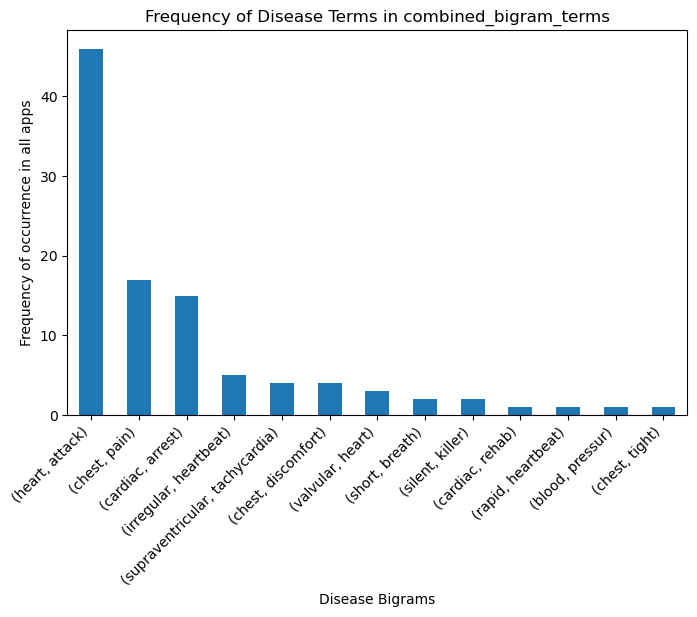

In [11]:
import matplotlib.pyplot as plt
import os

## I want to see the distibution of the monograms and bigrams in all of the selected apps in each of the dataframes
# df_monogram_1 = df[df['total_count_monograms_app'] != 0]
# df_monogram_2 = df[df['total_count_monograms_app'] > 1]
# df_bigram_1 = df[df['total_count_bigrams_app'] != 0]
# df_bigram_2 = df[df['total_count_bigrams_app'] > 1]


## All these apps have only one bigram - lets see which ones they are, and if they are relevant
## Counting the Frequency of IHD disease terms overall in the filtered apps
# Define a function to create a bar plot for a given column of disease terms

# For df_monogram_1
def plot_disease_terms(column_name, filename):
    # Count the number of rows with each disease term in the column
    term_counts = english_df[column_name].explode().value_counts()
    # Create a bar plot of the frequency for each disease term
    fig, ax = plt.subplots(figsize=(8, 5))
    term_counts.plot.bar(ax=ax)
    ax.set_xlabel('Disease Bigrams')
    ax.set_ylabel('Frequency of occurrence in all apps')
    ax.set_title(f'Frequency of Disease Terms in {column_name}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plot_filename = os.path.join(plot_directory, filename)
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/google_apps_plots'

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Call the function for each column of disease terms
plot_disease_terms('combined_bigram_terms', 'combined_bigram_terms_df_bigram_2.pdf')
# plt.savefig('Frequency of Bigram Disease terms in Descriptions.png') # Not sure what this is for


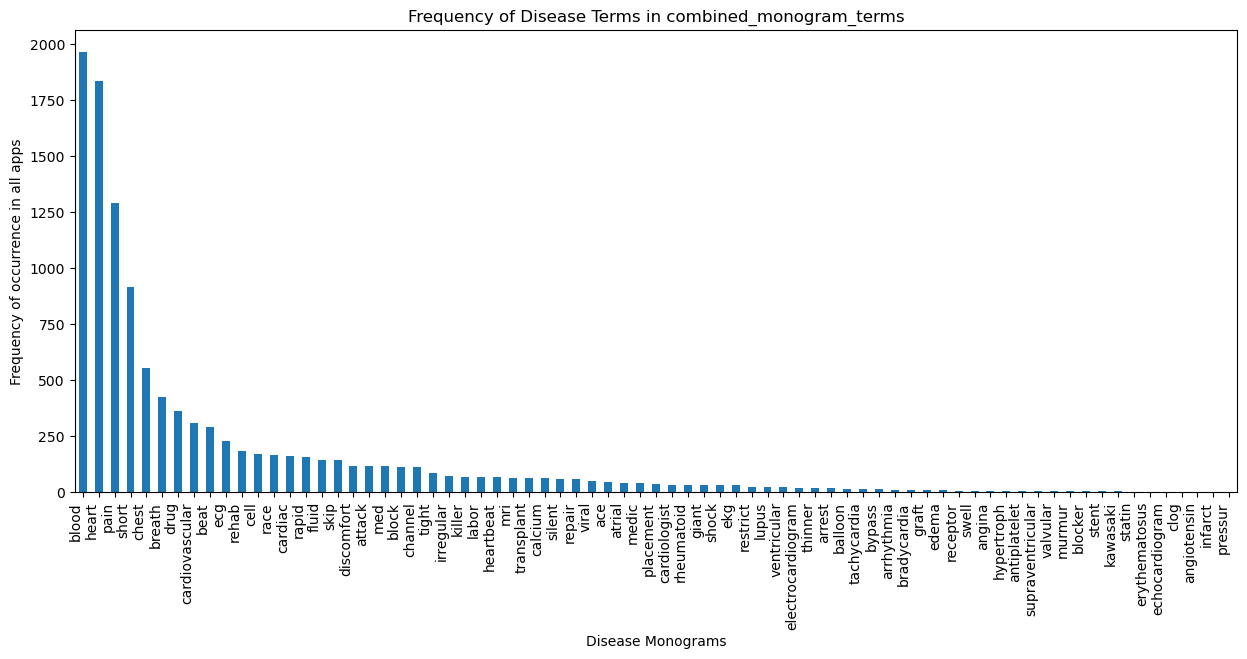

In [12]:
import matplotlib.pyplot as plt
import os

## I want to see the distibution of the monograms and bigrams in all of the selected apps in each of the dataframes
# df_monogram_1 = df[df['total_count_monograms_app'] != 0]
# df_monogram_2 = df[df['total_count_monograms_app'] > 1]
# df_bigram_1 = df[df['total_count_bigrams_app'] != 0]
# df_bigram_2 = df[df['total_count_bigrams_app'] > 1]


## All these apps have only one bigram - lets see which ones they are, and if they are relevant
## Counting the Frequency of IHD disease terms overall in the filtered apps
# Define a function to create a bar plot for a given column of disease terms

# For df_monogram_1
def plot_disease_terms(column_name, filename):
    # Count the number of rows with each disease term in the column
    term_counts = english_df[column_name].explode().value_counts()
    # Create a bar plot of the frequency for each disease term
    fig, ax = plt.subplots(figsize=(15, 6))
    term_counts.plot.bar(ax=ax)
    ax.set_xlabel('Disease Monograms')
    ax.set_ylabel('Frequency of occurrence in all apps')
    ax.set_title(f'Frequency of Disease Terms in {column_name}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    plot_filename = os.path.join(plot_directory, filename)
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/google_apps_plots'

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Call the function for each column of disease terms
plot_disease_terms('combined_monogram_terms', 'combined_monogram_terms_df_bigram_2.pdf')
# plt.savefig('Frequency of Bigram Disease terms in Descriptions.png') # Not sure what this is for


## Making and checking the IHD dataframe

In [15]:
## Delete the apps where there are only one monogram overall, and those words are not too conclusive - such as 
#### blood, heart, pain, short, chest, cell, breath, transplant, mri, channel, diseas, 

## And then combining the dataframes from monograms
### And finally combining this with the apps selected from bigrams. They are overlapping 100%. Selecting from monograms was sufficient
#### Then why do I need bigrams at all? In further analysis perhaps? 

# There are 5018 apps which have only one monogram

temp_list_monograms = ['blood', 'heart', 'pain', 'short', 'chest', 'cell', 'breath', 'transplant', 'mri', 'channel', 'diseas', 'ace', 'receptor', 'drug', 
                       'beat', 'skip', 'race', 'rapid', 'rehab', 'block', 'discomfort', 'med', 'attack', 'fluid', 'tight', 'repair', 'cardiac', 'calcium',
                         'irregular', 'silent', 'labor', 'viral', 'killer', 'placement', 'shock', 'giant', 'restrict', 'thinner', 'medic', 'swell', 'bypass',
                           'clog', 'pressur', 'arrest'] #update this list when new terms are added
df_temp1 = english_df[(english_df['total_count_monograms_app'] == 1) & (~english_df['combined_monogram_terms'].apply(lambda x: any(word in x for word in temp_list_monograms)))]

# Print the resulting DataFrame
df_temp2 = english_df[(english_df['total_count_monograms_app'] > 1) & (english_df['combined_monogram_terms'].apply(lambda x: sum(word in x for word in temp_list_monograms) > 2))]

df_temp3 = english_df[(english_df['total_count_bigrams_app'] > 0)]


df_temp = pd.concat([df_temp1, df_temp2, df_temp3], ignore_index=True)

# Print the resulting DataFrame
df_temp

# ----------------Checking for common rows between apps selected from monograms and bigrams
# import pandas as pd

# # Assume df_temp and df_temp3 are the two data frames you want to compare

# # Merge the two data frames based on the "ID" column
# merged_df = pd.merge(df_temp['id'], df_temp3['id'], how='inner')

# # Get the count of common rows
# common_rows = merged_df.shape[0]

# print("Number of common rows:", common_rows)
#============There is only one common row from results. So we combine both dataframes

## ============Results======
## This gave 585 apps. These have only one monogram, but the monograms are useful. 
## I can add this to all the apps that have more than one monogram

#-------------------------------------------------checking---------------------------------------------------------------
## I checked if this worked, and looks like it did, although it was not obvious from the print function in the line above

# # For df_temp
# def plot_disease_terms(column_name, filename):
#     # Count the number of rows with each disease term in the column
#     term_counts = df_temp[column_name].explode().value_counts()
#     # Create a bar plot of the frequency for each disease term
#     fig, ax = plt.subplots(figsize=(12, 6))
#     term_counts.plot.bar(ax=ax)
#     ax.set_xlabel('Disease Monograms')
#     ax.set_ylabel('Number of Rows') # Is this calculating per row? Its not. Is that distinction important?
#     ax.set_title(f'Frequency of Disease Terms in {column_name}')
#     # Rotate the x-axis labels by 45 degrees
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#     fig.savefig(filename, dpi=300, bbox_inches='tight')

# # Call the function for each column of disease terms
# plot_disease_terms('combined_monogram_terms', 'combined_monogram_terms_df_temp.pdf')
# # plt.savefig('Frequency of Bigram Disease terms in Descriptions.png') # Not sure what this is for
# import pandas as pd

# # Assuming df_temp and df_monogram_2 are the two dataframes you want to combine
# combined_df_monogram = pd.concat([df_temp, df_monogram_2], ignore_index=True)

# # Print the combined dataframe
# print(combined_df_monogram)


# ## See if there are overlapping apps between apps selected from monograms and those selected from bigrams

# import pandas as pd

# # Assuming combined_df_monogram and df_bigram_1 are the two dataframes you want to check for overlapping rows based on the 'id' column
# merged_df = pd.merge(combined_df_monogram, df_bigram_1, on='id', how='outer', indicator=True)

# # Check if there are overlapping rows
# overlapping_rows = merged_df[merged_df['_merge'] == 'both']

# # Print the overlapping rows
# print(overlapping_rows)
# ##==================Results===========================
# # There are 87 overlapping rows, all of which are from the bigrams, which are also included in the apps selected from monograms


# #---------------------------Checking the apps that have one monogram and useless words - they are infact useless. can be removed--
# temp_list_monograms = ['blood', 'heart', 'pain', 'short', 'chest', 'cell', 'breath', 'transplant', 'mri', 'channel', 'diseas']
# df_temp2 = df[(df['total_count_monograms_app'] == 1) & (df['combined_monogram_terms'].apply(lambda x: any(word in x for word in temp_list_monograms)))]

# if not df_temp2.empty:
#     # Sample 5 rows from the resulting DataFrame
#     sample_df = df_temp2.sample(n=5)

#     # Print the 'combined_monogram_terms' column in the sample DataFrame
#     print(sample_df['description'])
# else:
#     print("No rows meet the given conditions.")

# =======================================423 IHD apps in google


id  \
0                               com.app.theusdoctor   
1                     com.samantharoobol.kettlebell   
2        com.fitmetrix.thegreateesthitboxingfitness   
3                   com.andromo.dev663676.app683641   
4               com.medpresso.Lonestar.clinanesfull   
..                                              ...   
583                 com.wFruitsandBenefits_12949805   
584  com.crownfitness.homeworkout.weightlossworkout   
585                 net.easycreation.drink_reminder   
586                 com.imperialhealthtech.lifeline   
587                    androidapps.angel.meditation   

                              title  \
0                     The US Doctor   
1    The Kettlebell Challenge - Fat   
2                       RESULTS PGH   
3    Health Benefits of Fruits : He   
4     Clinical Anesthesia Full Text   
..                              ...   
583               Fruits & Benefits   
584  Easy Home Workout - Body Fitne   
585            Water Drink Reminder   
586  Centafit: Health Check, Screen   
587  Flame Meditate: Mindful breath   

                                               summary  \
0    TUD is a telehealth company that brings qualit...   
1    Kettlebell Tabata HIIT Workouts that will burn...   
2    High Calorie Burning Boxing Strength and Endur...   
3    benefits of fruits guarantee you optimum healt...   
4    Step-by-step procedures to administer anesthes...   
..                                                 ...   
583  Fruits contain a variety of nutrients that kee...   
584  Be fit and lose weight at home easily, workout...   
585  Water tracker and reminder helps to drink more...   
586  Get depression, PTSD, insomnia, lung cancer, d...   
587           Meditation app for mindfulness breathing   

                                           description      released  \
0    The US Doctor is a telehealth company that bri...   Apr 9, 2021   
1    Kettlebell and HIIT style routines both offer ...  Nov 17, 2018   
2    Heart-Rate Zone Tracking, so you know you are ...  Jan 18, 2019   
3    Fruit has been recognized as a good source of ...  Oct 19, 2017   
4    Based on 8th Edition, covering clinical issues...  Jun 11, 2018   
..                                                 ...           ...   
583  Eating fruits is very beneficial for our healt...   Jan 4, 2021   
584  Daily Workout Plan - Home Workout for women an...  Oct 31, 2019   
585  Our body is 70% water. Water is vitall if we w...  Oct 15, 2017   
586   Centafit: Health Check, Screening, and Life E...   Feb 4, 2021   
587  Flame Meditation is an app for mindfulness med...  Oct 29, 2019   

     installs_2020  installs_2021  installs_2022  size android_2020  ...  \
0              NaN            9.0             82   57M          NaN  ...   
1          12192.0        16318.0          21199  5.1M   4.4 and up  ...   
2              NaN          148.0            237   37M          NaN  ...   
3           8655.0        10360.0          11449  6.6M   4.1 and up  ...   
4              NaN         8694.0          10735   10M          NaN  ...   
..             ...            ...            ...   ...          ...  ...   
583            NaN           10.0            326   23M          NaN  ...   
584            NaN         1079.0           1084  7.2M          NaN  ...   
585            NaN       625205.0         666934  5.5M          NaN  ...   
586            NaN          312.0           1247   34M          NaN  ...   
587            5.0           20.0             52  7.2M   5.0 and up  ...   

    total_count_monograms_app                 combined_monogram_terms  \
0                           1                        [cardiovascular]   
1                           1                        [cardiovascular]   
2                           1                        [cardiovascular]   
3                           1                        [cardiovascular]   
4                           1                        [cardiovascular]   
..    

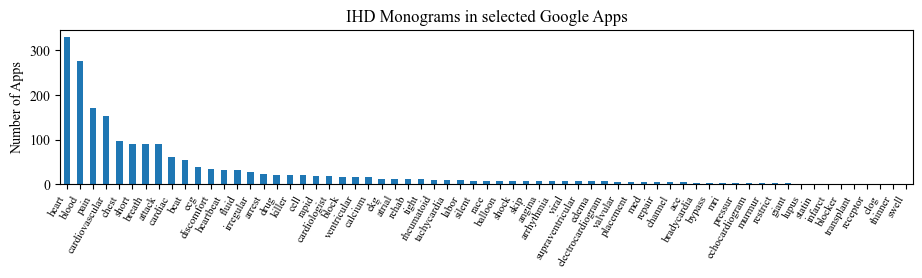

In [16]:
# For df_monogram_1
def plot_disease_terms(column_name, filename):
    # Count the number of rows with each disease term in the column
    term_counts = df_temp[column_name].explode().value_counts()
    # Create a bar plot of the frequency for each disease term
    fig, ax = plt.subplots(figsize=(11, 2))
    term_counts.plot.bar(ax=ax)
    # ax.set_xlabel('Disease Monograms in selected Apps')
    ax.set_ylabel('Number of Apps') # Is this calculating per row? Its not. Is that distinction important?
    # This is only to see the distribution of monograms and bigrams, and see their names, so that we can select the apps accordingly
    # We are not using these 'number of rows' directly, so its not relevant. I can change the name into frequency of occurence
    ax.set_title(f'IHD Monograms in selected Google Apps')
    # Rotate the x-axis labels by 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=8)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/google_apps_plots'

# Create the plot directory if it doesn't exist
# if not os.path.exists(plot_directory):
#     os.makedirs(plot_directory)

# Call the function for each column of disease terms
plot_disease_terms('combined_monogram_terms', 'Disease Monograms in selected IHD Apps.pdf')

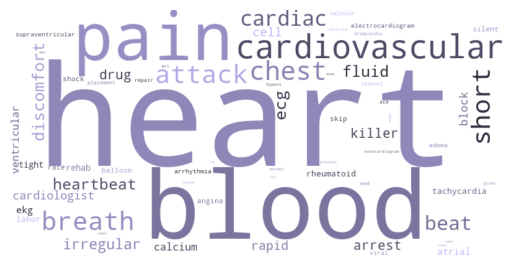

In [92]:

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=wc.get_single_color_func('#998ec3')).generate_from_frequencies(df_temp['combined_monogram_terms'].explode().value_counts())

fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
fig.savefig("google_monograms.pdf", dpi=300)

In [15]:
# This if the final dataframe for IHD diseases. How relevant is it?
ihd_temp = df_temp

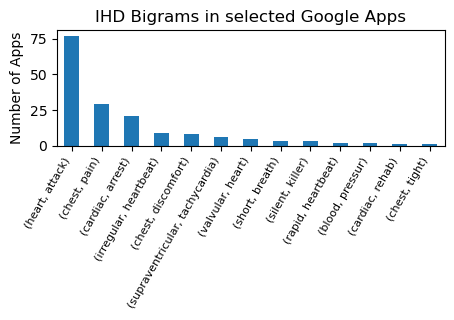

In [16]:
import matplotlib.pyplot as plt
import os

## I want to see the distibution of the monograms and bigrams in all of the selected apps in each of the dataframes
# df_monogram_1 = df[df['total_count_monograms_app'] != 0]
# df_monogram_2 = df[df['total_count_monograms_app'] > 1]
# df_bigram_1 = df[df['total_count_bigrams_app'] != 0]
# df_bigram_2 = df[df['total_count_bigrams_app'] > 1]


## All these apps have only one bigram - lets see which ones they are, and if they are relevant
## Counting the Frequency of IHD disease terms overall in the filtered apps
# Define a function to create a bar plot for a given column of disease terms

# For df_monogram_1
def plot_disease_terms(column_name, filename):
    # Count the number of rows with each disease term in the column
    term_counts = ihd_temp[column_name].explode().value_counts()
    # Create a bar plot of the frequency for each disease term
    fig, ax = plt.subplots(figsize=(5, 1.5))
    term_counts.plot.bar(ax=ax)
    # ax.set_xlabel('IHD Bigrams in selected Google Apps')
    ax.set_ylabel('Number of Apps')
    ax.set_title(f'IHD Bigrams in selected Google Apps')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=8)
    plot_filename = os.path.join(plot_directory, filename)
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/google_apps_plots'

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Call the function for each column of disease terms
plot_disease_terms('combined_bigram_terms', 'combined_bigram_terms_ihd_temp_bigram_2.pdf')
# plt.savefig('Frequency of Bigram Disease terms in Descriptions.png') # Not sure what this is for


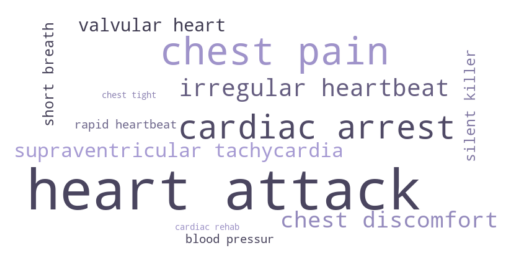

In [89]:
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=wc.get_single_color_func('#998ec3')).generate_from_frequencies(df_temp['combined_bigram_terms'].apply(lambda x: [' '.join(t) for t in x]).explode().value_counts())

fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
fig.savefig("google_bigrams.pdf", dpi=300)

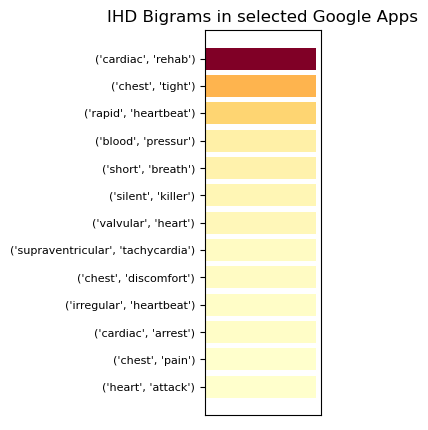

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# For df_monogram_1
def plot_disease_terms(column_name, filename):
    # Count the number of rows with each disease term in the column
    term_counts = ihd_temp[column_name].explode().value_counts()
    
    # Get the terms and their corresponding frequencies
    terms = term_counts.index
    frequencies = term_counts.values
    
    # Sort terms and frequencies by frequency in descending order
    sorted_indices = np.argsort(frequencies)[::-1]
    terms = terms[sorted_indices]
    frequencies = frequencies[sorted_indices]
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(1.5, 5))
    
    # Create a colormap with a range of colors
    cmap = plt.cm.get_cmap('YlOrRd', max(frequencies) - min(frequencies) + 1)
    
    # Create a vertical bar for each term with a color representing its frequency
    for i, (term, frequency) in enumerate(zip(terms, frequencies)):
        # Plot the bar in reversed order to have most frequent at the top
        ax.barh(len(terms) - i - 1, 1, color=cmap(frequency - min(frequencies)))
    
    # Set the y-axis labels and their alignment
    ax.set_yticks(range(len(terms)))
    ax.set_yticklabels(terms, fontsize=8)
    
    # Remove x-axis labels and ticks
    ax.set_xticks([])
    
    # Set the title
    ax.set_title(f'IHD Bigrams in selected Google Apps')
    
    # Save the plot if filename is provided
    if filename:
        plot_filename = os.path.join(plot_directory, filename)
        plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    
    plt.show()

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/google_apps_plots'

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Call the function for each column of disease terms
plot_disease_terms('combined_bigram_terms', 'combined_bigram_terms_ihd_temp_bigram_2.pdf')


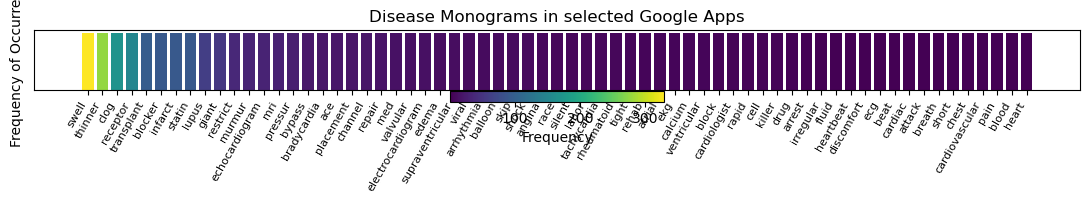

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np

# For df_monogram_1
def plot_disease_terms(column_name, filename):
    # Count the number of rows with each disease term in the column
    term_counts = df_temp[column_name].explode().value_counts()
    unique_terms = term_counts.index.tolist()
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(11, 2))
    
    # Create a colormap for the heatmap
    cmap = plt.cm.viridis
    
    # Calculate normalized frequencies for color mapping
    frequencies = term_counts.values
    normalized_frequencies = (frequencies - np.min(frequencies)) / (np.max(frequencies) - np.min(frequencies))
    
    # Plot the heatmap-like bar plot
    bars = ax.bar(range(len(unique_terms)), [1] * len(unique_terms), color=cmap(normalized_frequencies))
    
    # Customize y-axis ticks and labels (inverted order)
    ax.set_xticks(range(len(unique_terms)))
    ax.set_xticklabels(unique_terms[::-1], fontsize=8, rotation=60, ha='right')
    
    # Remove y-axis ticks and labels
    ax.set_yticks([])
    ax.set_ylabel('Frequency of Occurrence')
    
    # Set title
    ax.set_title(f'Disease Monograms in selected Google Apps')
    
    # Create a colorbar to show frequency legend below the plot
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(frequencies), vmax=np.max(frequencies)))
    sm._A = []
    cbar = plt.colorbar(sm, ax=ax, pad=0.01, orientation='horizontal')
    cbar.set_label('Frequency')
    
    # Save and display the plot
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/google_apps_plots'

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Call the function for each column of disease terms
plot_disease_terms('combined_monogram_terms', 'Disease Monograms in selected IHD Apps.pdf')


## Checking how relevant the IHD apps are

board


/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_42589/836687970.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(terms, rotation=45, ha='right')


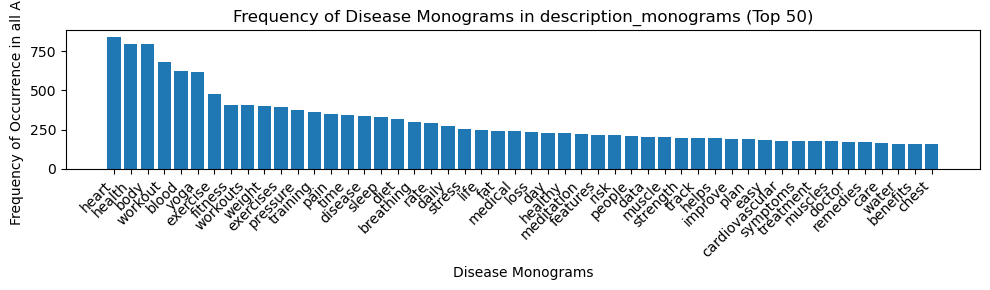

In [ ]:
## This was before taking out some lonely bigrams

import matplotlib.pyplot as plt
from collections import Counter
import ast

# Define the plot directory
plot_directory = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/ihd_google_apps_plots' #change here

# Create the plot directory if it doesn't exist
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)
    
def plot_disease_terms(column_name):
    # Flatten the list of disease terms in each row
    all_terms = [term for row_terms in df_temp[column_name] for term in row_terms]
    # Count the frequency of each disease term
    term_counts = Counter(all_terms)
    print(all_terms[11])
    # Select the top 100 most common disease terms
    top_terms = term_counts.most_common(50)
    # Extract the terms and their frequencies
    terms, frequencies = zip(*top_terms)
    # Create a bar plot of the frequencies
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.bar(terms, frequencies)
    ax.set_xlabel('Disease Monograms')
    ax.set_ylabel('Frequency of Occurrence in all Apps')
    ax.set_title(f'Frequency of Disease Monograms in {column_name} (Top 50)')
    ax.set_xticklabels(terms, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    # plot_filename = os.path.join(plot_directory, f'{ax.get_title()}_{which_disease}.png')
    fig.savefig(plot_filename)

# Call the function for each column of disease terms
plot_disease_terms('description_monograms')


Monograms being plotted: ('heart', 'health', 'body', 'workout', 'blood', 'yoga', 'exercise', 'fitness', 'workouts', 'weight', 'exercises', 'pressure', 'training', 'pain', 'time', 'disease', 'sleep', 'diet', 'breathing', 'rate', 'daily', 'stress', 'life', 'fat', 'medical', 'loss', 'day', 'healthy', 'meditation', 'features', 'risk', 'people', 'data', 'muscle', 'strength', 'track', 'helps', 'improve', 'plan', 'easy', 'cardiovascular', 'symptoms', 'treatment', 'muscles', 'doctor', 'remedies', 'care', 'water', 'benefits', 'chest')


/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_42589/3362241960.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(terms, rotation=45, ha='right')


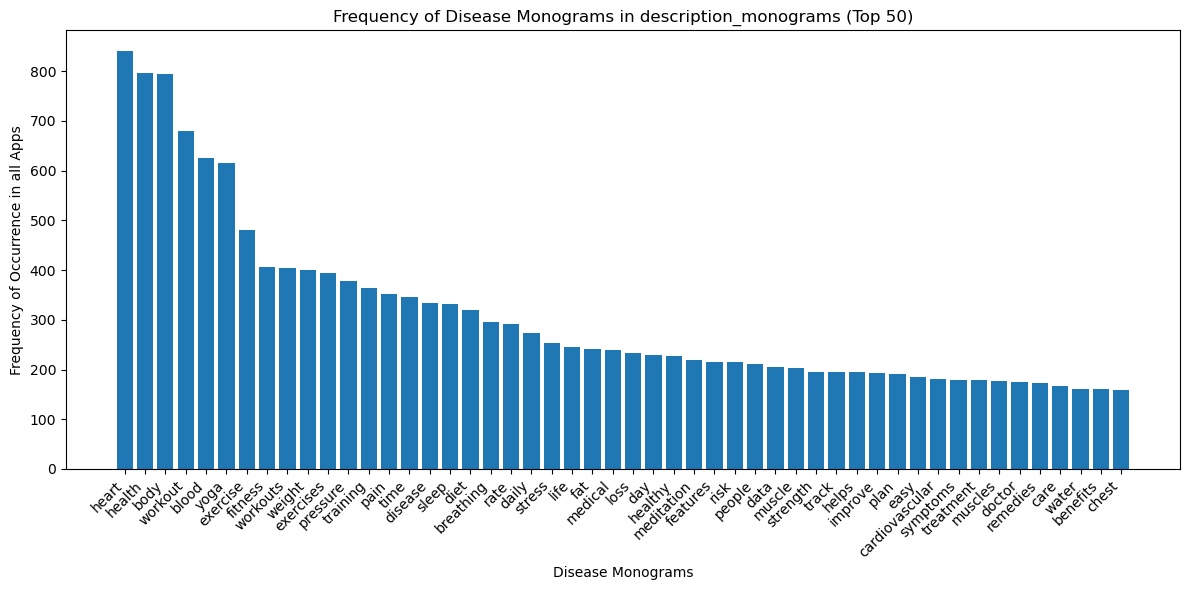

In [ ]:
def plot_disease_terms(column_name):
    # Flatten the list of disease terms in each row
    all_terms = [term for row_terms in df_temp[column_name] for term in row_terms]
    # Count the frequency of each disease term
    term_counts = Counter(all_terms)
    # Select the top 50 most common disease terms
    top_terms = term_counts.most_common(50)
    # Extract the terms and their frequencies
    terms, frequencies = zip(*top_terms)
    
    # Print the list of monograms being plotted
    print("Monograms being plotted:", terms)
    
    # Create a bar plot of the frequencies
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(terms, frequencies)
    ax.set_xlabel('Disease Monograms')
    ax.set_ylabel('Frequency of Occurrence in all Apps')
    ax.set_title(f'Frequency of Disease Monograms in {column_name} (Top 50)')
    ax.set_xticklabels(terms, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    # plot_filename = os.path.join(plot_directory, f'{ax.get_title()}_{which_disease}.png')
    fig.savefig(plot_filename)

# Call the function for each column of disease terms
plot_disease_terms('description_monograms')

# 1 -


In [ ]:
# Making CSV for IHD diseases
ihd_temp = df_temp

import pandas as pd

# Assuming your DataFrame is named df
# ihd_temp.to_csv('IHD_google_apps.csv', index=False) #change the file name here


In [ ]:
# Calculate string lengths and create a new column
ihd_temp['description_length'] = ihd_temp['description'].apply(len)

# Assuming your DataFrame is named df
ihd_temp.to_csv('IHD_google_apps.csv', index=False) #change the file name here

ihd_temp['description_length']

0       390
1      2112
2       617
3      1086
4      1566
       ... 
583    2112
584    2049
585    1221
586    3313
587    2150
Name: description_length, Length: 588, dtype: int64

## IHD example app for flow chart

In [ ]:
# import pandas as pd

# Assuming your DataFrame is named 'df'
random_row = ihd_temp.sample(n=1)

print(random_row)

random_row_dict = random_row.to_dict('records')[0]

for column, value in random_row_dict.items():
    print(f"{column}: {value}")


## I selected this app by looking at the csv file directly on pages
## This is the app ID - 'com.app.p3982CJ'
# The above code is not needed then, but just keeping it for now

                   id title                                           summary  \
369  com.actofit.mfit  Mfit  Mfit Health &amp; Workouts for employee wellness   

                                           description      released  \
369  Mfit Employee Wellness App is the go-to app th...  Jul 10, 2019   

     installs_2020  installs_2021  installs_2022 size android_2020  ...  \
369            NaN            NaN             26  NaN          NaN  ...   

    combined_monogram_terms disease_terms_description_bigrams  \
369    [heart, beat, chest]                                []   

     disease_terms_summary_bigrams  disease_terms_title_bigrams  \
369                             []                           []   

     disease_terms_description_bigrams_count  \
369                                        0   

    disease_terms_summary_bigrams_count  disease_terms_title_bigrams_count  \
369                                   0                                  0   

     total_count_bigr

In [ ]:
# Create a new DataFrame by dropping columns from the original DataFrame
ihd_temp_to_plot = ihd_temp[['id', 'title', 'released', 'size', 'android_2020', 'android_2021', 'android_2022', 'price', 'score', 
                               'ratings', 'reviews', 'iap', 'category', 'language', 'installs_2022', 'installs_2021', 'installs_2022', 'description_length']]
ihd_temp_to_plot
# Saving the csv file
ihd_temp_to_plot.to_csv('ihd_google_to_plot.csv', index=False) #change the file name here

'id', 'title', 'released', 'size', 'android_2020', 'android_2021', 'android_2022', 'price', 'score', 'ratings', 'reviews', 'iap', 'category', 'language'

### --------------Break point ------------------------

## Explorative Data Analysis

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
import datetime

# Assuming you have a CSV file called 'filename.csv' in the current directory

# folder_path = "/Users/keerthidubbala/Desktop/July_2023_mHealthapps"  # Specify the folder path where your CSV files are located
file_extensions = [".csv"]  # Specify the file extensions of the files you want to load
# os.chdir(folder_path)  # Set the current working directory to the folder path

# Read the CSV file into a DataFrame
ihd_df = pd.read_csv('IHD_google_to_plot.csv')

In [3]:
ihd_df

id  \
0                               com.app.theusdoctor   
1                     com.samantharoobol.kettlebell   
2        com.fitmetrix.thegreateesthitboxingfitness   
3                   com.andromo.dev663676.app683641   
4               com.medpresso.Lonestar.clinanesfull   
..                                              ...   
583                 com.wFruitsandBenefits_12949805   
584  com.crownfitness.homeworkout.weightlossworkout   
585                 net.easycreation.drink_reminder   
586                 com.imperialhealthtech.lifeline   
587                    androidapps.angel.meditation   

                              title      released  size android_2020  \
0                     The US Doctor   Apr 9, 2021   57M          NaN   
1    The Kettlebell Challenge - Fat  Nov 17, 2018  5.1M   4.4 and up   
2                       RESULTS PGH  Jan 18, 2019   37M          NaN   
3    Health Benefits of Fruits : He  Oct 19, 2017  6.6M   4.1 and up   
4     Clinical Anesthesia Full Text  Jun 11, 2018   10M          NaN   
..                              ...           ...   ...          ...   
583               Fruits & Benefits   Jan 4, 2021   23M          NaN   
584  Easy Home Workout - Body Fitne  Oct 31, 2019  7.2M          NaN   
585            Water Drink Reminder  Oct 15, 2017  5.5M          NaN   
586  Centafit: Health Check, Screen   Feb 4, 2021   34M          NaN   
587  Flame Meditate: Mindful breath  Oct 29, 2019  7.2M   5.0 and up   

    android_2021 android_2022  price  score  ratings  reviews    iap  \
0     5.0 and up          5.0    0.0   0.00      0.0      0.0  False   
1     4.4 and up          4.4    0.0   0.00      0.0      0.0   True   
2     5.0 and up          5.0    0.0   0.00      0.0      0.0  False   
3     4.1 and up          4.1    0.0   0.00      0.0      0.0  False   
4     5.0 and up          5.0    0.0   0.00      0.0      0.0   True   
..           ...          ...    ...    ...      ...      ...    ...   
583   4.4 and up          4.4    0.0   0.00      0.0      0.0  False   
584   4.4 and up          4.4    0.0   0.00      0.0      0.0  False   
585   4.1 and up          5.0    0.0   4.48  12466.0     53.0   True   
586   5.0 and up          6.0    0.0   0.00      0.0      0.0   True   
587   5.0 and up          5.0    0.0   0.00      0.0      0.0  False   

             category language  installs_2022  installs_2021  installs_2022.1  \
0             Medical  English             82            9.0               82   
1    Health & Fitness  English          21199        16318.0            21199   
2    Health & Fitness  English            237          148.0              237   
3    Health & Fitness  English          11449        10360.0            11449   
4             Medical  English          10735         8694.0            10735   
..                ...      ...            ...            ...              ...   
583  Health & Fitness  English            326           10.0              326   
584  Health & Fitness  English           1084         1079.0             1084   
585  Health & Fitness  English         666934       625205.0           666934   
586  Health & Fitness  English           1247          312.0             1247   
587  Health & Fitness  English             52           20.0               52   

     description_length  
0                   390  
1                  2112  
2                   617  
3                  1086  
4                  1566  
..                  ...  
583                2112  
584                2049  
585                1221  
586                3313  
587                2150  

[588 rows x 18 columns]

## Saving all the plots

In [ ]:
import matplotlib.pyplot as plt

# Enable interactive mode to prevent figures from displaying immediately
plt.ioff()

# Set the savefig directory and format
savefig_dir = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/IHD_paper1_plots'
savefig_format = 'png'

# Define a function to save the current figure
def save_figure(fig_name):
    fig_path = f'{savefig_dir}/{fig_name}.{savefig_format}'
    plt.savefig(fig_path, format=savefig_format)
    print(f'Saved figure: {fig_path}')

# Disable interactive mode at the end of the notebook
def disable_interactive_mode():
    plt.close('all')
    plt.ion()

# Call the disable_interactive_mode function at the end of the notebook
import atexit
atexit.register(disable_interactive_mode)


<function __main__.disable_interactive_mode()>

## Correlation analysis

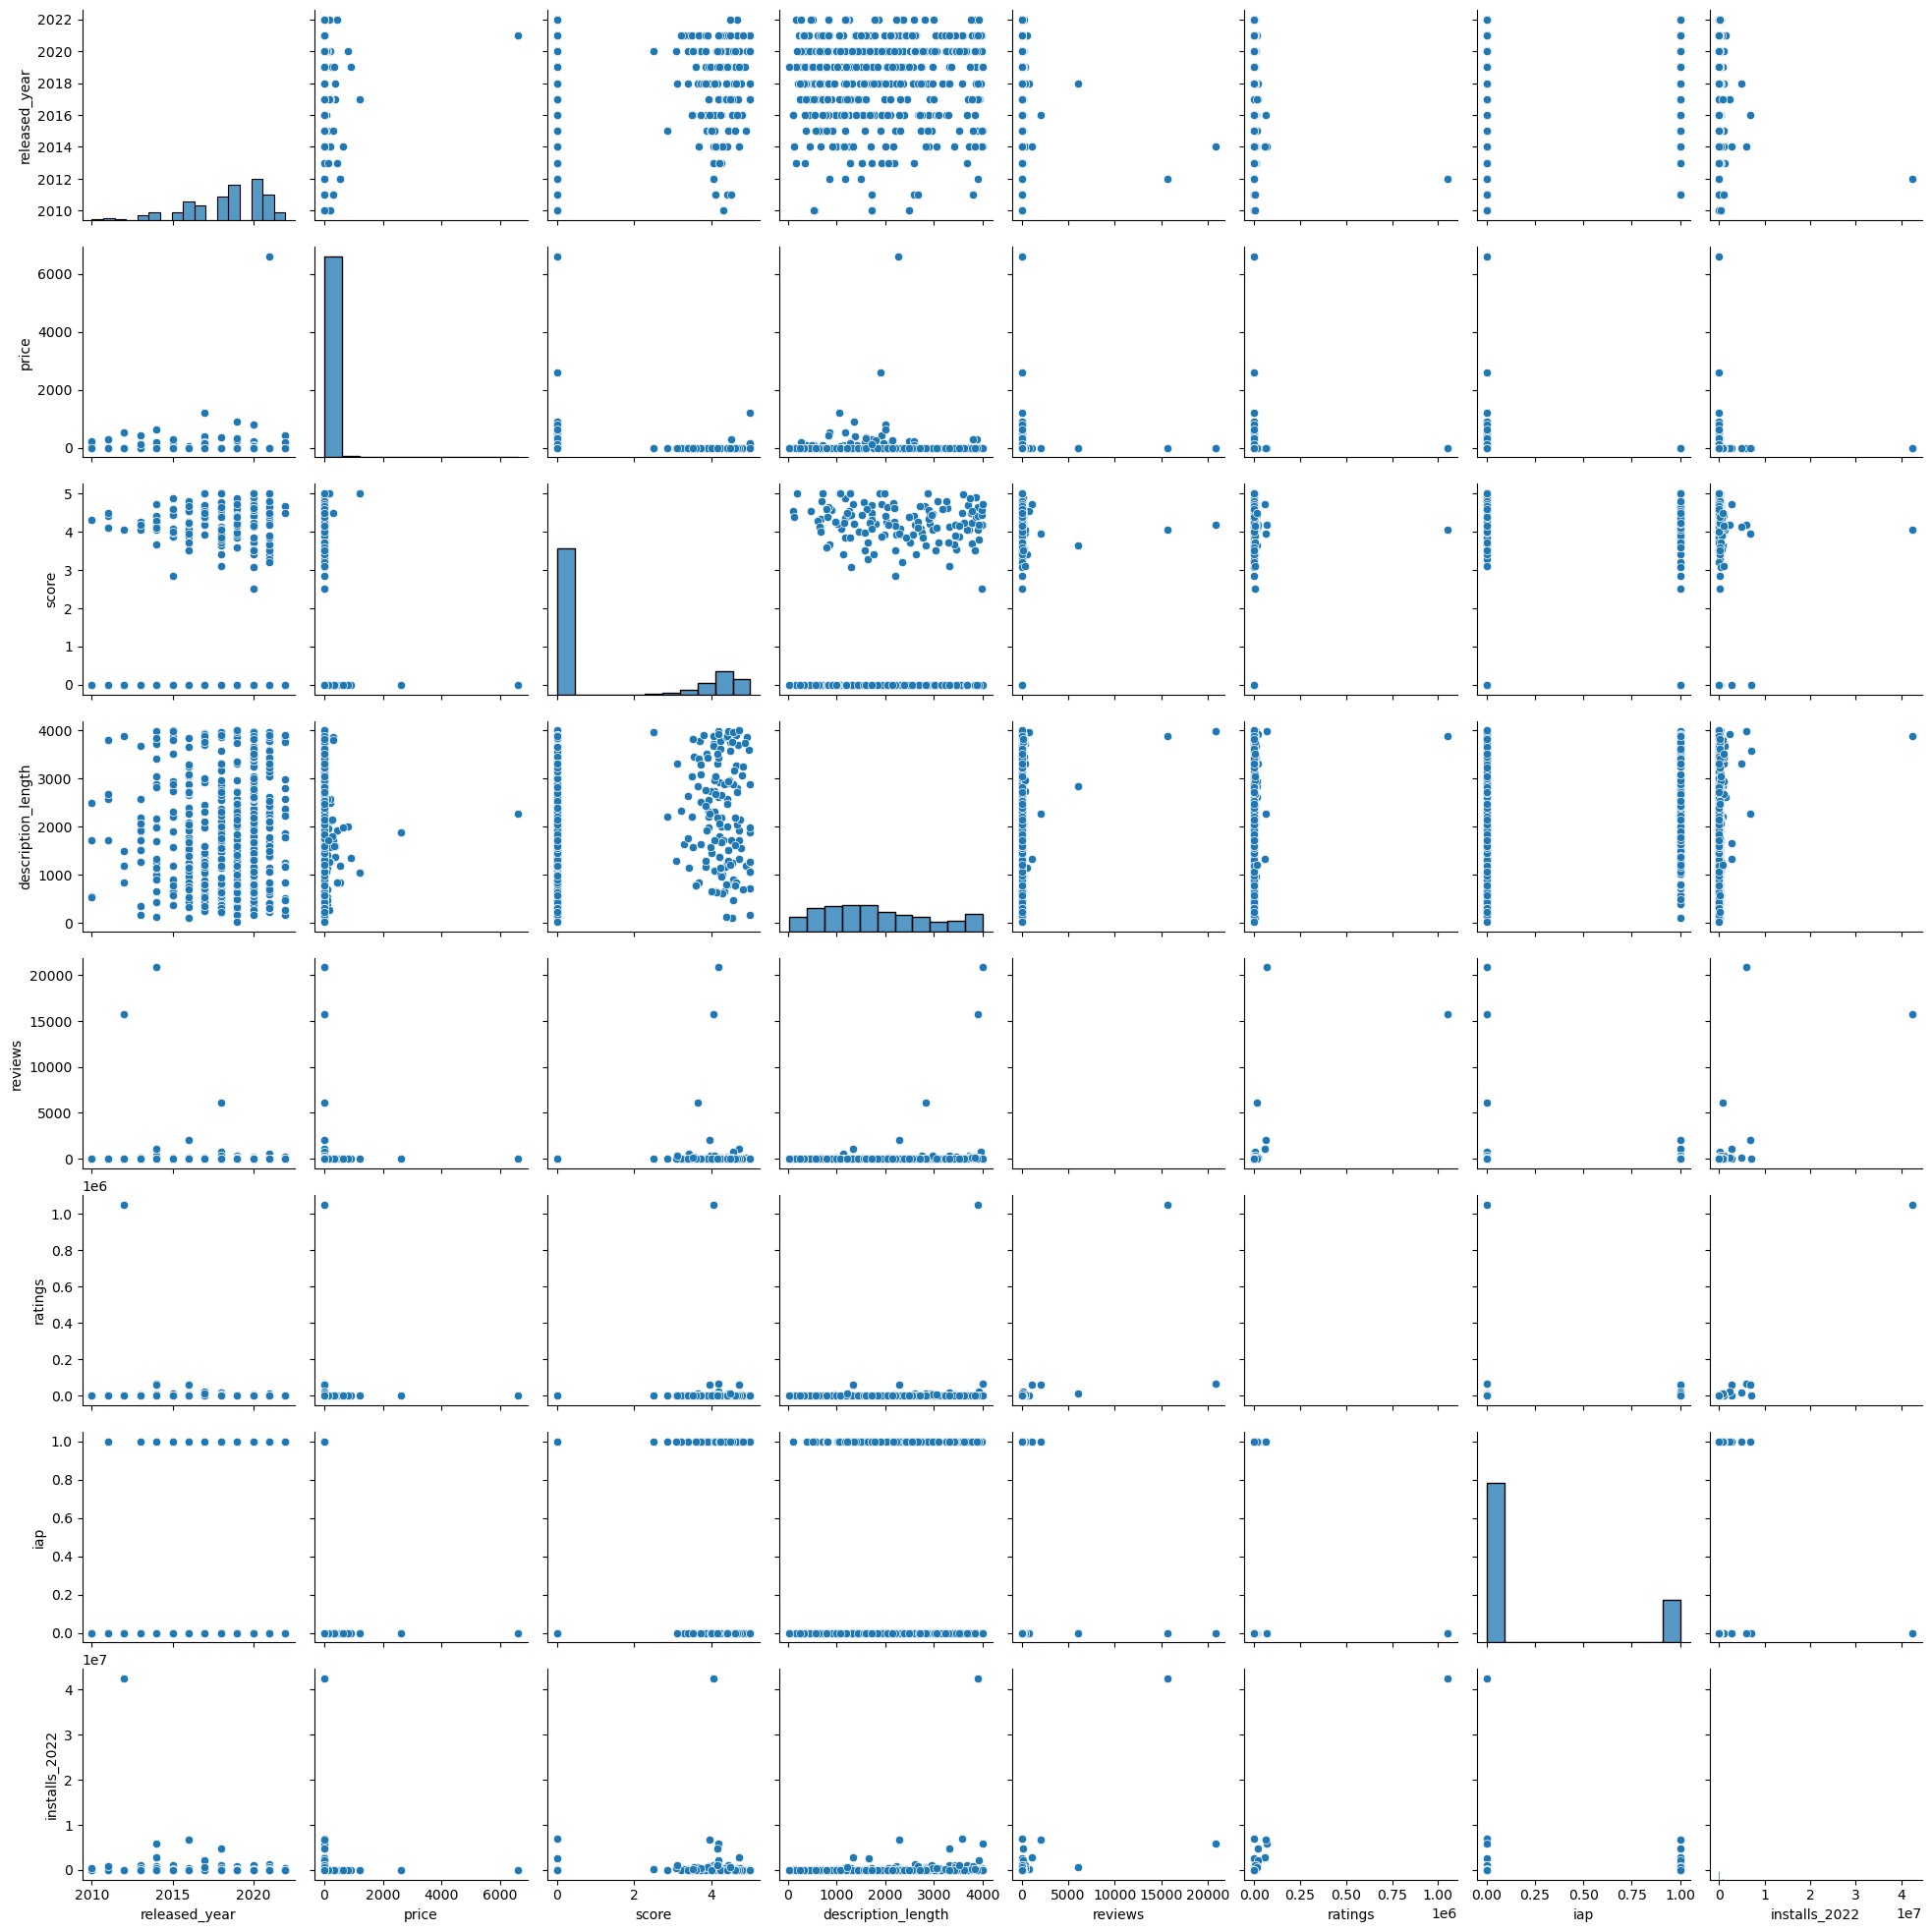

/var/folders/3l/1xf_xmgn11n6d88b01bx4rv00000gn/T/ipykernel_19388/289117253.py:55: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = pairplot_data.corr()


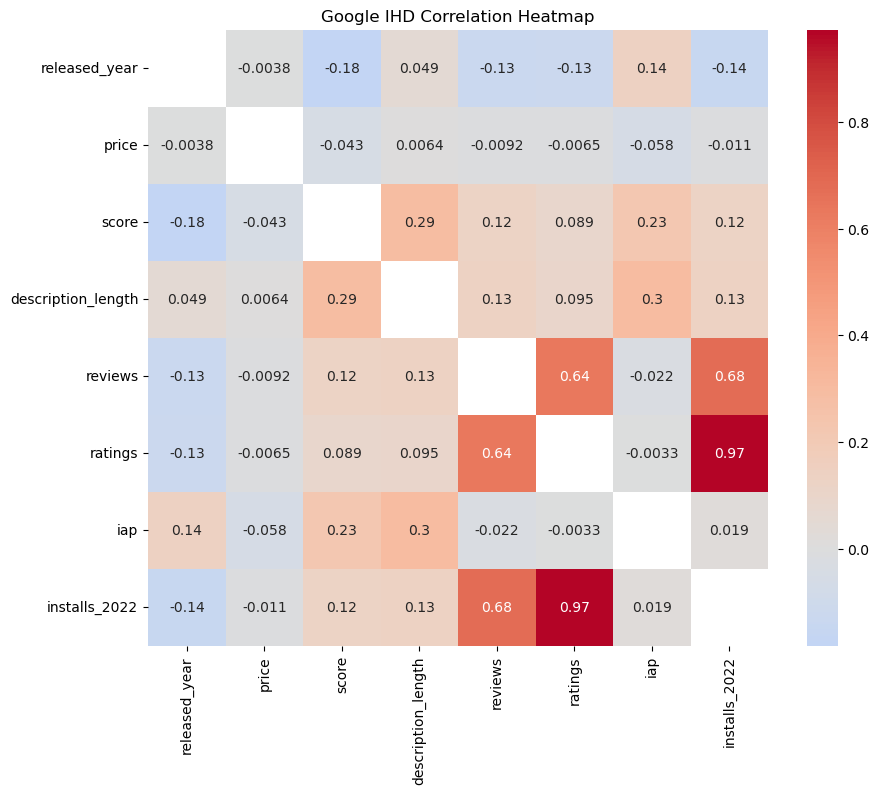

In [4]:
## Correlation without ratings and reviews
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (if not already loaded)
# all_ihd_df = pd.read_csv('your_data.csv')

#----------------------- organising different columns---------


# Replace 'Varies with device' with NaN values in the 'size' column
ihd_df['size'] = ihd_df['size'].replace('Varies with device', np.nan)

# Select values that are numeric and end with 'k'
pattern = r'^[\d,]+\.?\d*[kK]$'
k_values = ihd_df[ihd_df['size'].str.contains(pattern, na=False)]['size']

# Define a function to convert 'k' to millions
def convert_to_millions(size):
    if pd.isna(size):
        return size
    if size[-1].lower() == 'k':  # Convert 'k' or 'K' to lowercase for case-insensitive comparison
        size_numeric = size[:-1]  # Remove the last character 'k'
        size_numeric = size_numeric.replace(',', '')  # Remove commas from the numeric part
        if size_numeric.replace('.', '', 1).isdigit():  # Check if the remaining part is numeric
            return str(round(float(size_numeric) / 1000, 2)) + 'M'
    return size

# Apply the function to the 'size' column
ihd_df['size_mb'] = ihd_df['size'].apply(convert_to_millions)

# Convert the timestamp column to datetime type if it's not already
ihd_df['released'] = pd.to_datetime(ihd_df['released'], format='%b %d, %Y')

# Extract the year and create a new column
ihd_df['released_year'] = ihd_df['released'].dt.year

ihd_df['iap'] = ihd_df['iap'].astype(int)

# Specify the independent variables
X = ihd_df[['released_year', 'size_mb', 'android_2022', 'price', 'score', 'description_length', 'reviews', 'ratings', 
            'iap']]

# Specify the dependent variable
y = ihd_df['installs_2022']

# Pairplot to visualize relationships
pairplot_data = X.copy()
pairplot_data['installs_2022'] = y
sns.pairplot(pairplot_data)
plt.show()

# Heatmap to visualize correlations with diagonal 1 values replaced
correlation_matrix = pairplot_data.corr()
np.fill_diagonal(correlation_matrix.values, np.nan)  # Replace diagonal values with NaN
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)  # Center the colormap at 0
plt.title('Google IHD Correlation Heatmap')
plt.show()
# Save the figure using the save_figure function
# save_figure('Correlation Heatmap with 0 values in the Diagonal')


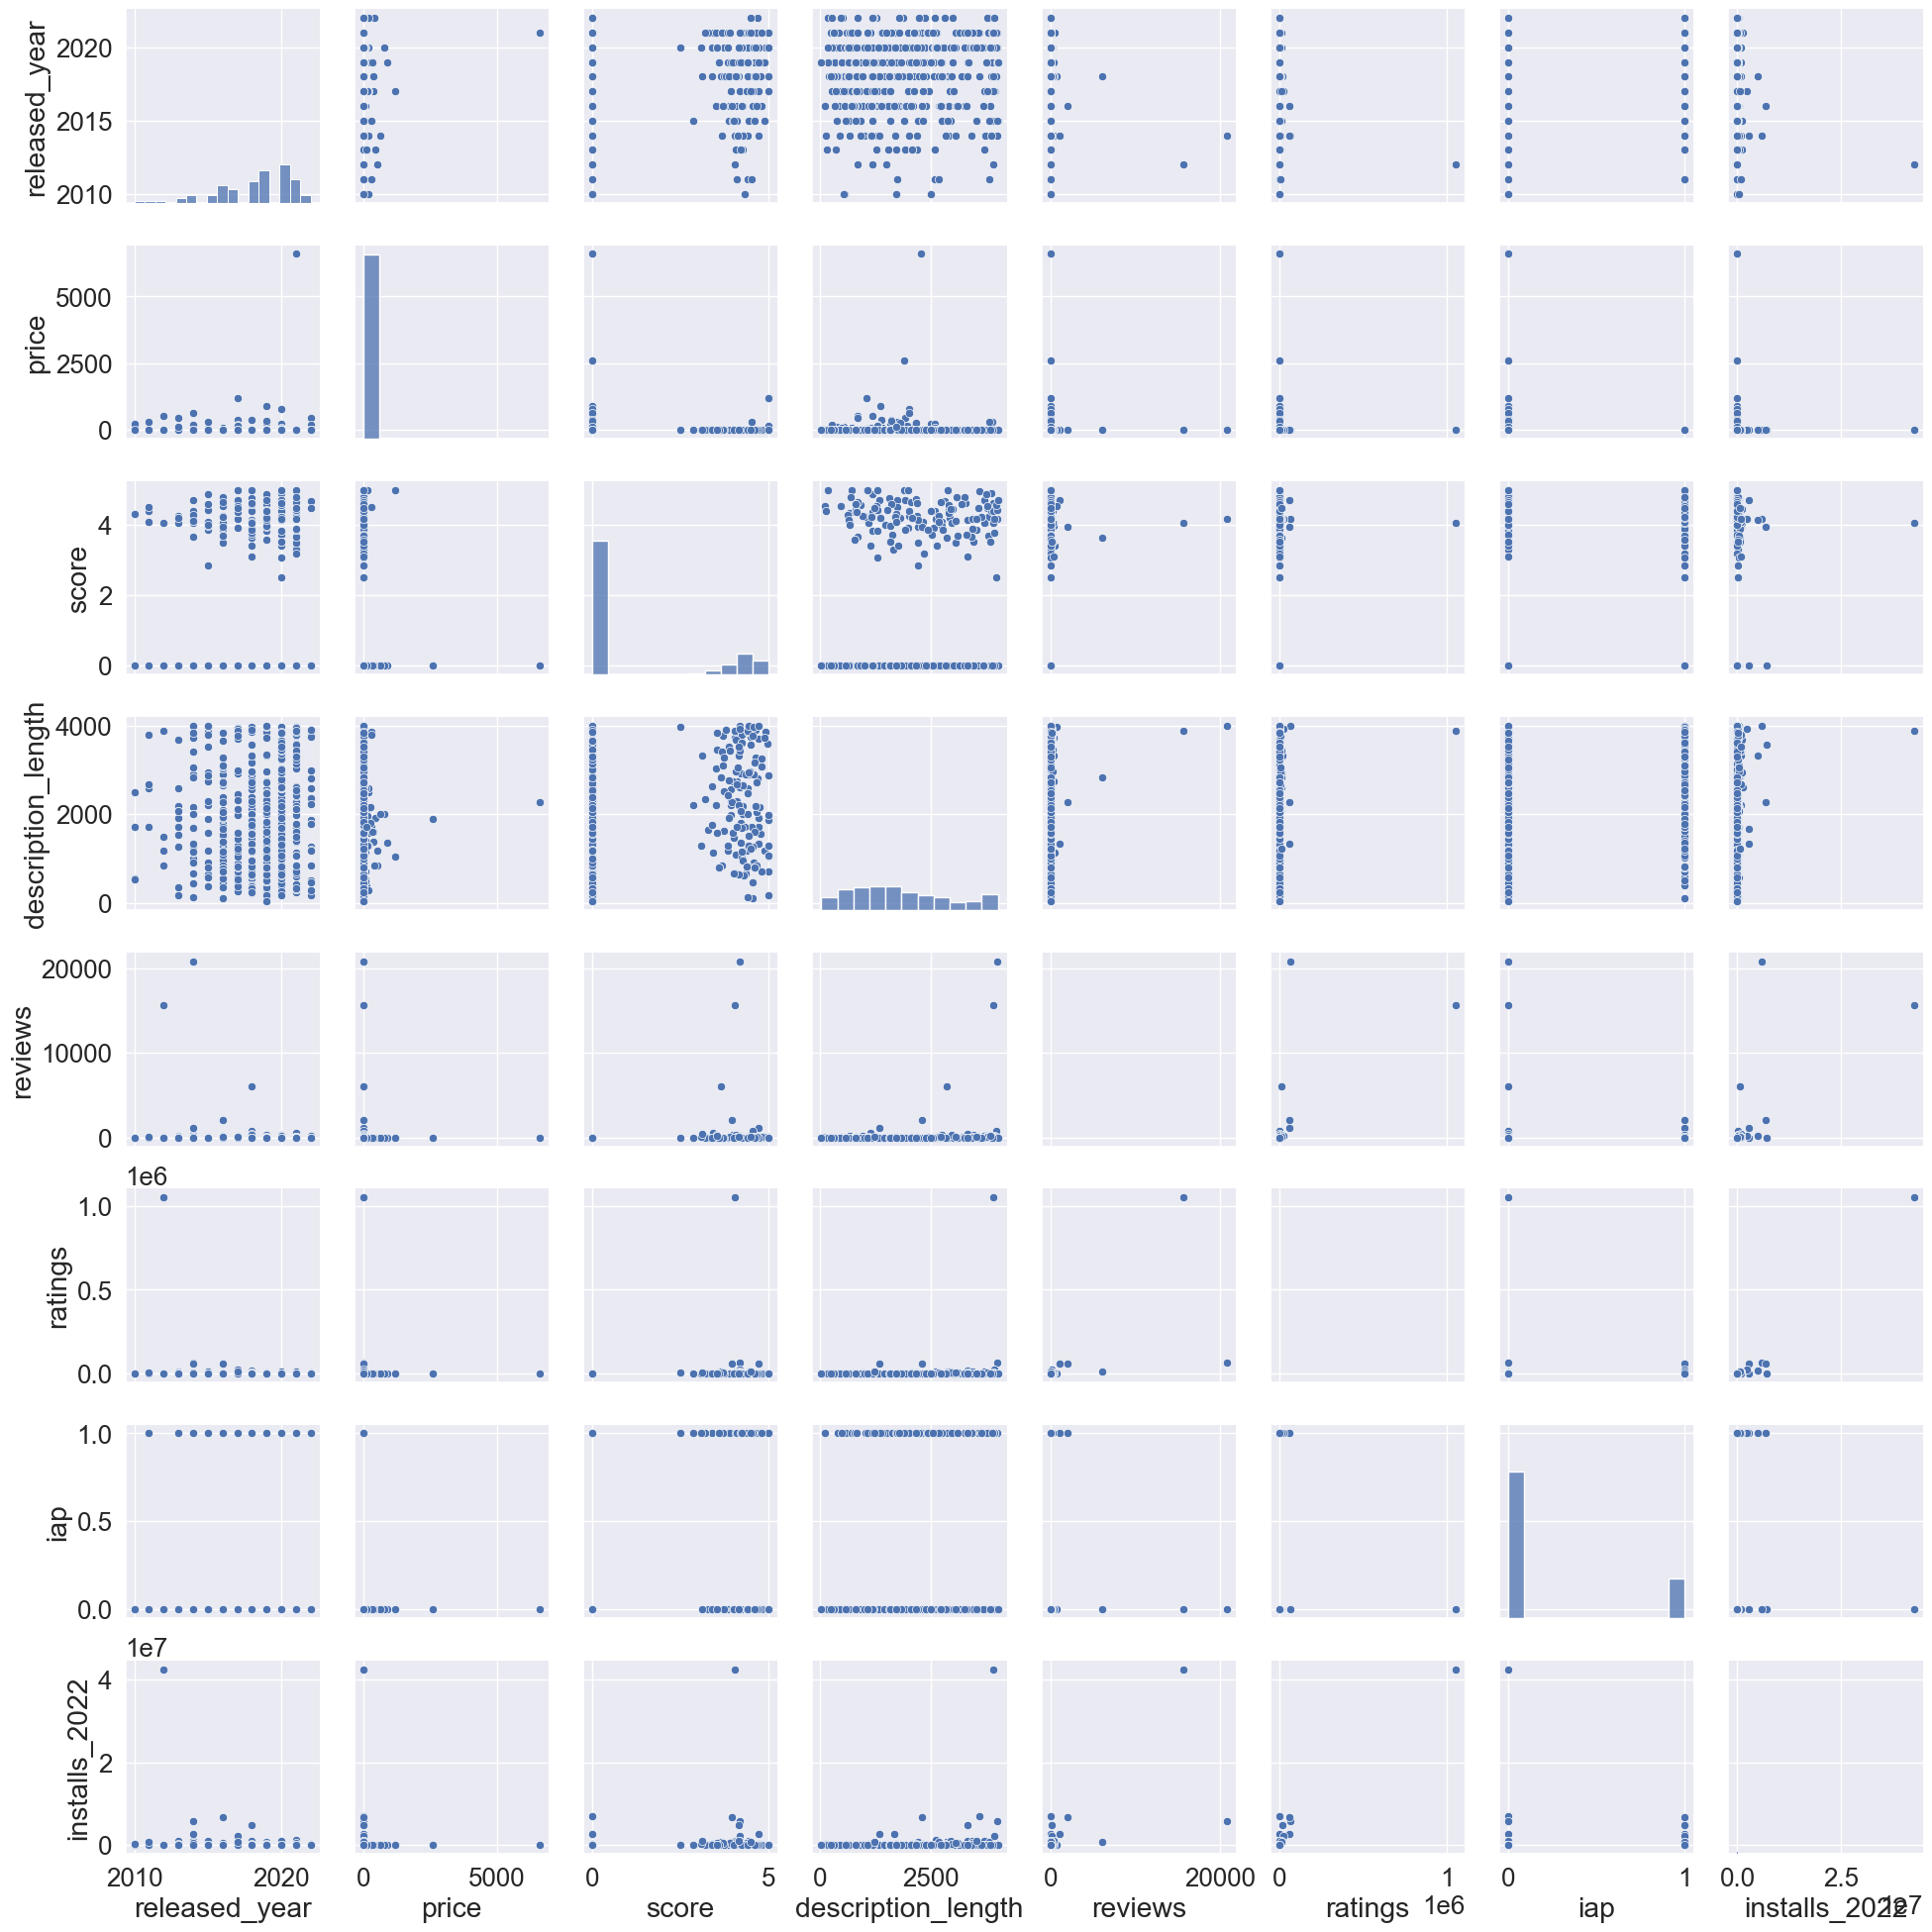

/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_42589/266799471.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = pairplot_data.corr()


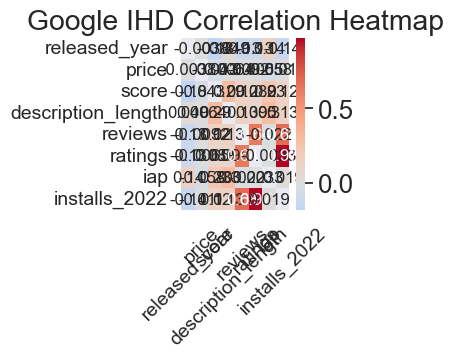

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset and organize columns (previous code)

# Pairplot to visualize relationships
pairplot_data = X.copy()
pairplot_data['installs_2022'] = y
sns.pairplot(pairplot_data)
plt.show()

# Heatmap to visualize correlations with diagonal 1 values replaced
correlation_matrix = pairplot_data.corr()
np.fill_diagonal(correlation_matrix.values, np.nan)  # Replace diagonal values with NaN
plt.figure(figsize=(4, 4))

# Set font size for annotations
sns.set(font_scale=1.7)
annot_kws = {"size": 12}

# Create the heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws=annot_kws)

# Modify the tick labels font size
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Google IHD Correlation Heatmap')
plt.tight_layout()
plt.show()


/var/folders/3l/1xf_xmgn11n6d88b01bx4rv00000gn/T/ipykernel_19388/942568981.py:46: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))


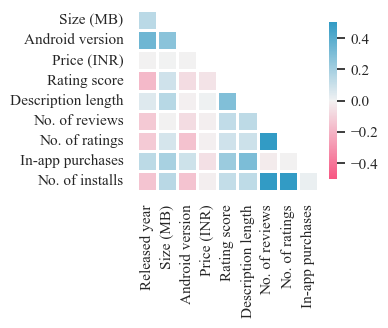

In [75]:
# Correlation plot for paper

color_palette = ["#f1a340", "#998ec3"]  # Define the color palette here
cm = 1/2.54

gdf = pd.read_csv('IHD_google_to_plot.csv')
gdf['size'] = gdf['size'].replace('Varies with device', np.nan)
pattern = r'^[\d,]+\.?\d*[kK]$'
k_values = gdf[gdf['size'].str.contains(pattern, na=False)]['size']

# Define a function to convert 'k' to millions
def convert_to_millions(size):
    if pd.isna(size):
        return size
    if size[-1].lower() == 'k':  # Convert 'k' or 'K' to lowercase for case-insensitive comparison
        size_numeric = size[:-1]  # Remove the last character 'k'
        size_numeric = size_numeric.replace(',', '')  # Remove commas from the numeric part
        if size_numeric.replace('.', '', 1).isdigit():  # Check if the remaining part is numeric
            return str(round(float(size_numeric) / 1000, 2)) + 'M'
    return size

gdf['size_mb'] = gdf['size'].apply(convert_to_millions)
gdf['released'] = pd.to_datetime(gdf['released'], format='%b %d, %Y')
gdf['released_year'] = gdf['released'].dt.year
gdf['iap'] = gdf['iap'].astype(int)

# Preprocess size_mb column
def preprocess_size(value):
    if 'M' in value:
        return float(value.rstrip('M'))
    else:
        return float(value)

gdf['size_mb'] = gdf['size_mb'].apply(lambda x: preprocess_size(x) if isinstance(x, str) else x)
gdf['android_2022_major'] = gdf['android_2022'].str.extract(r'(\d+\.\d+)').fillna('0.0')
gdf['android_2022_major'] = gdf['android_2022_major'].astype(float)

X = gdf[['released_year', 'size_mb', 'android_2022_major', 'price', 'score', 'description_length', 'reviews', 'ratings', 'iap', "installs_2022"]]
sns.set(font_scale=1)
sns.set_theme(style='white')
plt.rcParams["font.family"] = "Times New Roman"

correlation_matrix = X.corr()
np.fill_diagonal(correlation_matrix.values, np.nan) 

mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))
mask = mask[1:, :-1]
corr = correlation_matrix.iloc[1:,:-1].copy()
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

fig, ax = plt.subplots(figsize=(10*cm, 10*cm))
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, vmin=-0.5, vmax=0.5,
           linewidth=1, cbar_kws={"shrink": .6})
ax.set_xticklabels(['Released year', 'Size (MB)', 'Android version', 'Price (INR)', 'Rating score', 'Description length', 'No. of reviews', 'No. of ratings', 'In-app purchases'])
ax.set_yticklabels(['Size (MB)', 'Android version', 'Price (INR)', 'Rating score', 'Description length', 'No. of reviews', 'No. of ratings', 'In-app purchases', 'No. of installs'])

fig.tight_layout()
fig.savefig("Figure4_google.pdf", bbox_inches='tight')

In [14]:
gdf

id  \
0                               com.app.theusdoctor   
1                     com.samantharoobol.kettlebell   
2        com.fitmetrix.thegreateesthitboxingfitness   
3                   com.andromo.dev663676.app683641   
4               com.medpresso.Lonestar.clinanesfull   
..                                              ...   
583                 com.wFruitsandBenefits_12949805   
584  com.crownfitness.homeworkout.weightlossworkout   
585                 net.easycreation.drink_reminder   
586                 com.imperialhealthtech.lifeline   
587                    androidapps.angel.meditation   

                              title      released  size android_2020  \
0                     The US Doctor   Apr 9, 2021   57M          NaN   
1    The Kettlebell Challenge - Fat  Nov 17, 2018  5.1M   4.4 and up   
2                       RESULTS PGH  Jan 18, 2019   37M          NaN   
3    Health Benefits of Fruits : He  Oct 19, 2017  6.6M   4.1 and up   
4     Clinical Anesthesia Full Text  Jun 11, 2018   10M          NaN   
..                              ...           ...   ...          ...   
583               Fruits & Benefits   Jan 4, 2021   23M          NaN   
584  Easy Home Workout - Body Fitne  Oct 31, 2019  7.2M          NaN   
585            Water Drink Reminder  Oct 15, 2017  5.5M          NaN   
586  Centafit: Health Check, Screen   Feb 4, 2021   34M          NaN   
587  Flame Meditate: Mindful breath  Oct 29, 2019  7.2M   5.0 and up   

    android_2021 android_2022  price  score  ratings  reviews    iap  \
0     5.0 and up          5.0    0.0   0.00      0.0      0.0  False   
1     4.4 and up          4.4    0.0   0.00      0.0      0.0   True   
2     5.0 and up          5.0    0.0   0.00      0.0      0.0  False   
3     4.1 and up          4.1    0.0   0.00      0.0      0.0  False   
4     5.0 and up          5.0    0.0   0.00      0.0      0.0   True   
..           ...          ...    ...    ...      ...      ...    ...   
583   4.4 and up          4.4    0.0   0.00      0.0      0.0  False   
584   4.4 and up          4.4    0.0   0.00      0.0      0.0  False   
585   4.1 and up          5.0    0.0   4.48  12466.0     53.0   True   
586   5.0 and up          6.0    0.0   0.00      0.0      0.0   True   
587   5.0 and up          5.0    0.0   0.00      0.0      0.0  False   

             category language  installs_2022  installs_2021  installs_2022.1  \
0             Medical  English             82            9.0               82   
1    Health & Fitness  English          21199        16318.0            21199   
2    Health & Fitness  English            237          148.0              237   
3    Health & Fitness  English          11449        10360.0            11449   
4             Medical  English          10735         8694.0            10735   
..                ...      ...            ...            ...              ...   
583  Health & Fitness  English            326           10.0              326   
584  Health & Fitness  English           1084         1079.0             1084   
585  Health & Fitness  English         666934       625205.0           666934   
586  Health & Fitness  English           1247          312.0             1247   
587  Health & Fitness  English             52           20.0               52   

     description_length  size_mb  
0                   390     57.0  
1                  2112      5.1  
2                   617     37.0  
3                  1086      6.6  
4                  1566     10.0  
..                  ...      ...  
583                2112     23.0  
584                2049      7.2  
585                1221      5.5  
586                3313     34.0  
587                2150      7.2  

[588 rows x 19 columns]

## One simple plot for all simple statistics

### Put everything together first, and then we can make concise plots

In [ ]:
ihd_df['size_mb']

0       57M
1      5.1M
2       37M
3      6.6M
4       10M
       ... 
583     23M
584    7.2M
585    5.5M
586     34M
587    7.2M
Name: size_mb, Length: 588, dtype: object

Average size of IHD Apps:  26.67372586872587 MB


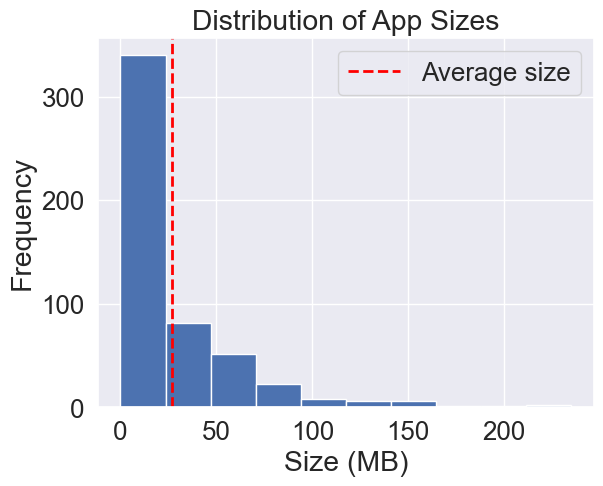

In [ ]:
# Things to analyse: size of apps, avg num of installs, avg price, avg num of ratings, avg num of reviews, iap, 
# releases over the years, 
# May be i can analyse them using the different clusters? - we decided not to. It might complicate things.
### Keep it simple

# 1. avg size of apps
# import matplotlib.pyplot as plt
# import pandas as pd

# Preprocess size_mb column
def preprocess_size(value):
    if 'M' in value:
        return float(value.rstrip('M'))
    else:
        return float(value)

ihd_df['size_mb'] = ihd_df['size_mb'].apply(lambda x: preprocess_size(x) if isinstance(x, str) else x)

# Take the average, excluding NaN values
avg_size = np.nanmean(ihd_df['size_mb'])

# Print the average size
print("Average size of IHD Apps: ", avg_size, "MB")

# Plot a histogram
plt.hist(ihd_df['size_mb'].dropna())
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')
plt.axvline(avg_size, color='red', linestyle='dashed', linewidth=2, label='Average size')
plt.legend()
plt.show()
plt.savefig('Distribution of IHD App Sizes.png')



Average size of IHD Apps:  26.67372586872587 MB


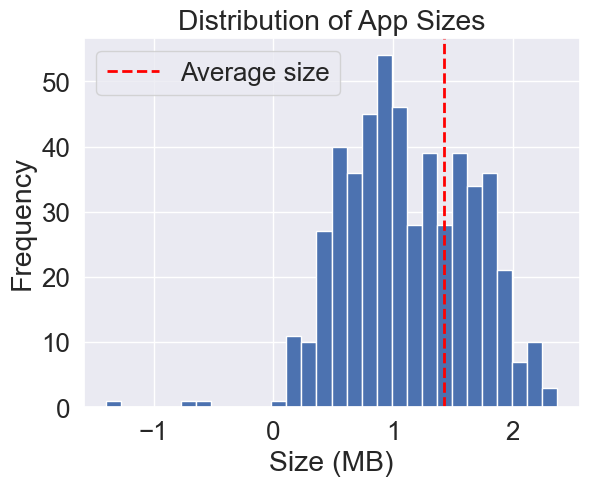

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Preprocess size_mb column
def preprocess_size(value):
    if 'M' in value:
        return float(value.rstrip('M'))
    else:
        return float(value)

ihd_df['size_mb'] = ihd_df['size_mb'].apply(lambda x: preprocess_size(x) if isinstance(x, str) else x)

# Take the average, excluding NaN values
avg_size = np.nanmean(ihd_df['size_mb'])

# Print the average size
print("Average size of IHD Apps: ", avg_size, "MB")

# Plot a histogram
plt.hist(np.log10(ihd_df['size_mb'].dropna()), bins=30)  # Adjust the number of bins as needed
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')
plt.axvline(np.log10(avg_size), color='red', linestyle='dashed', linewidth=2, label='Average size')
plt.legend()
# plt.xscale('log')  # Set x-axis to log scale
plt.show()


In [ ]:
# Display top 10 largest app sizes
top_20_apps = ihd_df.nlargest(20, 'size_mb')
print("\nTop 10 Apps with Largest Sizes:")
print(top_20_apps)
top_20_apps


Top 10 Apps with Largest Sizes:
                                          id                           title  \
383                   com.innocirc.vcpatient  MyHealthcare Patient Ecosystem   
559                   com.innocirc.vcpatient  MyHealthcare Patient Ecosystem   
161                    com.coachcare.medthin                        Med*Thin   
418                   ai.mxlabs.heartmonitor  Heart Monitor: Blood Pressure    
295                   com.deepmedi.homanager  Haley ( breath / blood pressur   
537                   com.deepmedi.homanager  Haley ( breath / blood pressur   
453                 com.linegym.vibrantlungs                   Vibrant Lungs   
204       com.trainerize.thephysiqueengineer           The Physique Engineer   
13          com.trainerize.stinarstrengthlab             Stinar Strength Lab   
32               com.trainerize.notedfitness                    Seed Fitness   
548                           ai.rimads.avey        Avey - Empowering Health   
293    

id                           title  \
383                   com.innocirc.vcpatient  MyHealthcare Patient Ecosystem   
559                   com.innocirc.vcpatient  MyHealthcare Patient Ecosystem   
161                    com.coachcare.medthin                        Med*Thin   
418                   ai.mxlabs.heartmonitor  Heart Monitor: Blood Pressure    
295                   com.deepmedi.homanager  Haley ( breath / blood pressur   
537                   com.deepmedi.homanager  Haley ( breath / blood pressur   
453                 com.linegym.vibrantlungs                   Vibrant Lungs   
204       com.trainerize.thephysiqueengineer           The Physique Engineer   
13          com.trainerize.stinarstrengthlab             Stinar Strength Lab   
32               com.trainerize.notedfitness                    Seed Fitness   
548                           ai.rimads.avey        Avey - Empowering Health   
293                    it.unipd.cardiologyar               Congenital heARts   
448                          com.airofit_app                         Airofit   
24                com.alivecor.kardiastation                   KardiaStation   
71                                com.weward                          WeWard   
381             com.neurofenix.neurofenixapp                      Neurofenix   
550                   com.trucorp.trumonitor  TruMonitor - TruVent - Simulat   
253  com.hivebrain.andrewjohnson.releasepain  Release Pain with Andrew Johns   
353                      com.ddpyoga.android  DDP YOGA NOW - Workouts, Motiv   
153     com.trainerize.absoluteinhomefitness        Absolute In Home Fitness   

      released  size android_2020 android_2021 android_2022  price     score  \
383 2020-04-03  235M          NaN   6.0 and up          6.0    0.0  3.520000   
559 2020-04-03  235M          NaN   6.0 and up          6.0    0.0  3.520000   
161 2019-12-17  201M          NaN   6.0 and up          6.0    0.0  0.000000   
418 2021-05-12  169M          NaN   8.0 and up            9    0.0  3.850000   
295 2019-06-27  160M          NaN   7.0 and up          7.0    0.0  3.594594   
537 2019-06-27  160M          NaN   7.0 and up          7.0    0.0  3.594594   
453 2021-03-09  154M          NaN   5.1 and up          5.1    0.0  0.000000   
204 2019-03-16  153M          NaN   6.0 and up          6.0    0.0  0.000000   
13  2017-04-28  147M          NaN   6.0 and up          6.0    0.0  0.000000   
32  2017-11-24  145M          NaN   6.0 and up          6.0    0.0  0.000000   
548 2020-06-23  137M   4.1 and up   7.0 and up          7.0    0.0  4.160000   
293 2021-03-22  136M          NaN   5.1 and up          5.1    0.0  0.000000   
448 2019-09-11  133M   4.4 and up   4.4 and up          5.0    0.0  4.148148   
24  2021-02-24  123M          NaN   6.0 and up          6.0    0.0  0.000000   
71         NaT  122M          NaN   6.0 and up          5.0    0.0  0.000000   
381        NaT  122M          NaN   4.4 and up          4.4    0.0  0.000000   
550 2018-09-10  116M   4.4 and up   5.0 and up          7.0    0.0  3.400000   
253 2020-06-16  111M   4.1 and up   4.1 and up          4.1  210.0  0.000000   
353 2015-11-05  101M   5.0 and up   5.0 and up          5.0    0.0  4.440678   
153 2017-10-18   99M          NaN   6.0 and up          6.0    0.0  0.000000   

     ratings  reviews  iap          category language  installs_2022  \
383    363.0    169.0    0           Medical  English          75807   
559    363.0    169.0    0           Medical  English          75807   
161      0.0      0.0    0  Health & Fitness  English             15   
418   1972.0     17.0    1           Medical  English         127786   
295     68.0      8.0    1           Medical  English          39579   
537     68.0      8.0    1           Medical  English          39579   
453      0.0      0.0    0  Health & Fitness  English           8872   
204      0.0      0.0    0  Health & Fitness  English             11   
13       0.0      0.0    0  Heal

For IHD: 
Range of values: 0.0 - 1052133.0
Average value: 2546.926495726496
Mode: 2546.926495726496
Range 0 - 1: 423
Range 1 - 1000: 113
Range 1000 - 10000: 38
Range 10000 - 100000: 10
Range 100000 - 1000000: 0
Range 1000000 - 1000000000: 1


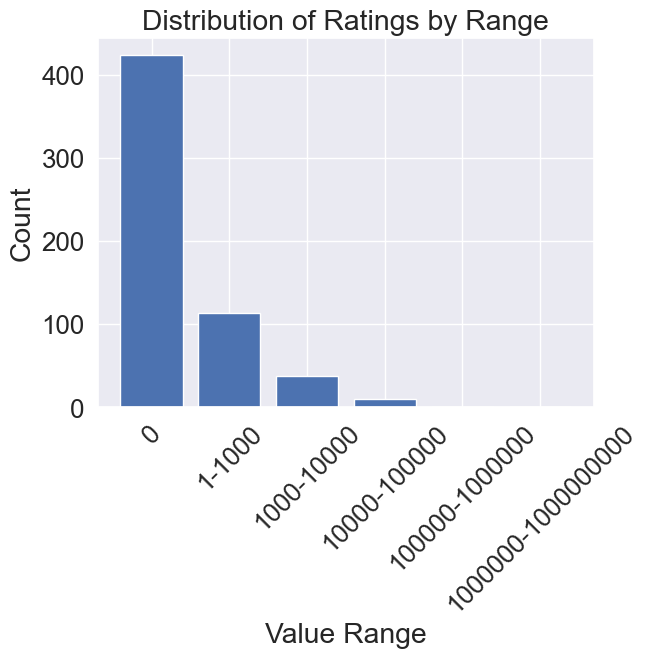

IHD_rating_range0_1:
                                                 id  \
0                               com.app.theusdoctor   
1                     com.samantharoobol.kettlebell   
2        com.fitmetrix.thegreateesthitboxingfitness   
3                   com.andromo.dev663676.app683641   
4               com.medpresso.Lonestar.clinanesfull   
..                                              ...   
580                      com.scymed.android.ekgcard   
583                 com.wFruitsandBenefits_12949805   
584  com.crownfitness.homeworkout.weightlossworkout   
586                 com.imperialhealthtech.lifeline   
587                    androidapps.angel.meditation   

                              title   released  size android_2020  \
0                     The US Doctor 2021-04-09   57M          NaN   
1    The Kettlebell Challenge - Fat 2018-11-17  5.1M   4.4 and up   
2                       RESULTS PGH 2019-01-18   37M          NaN   
3    Health Benefits of Fruits : He 2017-1

id  \
21                                  org.who.APPMYOGA   
38                              sleep.app.relax.calm   
65                     com.kompanion.fasting.android   
84      androiddeveloperjoe.pickacolornightlightfree   
123                                        com.fcalc   
165                              net.klier.blutdruck   
179     stretchingworkouts.homeexercises.flexibility   
186                            com.romwodllc.android   
190                                 com.elitehrv.app   
191            foodanddrink.inc.acupressurepointtips   
193                            com.getqardio.android   
198            com.hivebrain.andrewjohnson.relaxlite   
206                            com.symptomate.mobile   
233                          com.rockmyrun.rockmyrun   
238                       com.labnasounds.kardiafree   
257                              com.technogym.tgapp   
269                       com.gatoapps.femalefitness   
280             com.viatek.fitnation.echelon_android   
309                                      com.gymclan   
323                            com.drink.water.alarm   
329                            dance.plusply.workout   
371                     com.ecare.weightcaloriewatch   
377                       com.excelatlife.motivation   
418                           ai.mxlabs.heartmonitor   
441              de.start2dream.meditation_des_tages   
444                      com.jeenapps.danceworkout26   
448                                  com.airofit_app   
466                            com.breathwrk.android   
487                                     com.hiittime   
490                            com.quantum.padometer   
491                                       com.tabata   
494  com.foureacorporation.evolved_user.ballmovement   
498                 com.devsoldiers.bodytracker.size   
502                              net.klier.blutdruck   
514                            com.getqardio.android   
517                            com.symptomate.mobile   
518                 com.chelin.mediterraneandietplan   
548                                   ai.rimads.avey   

                              title   released  size        android_2020  \
21                    WHO mYoga App 2021-06-17   NaN                 NaN   
38        Sleep & Meditation : Wysa 2019-10-17  8.5M          4.1 and up   
65   Kompanion: Fasting Tracker App 2022-04-12   NaN                 NaN   
84                      Night Light 2013-12-17  7.5M                 NaN   
123                  CardioExpert I 2014-02-08  1.7M          4.4 and up   
165                 BloodPressureDB 2011-03-30   NaN  Varies with device   
179  Flexibility Exercises -Stretch 2020-07-10   36M          5.0 and up   
186   pliability: mobility+recovery 2020-10-15   53M                 NaN   
190   Elite HRV: Wellness & Fitness 2014-05-11   51M          5.0 and up   
191  Acupressure - Self Healing TCM 2014-11-22   44M          4.1 and up   
193             Qardio Heart Health 2014-09-02   48M          4.4 and up   
198  Relax with Andrew Johnson Lite 2011-04-13   52M          4.1 and up   
206    Symptomate – Symptom checker 2013-10-28   NaN          4.4 and up   
233  RockMyRun - Music for Workouts 2013-11-15   40M        4.0.3 and up   
238  Kardia - Deep Breathing Relaxa 2015-04-04   NaN  Varies with device   
257      Technogym - Training Coach 2015-04-29   77M                 NaN   
269                  Female Fitness 2016-08-01  2.9M        4.0.3 and up   
280                     Echelon Fit 2018-01-01   75M          6.0 and up   
309   Fitpaa - Your fitness planner 2018-07-14   29M          5.0 and up   
323                   Water Tracker 2019-02-28   14M          4.1 and up   
329  Dance Workout Videos : Reduce  2020-08-21  3.6M                 NaN   
371            Weight Calorie Watch 2014-03-28   15M                 NaN   
377   Mindful Attitude & Meditation 2010-09-28  7.3M                 NaN   
418  Heart Monitor: Blood Pressure  2021-

In [ ]:
## Number of ratings

print("For IHD: ")
#import numpy as np

# Get the minimum and maximum values, ignoring NaN values
min_value = np.nanmin(ihd_df['ratings'])
max_value = np.nanmax(ihd_df['ratings'])

# Print the range of values
print(f"Range of values: {min_value} - {max_value}")

# Calculate the average of the numeric values, ignoring NaN values
average_value = np.nanmean(ihd_df['ratings'])
# Find the mode
mode_value = np.nanmean(ihd_df['ratings'])

# Print the average value
print(f"Average value: {average_value}")
# Print the mode
print("Mode:", mode_value)

#-----------------------------

#The above plot gave the number of ratings across the apps. Now we want to see their distribution

ranges = [0, 1, 1000, 10000, 100000, 1000000, 1000000000]

# Compute the histogram
hist, bin_edges = np.histogram(ihd_df['ratings'], bins=ranges)

# Print the histogram counts for each range
for i in range(len(hist)):
    print(f"Range {bin_edges[i]} - {bin_edges[i+1]}: {hist[i]}")

# Plot the histogram as a bar plot
# plt.bar(range(len(hist)), hist, tick_label=[f"{bin_edges[i]} - {bin_edges[i+1]}" for i in range(len(hist))])
tick_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" if i > 0 else '0' for i in range(len(hist))]
plt.bar(range(len(hist)), hist, tick_label=tick_labels)



plt.xlabel('Value Range')
plt.ylabel('Count')
plt.title('Distribution of Ratings by Range')
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()
# Adjust plot layout for better visualization
plt.tight_layout()
# Save the Plot
plt.savefig('Distribution of Number of ratings per app in IHD.pdf')
# Saving figures somehow did not work for this block. I saved the images from below manually and put them in the same folder

# ======================Results==================

# For IHD: 
# Range of values: 0.0 - 1676185.0
# Average value: 1775.0535405872192
# Mode: 1775.0535405872192
# Range 0 - 1: 4948
# Range 1 - 1000: 1075
# Range 1000 - 10000: 233
# Range 10000 - 100000: 93
# Range 100000 - 1000000: 18
# Range 1000000 - 1000000000: 2

# Most apps have no rating. May be they are not as used. 

#----------------Now we make multiple dataframes and put these apps in their ranges
# Apps with 0 ratings, may be dont have as many intalls, and we dont need to check them

# ------------------------------ for df2---------------------------
# print("For df2: ")
# #import numpy as np
# #import pandas as pd
# # df = selected_IHD_apps_bigrams

# Create separate dataframes for each rating range
IHD_rating_range0_1 = ihd_df[ihd_df['ratings'].between(0, 1)]
IHD_rating_range1_1000 = ihd_df[ihd_df['ratings'].between(1, 1000)]
IHD_rating_range1000_10000 = ihd_df[ihd_df['ratings'].between(1000, 10000)]
IHD_rating_range10000_100000 = ihd_df[ihd_df['ratings'].between(10000, 100000)]
IHD_rating_range100000_1000000 = ihd_df[ihd_df['ratings'].between(100000, 1000000)]
IHD_rating_range1000000_1000000000 = ihd_df[ihd_df['ratings'].between(1000000, 1000000000)]

# Print the dataframes
print("IHD_rating_range0_1:")
print(IHD_rating_range0_1)
print()

print("IHD_rating_range1_1000:")
print(IHD_rating_range1_1000)
print()

print("IHD_rating_range1000_10000:")
print(IHD_rating_range1000_10000)
print()

print("IHD_rating_range10000_100000:")
print(IHD_rating_range10000_100000)
print()

print("IHD_rating_range100000_1000000:")
print(IHD_rating_range100000_1000000)
print()

print("IHD_rating_range1000000_1000000000:")
print(IHD_rating_range1000000_1000000000)
print()

# =================Results=============

IHD_rating_range1000_10000

In [ ]:
IHD_rating_range1000000_1000000000

id                          title   released size  \
362  com.nike.plusgps  Nike Run Club - Running Coach 2012-06-21  NaN   

           android_2020        android_2021 android_2022  price     score  \
362  Varies with device  Varies with device         VARY    0.0  4.046424   

       ratings  reviews  iap          category language  installs_2022  \
362  1052133.0  15705.0    0  Health & Fitness  English       42464538   

     installs_2021  installs_2022.1  description_length  size_mb  \
362     38228218.0         42464538                3892      NaN   

     released_year  
362         2012.0

For df2: 
Calculated Value for Subset 1: 0.0
Calculated Value for Subset 2: 4.284378532743363
Calculated Value for Subset 3: 4.144545707894737
Calculated Value for Subset 4: 4.206238690000001
Calculated Value for Subset 5: nan
Calculated Value for Subset 6: 4.0464244


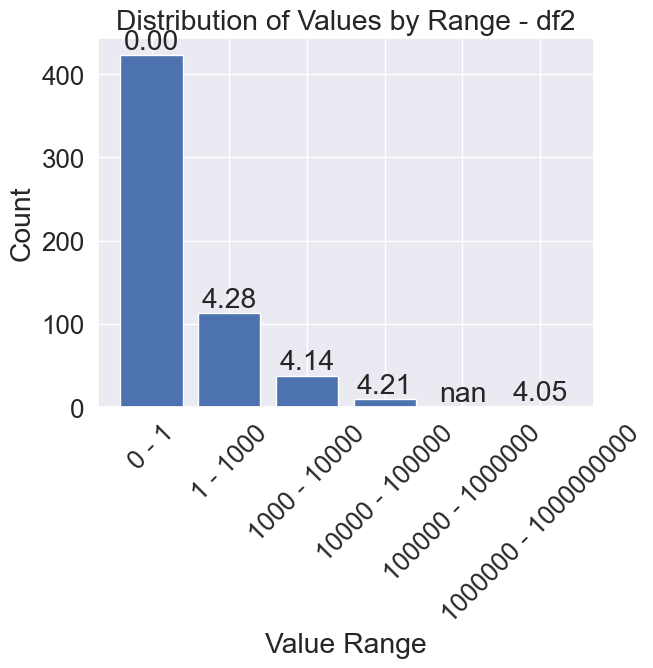

In [ ]:
print("For df2: ")
# ------------------------------ for df2---------------------------
# df = final_screened_IHD

ranges = [0, 1, 1000, 10000, 100000, 1000000, 1000000000]

# Create empty list to store the subset data frames
subset_dfs = []

# Iterate over the ranges
for i in range(len(ranges)-1):
    # Filter the original data frame based on the range
    lower_bound = ranges[i]
    upper_bound = ranges[i+1]
    subset_df = ihd_df[(ihd_df['ratings'] >= lower_bound) & (ihd_df['ratings'] < upper_bound)]
    
    # Append the subset data frame to the list
    subset_dfs.append(subset_df)

# I can use this if I want to save these subsets as separate dataframes later to observe in detail
# # Print the subset data frames
# for i, subset_df in enumerate(subset_dfs):
#     print(f"Subset Data Frame {i+1}:")
#     print(subset_df)
#     print()

# Create empty list to store the calculated values
calculated_values = []

# Iterate over the subset data frames
for subset_df in subset_dfs:
    # Perform calculations on the specified column
    calculated_value = subset_df['score'].mean()  # Replace 'another_column' with the actual column name
    
    # Append the calculated value to the list
    calculated_values.append(calculated_value)

# Print the calculated values
for i, calculated_value in enumerate(calculated_values):
    print(f"Calculated Value for Subset {i+1}: {calculated_value}")

# Plot the histogram as a bar plot
plt.bar(range(len(hist)), hist, tick_label=[f"{bin_edges[i]} - {bin_edges[i+1]}" for i in range(len(hist))])
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.title('Distribution of Values by Range - df2')
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
# Add the calculated values on top of each bar
for i, value in enumerate(calculated_values):
    plt.text(i, hist[i], f"{value:.2f}", ha='center', va='bottom')

# Show the plot
plt.show()

# Adjust plot layout for better visualization
plt.tight_layout()
plt.savefig('Avg rating score for each bar in the distribution of Number of ratings per app in df2.png')
# Saving figures somehow did not work for this block. I saved the images from below manually and put them in the same folder




For IHD: 
Range of values: 0.0 - 5.0
Average value: 1.1756176451282052
Mode: 1.1756176451282052


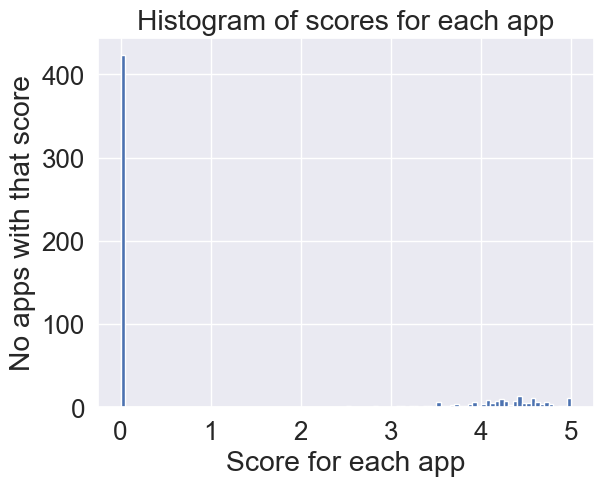

423
Range 0 - 1: 423
Range 1 - 2: 0
Range 2 - 3: 2
Range 3 - 4: 38
Range 4 - 5: 122


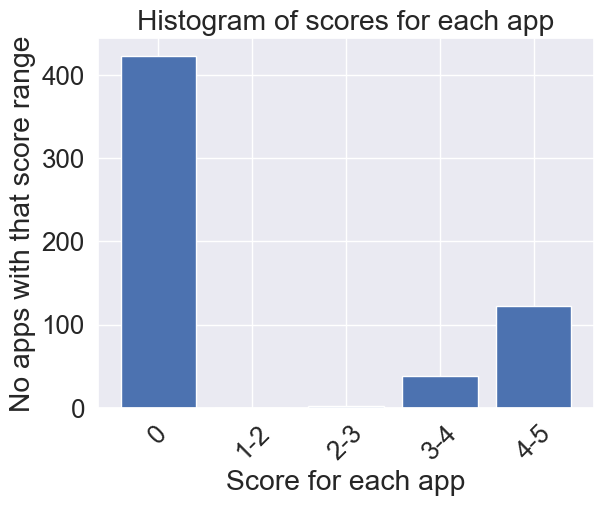

In [ ]:

print("For IHD: ")
#import numpy as np

# df = final_screened_IHD

# Get the minimum and maximum values, ignoring NaN values
min_value = np.nanmin(ihd_df['score'])
max_value = np.nanmax(ihd_df['score'])

# Print the range of values
print(f"Range of values: {min_value} - {max_value}")

# Calculate the average of the numeric values, ignoring NaN values
average_value = np.nanmean(ihd_df['score'])
# Find the mode
mode_value = np.nanmean(ihd_df['score'])

# Print the average value
print(f"Average value: {average_value}")
# Print the mode
print("Mode:", mode_value)

# Plot the histogram
plt.hist(ihd_df['score'], bins=100)  # Adjust the number of bins as needed
plt.ticklabel_format(style='plain')

# Add labels and title
plt.xlabel('Score for each app')
plt.ylabel('No apps with that score')
plt.title('Histogram of scores for each app')

# Show the plot
plt.show()

# For df2: 
# Range of values: 0.0 - 5.0
# Average value: 0.9591326138736265
# Mode: 0.9591326138736265

#-----------------------------

#The above plot gave the number of ratings across the apps. Now we want to see their distribution

zero_count = len(ihd_df[ihd_df['score'] == 0])
print(zero_count)

ranges = [0, 1, 2, 3, 4, 5]

# Compute the histogram
hist, bin_edges = np.histogram(ihd_df['score'], bins=ranges)

# Print the histogram counts for each range
for i in range(len(hist)):
    print(f"Range {bin_edges[i]} - {bin_edges[i+1]}: {hist[i]}")

# Plot the histogram as a bar plot
tick_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" if i > 0 else '0' for i in range(len(hist))]
plt.bar(range(len(hist)), hist, tick_label=tick_labels)
# Add labels and title
plt.xlabel('Score for each app')
plt.ylabel('No apps with that score range')
plt.title('Histogram of scores for each app')
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()
# Adjust plot layout for better visualization
plt.tight_layout()

# =============Results==================
# For IHD: 
# Range of values: 0.0 - 5.0
# Average value: 0.9343556950541686
# Mode: 0.9343556950541686
# 4948 apps have 0 as the score for rating
# these are probably the same ones with out any ratings. We will compare these apps for  their number of installs # Futher analysis

# Range 0.0 - 0.01: 4948
# Range 0.01 - 1.0: 0
# Range 1.0 - 2.0: 7
# Range 2.0 - 3.0: 55
# Range 3.0 - 4.0: 383
# Range 4.0 - 5.0: 976 - There are alot of apps with a good rating score

In [ ]:
# Create separate dataframes for each rating range
IHD_score_range0_1 = ihd_df[ihd_df['score'].between(0, 1)]
IHD_score_range1_2 = ihd_df[ihd_df['score'].between(1, 2)]
IHD_score_range2_3 = ihd_df[ihd_df['score'].between(2,3)]
IHD_score_range3_4 = ihd_df[ihd_df['score'].between(3,4)]
IHD_score_range4_5 = ihd_df[ihd_df['score'].between(4,5)]
IHD_score_range4_5

id  \
12                   sprint.running.techniques   
27   com.Pedometer.Walking.Running.Stepcounter   
31                com.smtech.apps.a7minworkout   
34        com.mukeshmeena.nursingquizpediatric   
38                        sleep.app.relax.calm   
..                                         ...   
549          com.techzit.acupressurebodypoints   
562                   com.panacea.ecgbasicspro   
581                 com.chethan.healthy_weight   
582       com.inc.guidetocoronaryarterydisease   
585            net.easycreation.drink_reminder   

                              title   released  size  android_2020  \
12             400M Sprint Training 2018-08-20  3.1M  4.0.3 and up   
27         Pedometer - Step Counter 2020-07-10  4.5M           NaN   
31       7 Minute Gym Workout Hindi 2020-01-30  3.7M  4.0.3 and up   
34                Pediatric Nursing 2018-07-13  7.0M  4.0.3 and up   
38        Sleep & Meditation : Wysa 2019-10-17  8.5M    4.1 and up   
..                              ...        ...   ...           ...   
549         Acupressure Body Points 2019-03-18  8.8M           NaN   
562               ECG Basics - Full 2017-08-31   27M    4.4 and up   
581  Healthy Weight - Lockdown of b 2020-11-13  8.2M           NaN   
582   Guide Coronary Artery Disease 2015-03-31  8.6M           NaN   
585            Water Drink Reminder 2017-10-15  5.5M           NaN   

     android_2021 android_2022  price     score  ratings  reviews  iap  \
12   4.0.3 and up        4.0.3    0.0  4.555555     23.0      5.0    0   
27     4.1 and up          4.2    0.0  4.434782    696.0     15.0    0   
31   4.0.3 and up        4.0.3    0.0  4.714286      7.0      2.0    0   
34   4.0.3 and up        4.0.3    0.0  4.550000     58.0     21.0    0   
38     4.1 and up          5.0    0.0  4.400000   3202.0    248.0    1   
..            ...          ...    ...       ...      ...      ...  ...   
549    5.0 and up          5.0    0.0  4.396226    125.0     11.0    0   
562    4.4 and up          4.4  150.0  5.000000     23.0      3.0    0   
581    4.1 and up          4.1    0.0  5.000000     15.0     11.0    0   
582    5.0 and up          5.0    0.0  4.600000     11.0      2.0    0   
585    4.1 and up          5.0    0.0  4.480000  12466.0     53.0    1   

             category language  installs_2022  installs_2021  installs_2022.1  \
12   Health & Fitness  English           8937         6046.0             8937   
27   Health & Fitness  English          40636        32425.0            40636   
31   Health & Fitness  English            954          869.0              954   
34            Medical  English          28842        21415.0            28842   
38   Health & Fitness  English         285170       236876.0           285170   
..                ...      ...            ...            ...              ...   
549  Health & Fitness  English          13073         5085.0            13073   
562           Medical  English           1841         1575.0             1841   
581  Health & Fitness  English             25           25.0               25   
582           Medical  English           1815         1570.0             1815   
585  Health & Fitness  English         666934       625205.0           666934   

     description_length  size_mb  released_year  
12                  902      3.1         2018.0  
27                 2900      4.5         2020.0  
31                 1918      3.7         2020.0  
34                  469      7.0         2018.0  
38                 3862      8.5         2019.0  
..                  ...      ...            ...  
549                2484      8.8         2019.0  
562                1281     27.0         2017.0  
581                1074      8.2         2020.0  
582                 792      8.6         2015.0  
585                1221      5.5         2017.0  

[122 rows x 20 columns]

For IHD: 
Percentage of rows with zero values: 93.20%
Percentage of rows with non-zero values: 6.80%
Range of values: 0.0 - 6600.0
Average value: 34.35465238095239
Mode: 34.35465238095239
Range 0 - 1: 548
Range 1 - 100: 9
Range 100 - 1000: 28
Range 1000 - 10000: 3
Range 10000 - 100000: 0


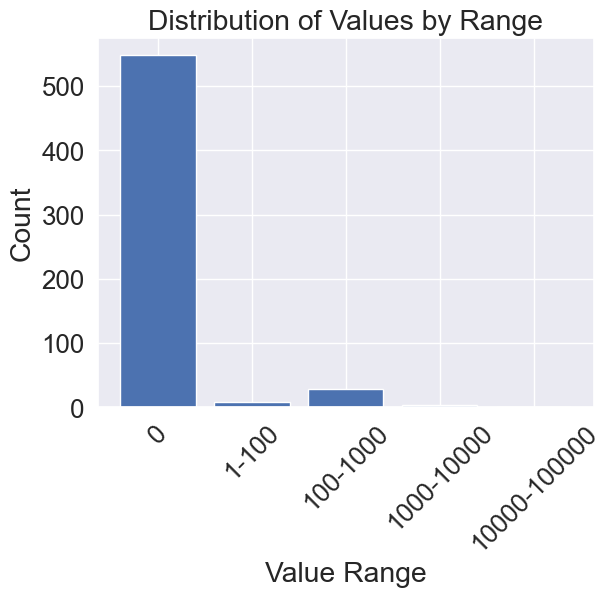

IHD_price_range0_1:
                                                 id  \
0                               com.app.theusdoctor   
1                     com.samantharoobol.kettlebell   
2        com.fitmetrix.thegreateesthitboxingfitness   
3                   com.andromo.dev663676.app683641   
4               com.medpresso.Lonestar.clinanesfull   
..                                              ...   
583                 com.wFruitsandBenefits_12949805   
584  com.crownfitness.homeworkout.weightlossworkout   
585                 net.easycreation.drink_reminder   
586                 com.imperialhealthtech.lifeline   
587                    androidapps.angel.meditation   

                              title   released  size android_2020  \
0                     The US Doctor 2021-04-09   57M          NaN   
1    The Kettlebell Challenge - Fat 2018-11-17  5.1M   4.4 and up   
2                       RESULTS PGH 2019-01-18   37M          NaN   
3    Health Benefits of Fruits : He 2017-10

In [ ]:
print("For IHD: ")
# ------------------------------ for df2---------------------------
#import numpy as np
# import math

# Calculate the percentage of rows with zero values
zero_percent = (ihd_df['price'] == 0).mean() * 100

# Calculate the percentage of rows with non-zero values
non_zero_percent = (ihd_df['price'] != 0).mean() * 100

# Print the results
print(f"Percentage of rows with zero values: {zero_percent:.2f}%")
print(f"Percentage of rows with non-zero values: {non_zero_percent:.2f}%")

# Get the minimum and maximum values, ignoring NaN values
min_value = np.nanmin(ihd_df['price'])
max_value = np.nanmax(ihd_df['price'])

# Print the range of values
print(f"Range of values: {min_value} - {max_value}")

# Calculate the average of the numeric values, ignoring NaN values
average_value = np.nanmean(ihd_df['price'])
# Find the mode
mode_value = np.nanmean(ihd_df['price'])

# Print the average value
print(f"Average value: {average_value}")
# Print the mode
print("Mode:", mode_value)

ranges = [0, 1, 100, 1000, 10000, 100000]

# Compute the histogram
hist, bin_edges = np.histogram(ihd_df['price'], bins=ranges)

# Print the histogram counts for each range
for i in range(len(hist)):
    print(f"Range {bin_edges[i]} - {bin_edges[i+1]}: {hist[i]}")


# Plot the histogram as a bar plot
tick_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" if i > 0 else '0' for i in range(len(hist))] # this and the line below keeps the first x value in plot as '0' instead of 0-1
plt.bar(range(len(hist)), hist, tick_label=tick_labels)
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.title('Distribution of Values by Range')
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()
# Adjust plot layout for better visualization
plt.tight_layout()

# ======================Results===============
# Range 0 - 1: 6012
# Range 1 - 100: 62
# Range 100 - 1000: 315
# Range 1000 - 10000: 50
# Range 10000 - 100000: 9

# Most apps are free of charge, an those who have price are in the range - 100-1000. this is a good df for # further analysis

# Create separate dataframes for each price range
IHD_price_range0_1 = ihd_df[ihd_df['price'].between(0, 1)]
IHD_price_range1_100 = ihd_df[ihd_df['price'].between(1, 100)]
IHD_price_range100_1000 = ihd_df[ihd_df['price'].between(100, 1000)]
IHD_price_range1000_10000 = ihd_df[ihd_df['price'].between(1000, 10000)]
IHD_price_range10000_100000 = ihd_df[ihd_df['price'].between(10000, 100000)]

# Print the dataframes
print("IHD_price_range0_1:")
print(IHD_price_range0_1)
print()

print("IHD_price_range1_100:")
print(IHD_price_range1_100)
print()

print("IHD_price_range100_1000:")
print(IHD_price_range100_1000)
print()

print("IHD_price_range1000_10000:")
print(IHD_price_range1000_10000)
print()

print("IHD_price_range10000_100000:")
print(IHD_price_range10000_100000)
print()


In [ ]:
ihd_df

id  \
0                               com.app.theusdoctor   
1                     com.samantharoobol.kettlebell   
2        com.fitmetrix.thegreateesthitboxingfitness   
3                   com.andromo.dev663676.app683641   
4               com.medpresso.Lonestar.clinanesfull   
..                                              ...   
583                 com.wFruitsandBenefits_12949805   
584  com.crownfitness.homeworkout.weightlossworkout   
585                 net.easycreation.drink_reminder   
586                 com.imperialhealthtech.lifeline   
587                    androidapps.angel.meditation   

                              title   released  size android_2020  \
0                     The US Doctor 2021-04-09   57M          NaN   
1    The Kettlebell Challenge - Fat 2018-11-17  5.1M   4.4 and up   
2                       RESULTS PGH 2019-01-18   37M          NaN   
3    Health Benefits of Fruits : He 2017-10-19  6.6M   4.1 and up   
4     Clinical Anesthesia Full Text 2018-06-11   10M          NaN   
..                              ...        ...   ...          ...   
583               Fruits & Benefits 2021-01-04   23M          NaN   
584  Easy Home Workout - Body Fitne 2019-10-31  7.2M          NaN   
585            Water Drink Reminder 2017-10-15  5.5M          NaN   
586  Centafit: Health Check, Screen 2021-02-04   34M          NaN   
587  Flame Meditate: Mindful breath 2019-10-29  7.2M   5.0 and up   

    android_2021 android_2022  price  score  ratings  reviews  iap  \
0     5.0 and up          5.0    0.0   0.00      0.0      0.0    0   
1     4.4 and up          4.4    0.0   0.00      0.0      0.0    1   
2     5.0 and up          5.0    0.0   0.00      0.0      0.0    0   
3     4.1 and up          4.1    0.0   0.00      0.0      0.0    0   
4     5.0 and up          5.0    0.0   0.00      0.0      0.0    1   
..           ...          ...    ...    ...      ...      ...  ...   
583   4.4 and up          4.4    0.0   0.00      0.0      0.0    0   
584   4.4 and up          4.4    0.0   0.00      0.0      0.0    0   
585   4.1 and up          5.0    0.0   4.48  12466.0     53.0    1   
586   5.0 and up          6.0    0.0   0.00      0.0      0.0    1   
587   5.0 and up          5.0    0.0   0.00      0.0      0.0    0   

             category language  installs_2022  installs_2021  installs_2022.1  \
0             Medical  English             82            9.0               82   
1    Health & Fitness  English          21199        16318.0            21199   
2    Health & Fitness  English            237          148.0              237   
3    Health & Fitness  English          11449        10360.0            11449   
4             Medical  English          10735         8694.0            10735   
..                ...      ...            ...            ...              ...   
583  Health & Fitness  English            326           10.0              326   
584  Health & Fitness  English           1084         1079.0             1084   
585  Health & Fitness  English         666934       625205.0           666934   
586  Health & Fitness  English           1247          312.0             1247   
587  Health & Fitness  English             52           20.0               52   

     description_length  size_mb  released_year  
0                   390     57.0         2021.0  
1                  2112      5.1         2018.0  
2                   617     37.0         2019.0  
3                  1086      6.6         2017.0  
4                  1566     10.0         2018.0  
..                  ...      ...            ...  
583                2112     23.0         2021.0  
584                2049      7.2         2019.0  
585                1221      5.5         2017.0  
586                3313     34.0         2021.0  
587                2150      7.2         2019.0  

[588 rows x 20 columns]

[   0.        100.        520.         67.09       65.        900.
  430.        380.       2597.249313   85.         95.        180.
   88.44      250.        199.52      290.        210.        142.896287
 1200.        240.        800.        300.        190.       6600.
  150.        440.        625.54       55.        370.        330.
  124.8     ]


<Figure size 640x480 with 0 Axes>

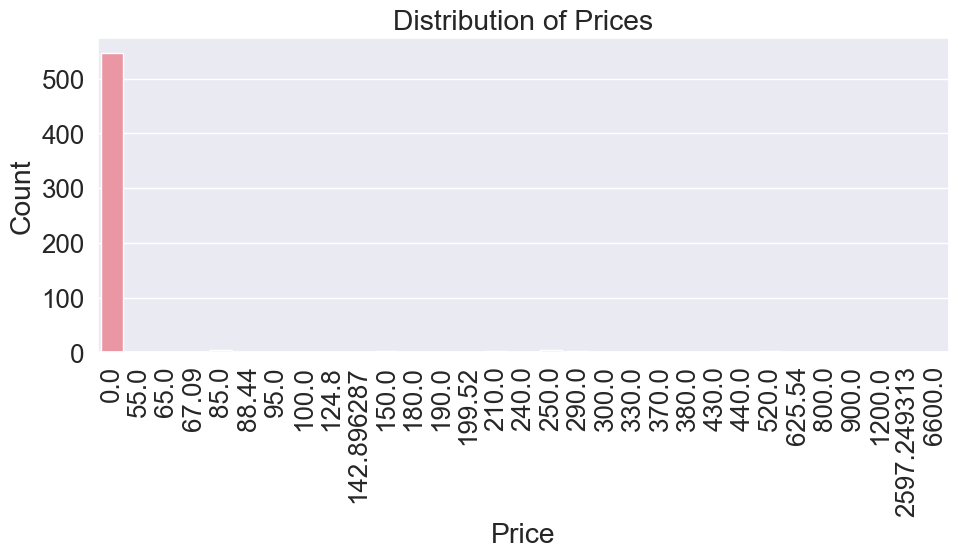

In [ ]:
# Get all unique values in the 'Column1' column
unique_values = ihd_df['price'].unique()

print(unique_values)
### All app prices are in INR
### These are the unique price values
# [  499     0   999   199    99   299   399  1999   699 24900   799  1499
#   5900  3999  2299]
#ANother price graph
import seaborn as sns

# Get the unique values and their counts in the "price" column
price_counts = ihd_df['price'].value_counts()

# Sort the unique values in ascending order
sorted_prices = price_counts.index.sort_values(ascending=True)

# Create a bar plot of prices and their counts
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_prices, y=price_counts[sorted_prices])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

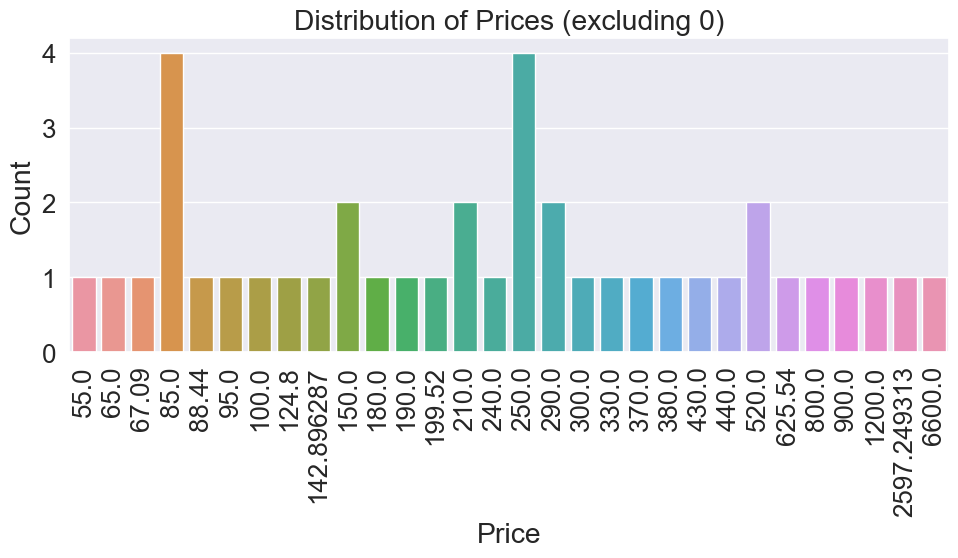

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with price equal to 0
non_zero_prices = ihd_df[ihd_df['price'] != 0]

# Get the unique non-zero values and their counts in the "price" column
price_counts = non_zero_prices['price'].value_counts()

# Sort the unique values in ascending order
sorted_prices = price_counts.index.sort_values(ascending=True)

# Create a bar plot of prices and their counts
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_prices, y=price_counts[sorted_prices])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices (excluding 0)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


For IHD: 
Percentage of rows with zero values: 73.13%
Percentage of rows with non-zero values: 26.87%
Range of values: 0.0 - 20819.0
Average value: 90.73846153846154
Mode: 90.73846153846154
Range 0 - 1: 430
Range 1 - 10: 65
Range 10 - 100: 69
Range 100 - 1000: 16
Range 1000 - 10000: 3
Range 10000 - 100000: 2


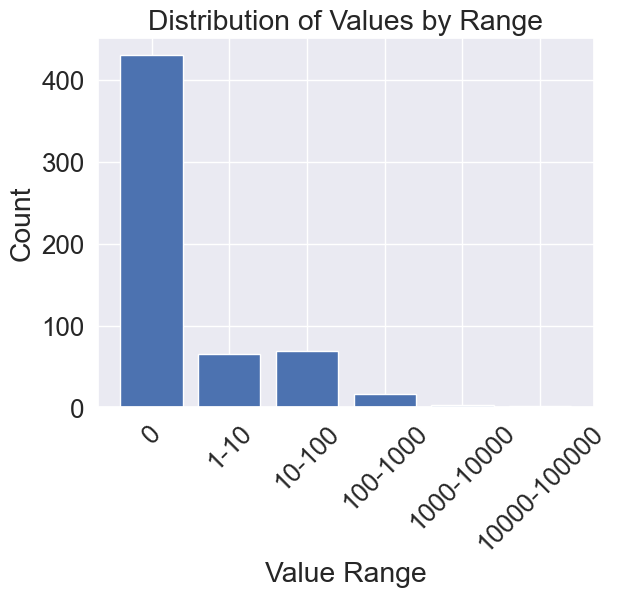

IHD_reviews_range0_1:
                                                 id  \
0                               com.app.theusdoctor   
1                     com.samantharoobol.kettlebell   
2        com.fitmetrix.thegreateesthitboxingfitness   
3                   com.andromo.dev663676.app683641   
4               com.medpresso.Lonestar.clinanesfull   
..                                              ...   
580                      com.scymed.android.ekgcard   
583                 com.wFruitsandBenefits_12949805   
584  com.crownfitness.homeworkout.weightlossworkout   
586                 com.imperialhealthtech.lifeline   
587                    androidapps.angel.meditation   

                              title   released  size android_2020  \
0                     The US Doctor 2021-04-09   57M          NaN   
1    The Kettlebell Challenge - Fat 2018-11-17  5.1M   4.4 and up   
2                       RESULTS PGH 2019-01-18   37M          NaN   
3    Health Benefits of Fruits : He 2017-

In [ ]:
# Reviews - basic analysis

print("For IHD: ")
# ------------------------------ for df2---------------------------
#import numpy as np
# import math

# Calculate the percentage of rows with zero values
zero_percent = (ihd_df['reviews'] == 0).mean() * 100

# Calculate the percentage of rows with non-zero values
non_zero_percent = (ihd_df['reviews'] != 0).mean() * 100

# Print the results
print(f"Percentage of rows with zero values: {zero_percent:.2f}%")
print(f"Percentage of rows with non-zero values: {non_zero_percent:.2f}%")

# Get the minimum and maximum values, ignoring NaN values
min_value = np.nanmin(ihd_df['reviews'])
max_value = np.nanmax(ihd_df['reviews'])

# Print the range of values
print(f"Range of values: {min_value} - {max_value}")

# Calculate the average of the numeric values, ignoring NaN values
average_value = np.nanmean(ihd_df['reviews'])
# Find the mode
mode_value = np.nanmean(ihd_df['reviews'])

# Print the average value
print(f"Average value: {average_value}")
# Print the mode
print("Mode:", mode_value)

ranges = [0, 1, 10, 100, 1000, 10000, 100000]

# Compute the histogram
hist, bin_edges = np.histogram(ihd_df['reviews'], bins=ranges)

# Print the histogram counts for each range
for i in range(len(hist)):
    print(f"Range {bin_edges[i]} - {bin_edges[i+1]}: {hist[i]}")

# # Find the rows in the range 10000-100000
# rows_in_range = df[(df['price'] >= 10000) & (df['price'] <= 100000)]

# # Print the rows in the range
# print(rows_in_range)

# Plot the histogram as a bar plot
tick_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" if i > 0 else '0' for i in range(len(hist))] # this and the line below keeps the first x value in plot as '0' instead of 0-1
plt.bar(range(len(hist)), hist, tick_label=tick_labels)
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.title('Distribution of Values by Range')
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()
# Adjust plot layout for better visualization
plt.tight_layout()

#============================================
# For IHD: 
# Percentage of rows with zero values: 77.36%
# Percentage of rows with non-zero values: 22.64%
# Range of values: 0.0 - 493098.0
# Average value: 186.19139582352017
# Mode: 186.19139582352017
# Range 0 - 1: 4988
# Range 1 - 10: 671
# Range 10 - 100: 508
# Range 100 - 1000: 156
# Range 1000 - 10000: 36
# Range 10000 - 100000: 7

# Create separate dataframes for each reviews range
IHD_reviews_range0_1 = ihd_df[ihd_df['reviews'].between(0, 1)]
IHD_reviews_range1_10 = ihd_df[ihd_df['reviews'].between(1, 10)]
IHD_reviews_range10_100 = ihd_df[ihd_df['reviews'].between(10, 100)]
IHD_reviews_range100_1000 = ihd_df[ihd_df['reviews'].between(100, 1000)]
IHD_reviews_range1000_10000 = ihd_df[ihd_df['reviews'].between(1000, 10000)]
IHD_reviews_range10000_100000 = ihd_df[ihd_df['reviews'].between(10000, 100000)]

# Print the dataframes
print("IHD_reviews_range0_1:")
print(IHD_reviews_range0_1)
print()

print("IHD_reviews_range1_10:")
print(IHD_reviews_range1_10)
print()

print("IHD_reviews_range10_100:")
print(IHD_reviews_range10_100)
print()

print("IHD_reviews_range100_1000:")
print(IHD_reviews_range100_1000)
print()

print("IHD_reviews_range1000_10000:")
print(IHD_reviews_range1000_10000)
print()

print("IHD_reviews_range10000_100000:")
print(IHD_reviews_range10000_100000)
print()


In [ ]:
IHD_reviews_range10000_100000

id                           title   released size  \
96   com.lybrate.phoenix  Lybrate: Consult Doctor Online 2014-08-19  16M   
362     com.nike.plusgps   Nike Run Club - Running Coach 2012-06-21  NaN   

           android_2020        android_2021 android_2022  price     score  \
96           4.4 and up          4.4 and up          5.0    0.0  4.180313   
362  Varies with device  Varies with device         VARY    0.0  4.046424   

       ratings  reviews  iap          category language  installs_2022  \
96     66687.0  20819.0    0           Medical  English        5888553   
362  1052133.0  15705.0    0  Health & Fitness  English       42464538   

     installs_2021  installs_2022.1  description_length  size_mb  \
96       5736053.0          5888553                3990     16.0   
362     38228218.0         42464538                3892      NaN   

     released_year  
96          2014.0  
362         2012.0

3
Range 0.0 - 1.0: 3
Range 1.0 - 10.0: 12
Range 10.0 - 100.0: 78
Range 100.0 - 1000.0: 142
Range 1000.0 - 10000.0: 174
Range 10000.0 - 100000.0: 117
Range 100000.0 - 1000000.0: 52
Range 1000000.0 - 10000000.0: 9
Range 10000000.0 - 100000000.0: 1
Range 100000000.0 - 500000000.0: 0


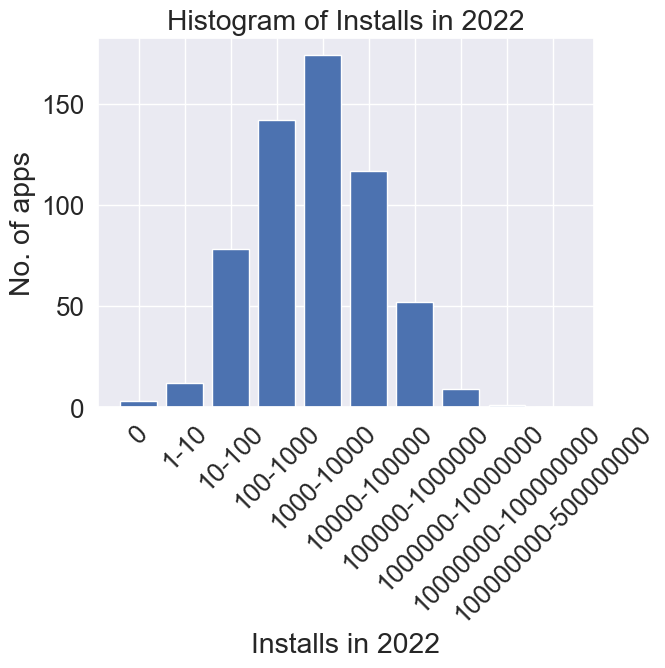

In [ ]:
# The above plot gave the number of ratings across the apps. Now we want to see their distribution
zero_count = len(ihd_df[ihd_df['installs_2022'] == 0])
print(zero_count)

ranges = [0, 1.0, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 500000000]

# Compute the histogram
hist, bin_edges = np.histogram(ihd_df['installs_2022'], bins=ranges)

# Print the histogram counts for each range
for i in range(len(hist)):
    print(f"Range {bin_edges[i]} - {bin_edges[i+1]}: {hist[i]}")

# Plot the histogram as a bar plot
tick_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" if i > 0 else '0' for i in range(len(hist))] # this and the line below keeps the first x value in plot as '0' instead of 0-1
plt.bar(range(len(hist)), hist, tick_label=tick_labels)
# Add labels and title
plt.xlabel('Installs in 2022')
plt.ylabel('No. of apps')
plt.title('Histogram of Installs in 2022')
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()
# Adjust plot layout for better visualization
plt.tight_layout()

Count of apps with in-app purchases:
 0    463
1    125
Name: iap, dtype: int64

Percentage of apps with and without in-app purchases:
 0    78.741497
1    21.258503
Name: iap, dtype: float64


<Figure size 640x480 with 0 Axes>

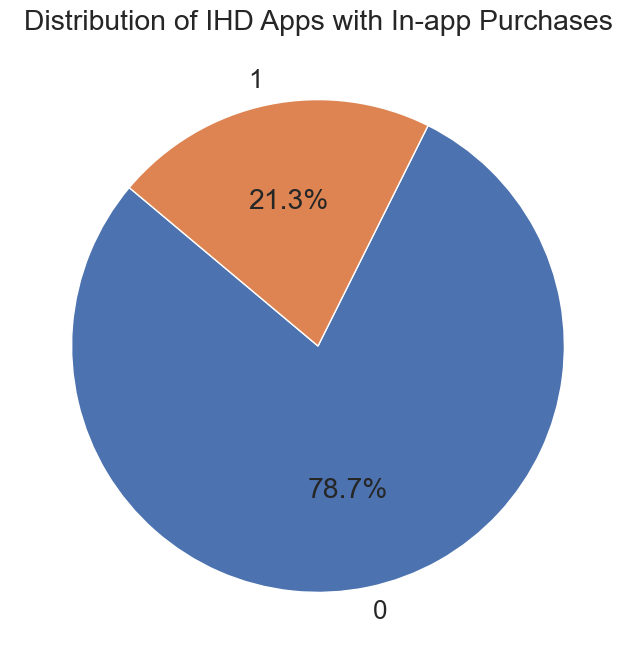

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the necessary dataframe 'ihd_df' loaded

# Get the count of each value in the 'iap' column
iap_counts = ihd_df['iap'].value_counts()
total_apps = len(ihd_df)
iap_percentages = iap_counts / total_apps * 100

# Print the counts and percentages
print("Count of apps with in-app purchases:\n", iap_counts)
print("\nPercentage of apps with and without in-app purchases:\n", iap_percentages)

# Plot a pie chart for in-app purchases
plt.figure(figsize=(8, 8))
plt.pie(iap_counts, labels=iap_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of IHD Apps with In-app Purchases")
plt.savefig('How many IHD apps have In-app purchases.png')
plt.show()  # Corrected this line to call the show() function

# =============Results===============================

# Count of apps with in-app purchases:
# False    90.555211
# True      9.444789


In [ ]:
#specify the dataframe each time and copy paste the code below
#Use main_dataframe_filtered_df1 or selected_IHD_apps_bigrams to select the dataframe with more than 1 or more than 2 disease words respectively

inapps = pd.value_counts(ihd_df.iap).reset_index()
inapps.columns = ['Does it have In app purchases', 'frequency']
inapps

plt.figure(figsize=(8,8))
plt.pie(inapps.frequency, labels=inapps['Does it have In app purchases'])
plt.title("How many IHD apps have In-app purchases")
plt.savefig('How many IHD apps have In-app purchases.png')
plt.show
# Get the count of each value in the 'iap' column
iap_counts = ihd_df['iap'].value_counts()
total_apps = len(ihd_df)
iap_percentages = iap_counts/total_apps*100

# Print the counts and percentages
print("Count of apps with in-app purchases:\n", iap_counts)
print("\nPercentage of apps with and without in-app purchases:\n", iap_percentages)

# Print the counts
print(iap_counts)

# =============Results===============================

# Percentage of apps with and without in-app purchases:
#  False    90.555211
# True      9.444789

# About 10 percent of the IHD apps have In-app purchases

# -----------------Making a new dataframe for further analysis---------

# Filter dataframe for apps with in-app purchases
IHD_inapp = ihd_df[ihd_df['iap'] == True]

# Print the in-app purchases dataframe
IHD_inapp

# Save the in-app purchases dataframe to a new CSV file
# IHD_inapp.to_csv('inapp_purchases_apps.csv', index=False)

# 609 Apps have in-app purchases - #Further analysis

Count of apps with in-app purchases:
 0    463
1    125
Name: iap, dtype: int64

Percentage of apps with and without in-app purchases:
 0    78.741497
1    21.258503
Name: iap, dtype: float64
0    463
1    125
Name: iap, dtype: int64


id                           title  \
1            com.samantharoobol.kettlebell  The Kettlebell Challenge - Fat   
4      com.medpresso.Lonestar.clinanesfull   Clinical Anesthesia Full Text   
11                           com.gamersgym                       Gamersgym   
19                    eu.fitric.kettlebell  Kettlebell Workouts: Exercises   
38                    sleep.app.relax.calm       Sleep & Meditation : Wysa   
..                                     ...                             ...   
547  com.danproductions.medical.cardiocalc      Framingham Score Heart Age   
555              com.AnorexiaHelp.Calendar  Anorexia Nervosa Help Calendar   
565            uk.co.classprofessional.cfr                        CFR PLUS   
585        net.easycreation.drink_reminder            Water Drink Reminder   
586        com.imperialhealthtech.lifeline  Centafit: Health Check, Screen   

      released  size android_2020        android_2021 android_2022  price  \
1   2018-11-17  5.1M   4.4 and up          4.4 and up          4.4    0.0   
4   2018-06-11   10M          NaN          5.0 and up          5.0    0.0   
11  2021-06-06   NaN          NaN                 NaN          5.0    0.0   
19  2021-01-10   48M          NaN          7.0 and up          7.0    0.0   
38  2019-10-17  8.5M   4.1 and up          4.1 and up          5.0    0.0   
..         ...   ...          ...                 ...          ...    ...   
547 2020-12-17   NaN          NaN  Varies with device         VARY    0.0   
555 2020-06-06   34M          NaN          4.4 and up          4.4    0.0   
565 2020-06-22   72M   5.0 and up          5.0 and up          5.0    0.0   
585 2017-10-15  5.5M          NaN          4.1 and up          5.0    0.0   
586 2021-02-04   34M          NaN          5.0 and up          6.0    0.0   

     score  ratings  reviews  iap          category language  installs_2022  \
1     0.00      0.0      0.0    1  Health & Fitness  English          21199   
4     0.00      0.0      0.0    1           Medical  English          10735   
11    0.00      0.0      0.0    1  Health & Fitness  English            538   
19    0.00      0.0      0.0    1  Health & Fitness  English           4430   
38    4.40   3202.0    248.0    1  Health & Fitness  English         285170   
..     ...      ...      ...  ...               ...      ...            ...   
547   0.00      0.0      0.0    1           Medical  English           3581   
555   0.00      0.0      0.0    1  Health & Fitness  English           4525   
565   0.00      0.0      0.0    1           Medical  English           3280   
585   4.48  12466.0     53.0    1  Health & Fitness  English         666934   
586   0.00      0.0      0.0    1  Health & Fitness  English           1247   

     installs_2021  installs_2022.1  description_length  size_mb  \
1          16318.0            21199                2112      5.1   
4           8694.0            10735                1566     10.0   
11             NaN              538                1483      NaN   
19           639.0             4430                1722     48.0   
38        236876.0           285170                3862      8.5   
..             ...              ...                 ...      ...   
547          125.0             3581                 814      NaN   
555         1455.0             4525                3872     34.0   
565         1065.0             3280                1177     72.0   
585       625205.0           666934                1221      5.5   
586          312.0             1247                3313     34.0   

     released_year  
1           2018.0  
4           2018.0  
11          2021.0  
19          2021.0  
38          2019.0  
..             ...  
547         2020.0  
555         2020.0  
565         2020.0  
585         2017.0  
586         2021.0  

[125 rows x 20 columns]

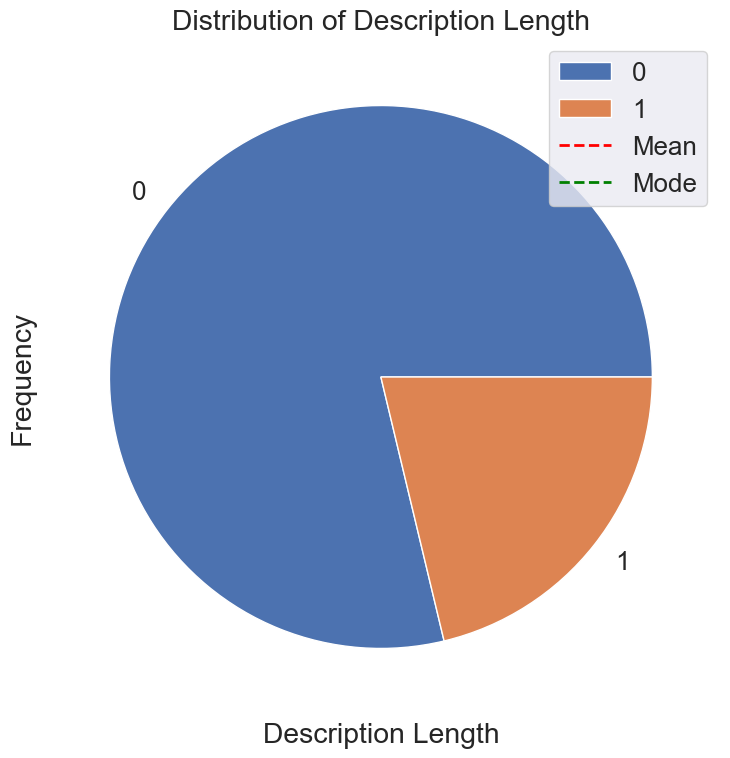

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
from scipy.stats import mode

# Calculate the average description length
avg_description_length = np.nanmean(ihd_df['description_length'])

# Calculate the mode
bin_counts = np.bincount(ihd_df['description_length'].dropna())
mode_description_length = np.argmax(bin_counts)

# Plot a histogram
plt.hist(ihd_df['description_length'].dropna(), bins=10)
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.title('Distribution of Description Length')

# Plot vertical lines for mode and mean
plt.axvline(avg_description_length, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mode_description_length, color='green', linestyle='dashed', linewidth=2, label='Mode')

plt.legend()
plt.tight_layout()
plt.show()


## App releases over the years

/var/folders/fr/pz21ssdx68z5bny5pmqvs1780000gn/T/ipykernel_42589/3558461363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['released_year'] = pd.to_datetime(filtered_df['released'], errors='coerce').dt.year


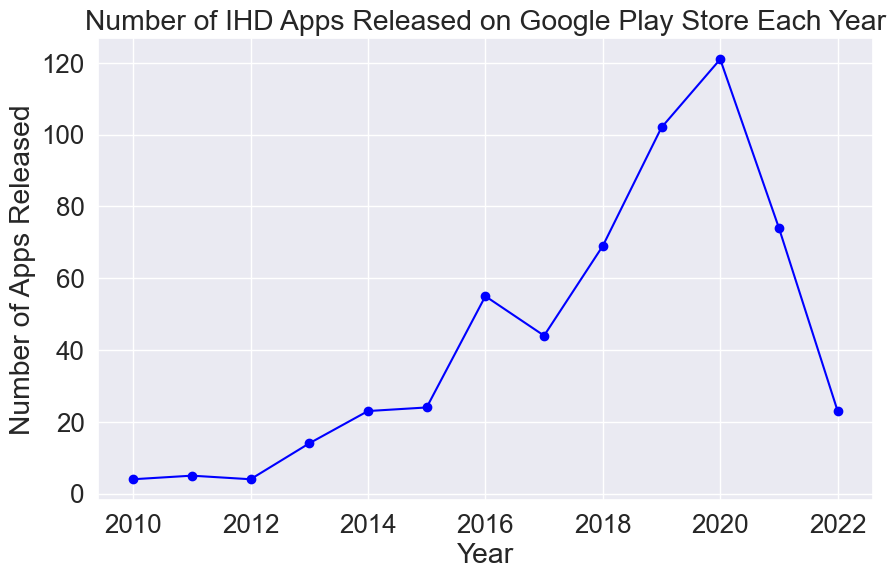

In [ ]:
# Number of [IHD] Apps Released on Google Play Store Each Year

# import matplotlib.pyplot as plt
# import pandas as pd

# Filter out rows with missing or invalid values in the 'released' column
filtered_df = ihd_df.dropna(subset=['released'])
filtered_df['released_year'] = pd.to_datetime(filtered_df['released'], errors='coerce').dt.year

# Group the data by year and count the number of apps released each year
apps_released_by_year = filtered_df.groupby('released_year').size()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a line plot for the number of apps released each year
ax.plot(apps_released_by_year.index, apps_released_by_year.values, marker='o', color='blue')

# Set the x-axis and y-axis labels
ax.set_xlabel("Year")
ax.set_ylabel("Number of Apps Released")

# Set the title
ax.set_title("Number of IHD Apps Released on Google Play Store Each Year")

# Enable grid lines
ax.grid(True)

# Show the plot
plt.show()


### Required android version

In [ ]:
ihd_df['android_2022'].unique()

array(['5.0', '4.4', '4.1', '4.0', '4.0.3', '6.0', '7.0', '2.3', '8.0',
       '5.1', '4.2', '2.2', '11', '4.3', '2.3.3', '2.1', '3.0', '1.1',
       'VARY', '9', '7.1', '4.4W'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


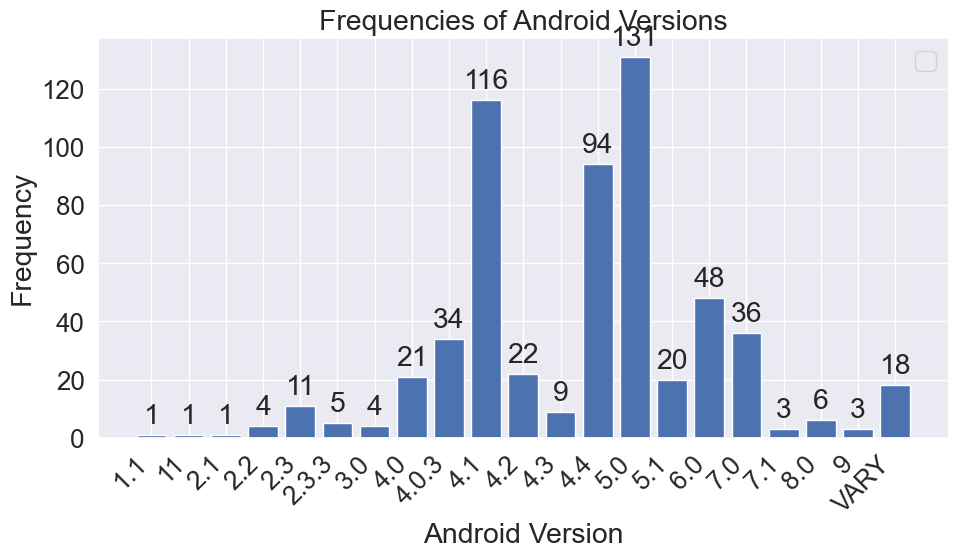

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# Replace '4.4W' with '4.4'
ihd_df['android_2022'] = ihd_df['android_2022'].replace('4.4W', '4.4')

# Calculate value frequencies
value_counts = ihd_df['android_2022'].value_counts()

# Sort the values for plotting
sorted_values = value_counts.index.sort_values(ascending=True)

# Calculate average frequency
average_frequency = value_counts.mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_values, value_counts[sorted_values])
# plt.axhline(y=average_frequency, color='r', linestyle='--', label='Average')
plt.xlabel('Android Version')
plt.ylabel('Frequency')
plt.title('Frequencies of Android Versions')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Annotate each bar with its frequency
for version, freq in value_counts.items():
    plt.text(version, freq + 2, str(freq), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### --------------------- Break Point -------------------------

## Cluster analysis 

## LDA analysis and clusrtering of selected IHD apps

In [1]:
#| echo: False
import pandas as pd
import glob, os, json
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect
from random import sample
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import requests
from wordcloud import WordCloud
import itertools
from itertools import chain
from collections import Counter
import ast

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel
import spacy

import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.gensim_models as gensimvis
import seaborn as sns

In [2]:
ihd_temp = pd.read_csv('IHD_google_apps.csv', index_col=False) #change the file name here

ihd_temp["description_monograms"] = ihd_temp['description_monograms'].apply(ast.literal_eval)

print(ihd_temp["description_monograms"].apply(type))


0      <class 'list'>
1      <class 'list'>
2      <class 'list'>
3      <class 'list'>
4      <class 'list'>
            ...      
583    <class 'list'>
584    <class 'list'>
585    <class 'list'>
586    <class 'list'>
587    <class 'list'>
Name: description_monograms, Length: 588, dtype: object


In [ ]:
# use description_monograms column to make the text for clustering as used n the selected_m_nonm_heartdisease.ipynb
# To make the Tokenised description column - each row into a string where words are separated by spaces
# text = [' '.join(ele) for ele in ihd_temp["text"].tolist()]
# text = [' '.join(ast.literal_eval(ele)) for ele in ihd_temp["description_monograms"].tolist()]
# Convert the "description_monograms" column to a list of strings
text = [' '.join(row) for row in ihd_temp['description_monograms']]
text


In [4]:
#Using the LDA method to make clusters
#n_components = 10
#max_df=0.05
#min_df=2000
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.lda_model
from gensim.models import CoherenceModel
print("Clustering based on LDA:\n")

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(lowercase=True, max_df=0.3, min_df=50, stop_words='english')
tf = tf_vectorizer.fit_transform(text)
tf_feature_names = tf_vectorizer.get_feature_names_out()

print("Running LDA:\n")
# Run LDA
lda = LatentDirichletAllocation(n_components=3, max_iter=5, learning_method='online', learning_offset=50., random_state=0).fit(tf)

print("Starting visualization:\n")
pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda, tf, tf_vectorizer)




Clustering based on LDA:

Running LDA:

Starting visualization:



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.110306  0.087004       1        1  39.508608
1      0.205954  0.004228       2        1  31.038017
2     -0.095648 -0.091233       3        1  29.453375, topic_info=         Term        Freq       Total Category  logprob  loglift
128      yoga  540.000000  540.000000  Default  30.0000  30.0000
126   workout  703.000000  703.000000  Default  29.0000  29.0000
36       diet  406.000000  406.000000  Default  28.0000  28.0000
95   pressure  383.000000  383.000000  Default  27.0000  27.0000
127  workouts  450.000000  450.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
47   exercise  130.574850  450.660979   Topic3  -3.8445  -0.0164
76       loss   73.864443  234.437067   Topic3  -4.4143   0.0674
82     muscle   57.497178  195.009879   Topic3  -4.6648   0.0010
75       lose   49.641352  126.286634   Topic3  -4.8117   0.2886
43       easy   50.157623  188.589336   Topic3  -4.8013  -0.1020

[149 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.670133        30
0         2  0.167533        30
0         3  0.167533        30
2         1  0.510725   achieve
2         2  0.056747   achieve
...     ...       ...       ...
127       2  0.002218  workouts
127       3  0.760664  workouts
128       1  0.982935      yoga
128       2  0.007404      yoga
128       3  0.009256      yoga

[306 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

### max_df=0.3, min_df=50, n_components=3 worked best for Google. More distinct clusters

In [6]:
# ----------------Making separate dataframes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.lda_model
import pandas as pd

print("Clustering based on LDA:\n")

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(lowercase=True, max_df=0.3, min_df=50, stop_words='english')
tf = tf_vectorizer.fit_transform(text)
tf_feature_names = tf_vectorizer.get_feature_names_out()

print("Running LDA:\n")
# Run LDA
lda = LatentDirichletAllocation(n_components=3, max_iter=5, learning_method='online', learning_offset=50., random_state=0).fit(tf)

# Get the cluster assignments for each document
cluster_assignments = lda.transform(tf).argmax(axis=1)

# Add cluster assignments to the DataFrame
ihd_temp['cluster'] = cluster_assignments

# Create separate DataFrames for each cluster
cluster_dataframes = []
num_clusters = lda.n_components

for cluster_label in range(num_clusters):
    cluster_df = ihd_temp[ihd_temp['cluster'] == cluster_label].copy()
    cluster_dataframes.append(cluster_df)

# Now cluster_dataframes will contain separate DataFrames for each cluster
# Print the number of documents in each cluster
for cluster_label, cluster_df in enumerate(cluster_dataframes):
    print(f"Cluster {cluster_label}: Number of documents = {len(cluster_df)}")
    # You can also save each cluster DataFrame to a separate CSV file
    cluster_df.to_csv(f'cluster_{cluster_label}.csv', index=False)



# Cluster 0: Number of documents = 166
# Cluster 1: Number of documents = 286
# Cluster 2: Number of documents = 136

Clustering based on LDA:

Running LDA:

Cluster 0: Number of documents = 166
Cluster 1: Number of documents = 286
Cluster 2: Number of documents = 136


/Users/rprizak/miniconda-m1/envs/healthapps/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/rprizak/miniconda-m1/envs/healthapps/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/rprizak/miniconda-m1/envs/healthapps/lib/python3.9/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/rprizak/miniconda-m1/envs/healthapps/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength ins

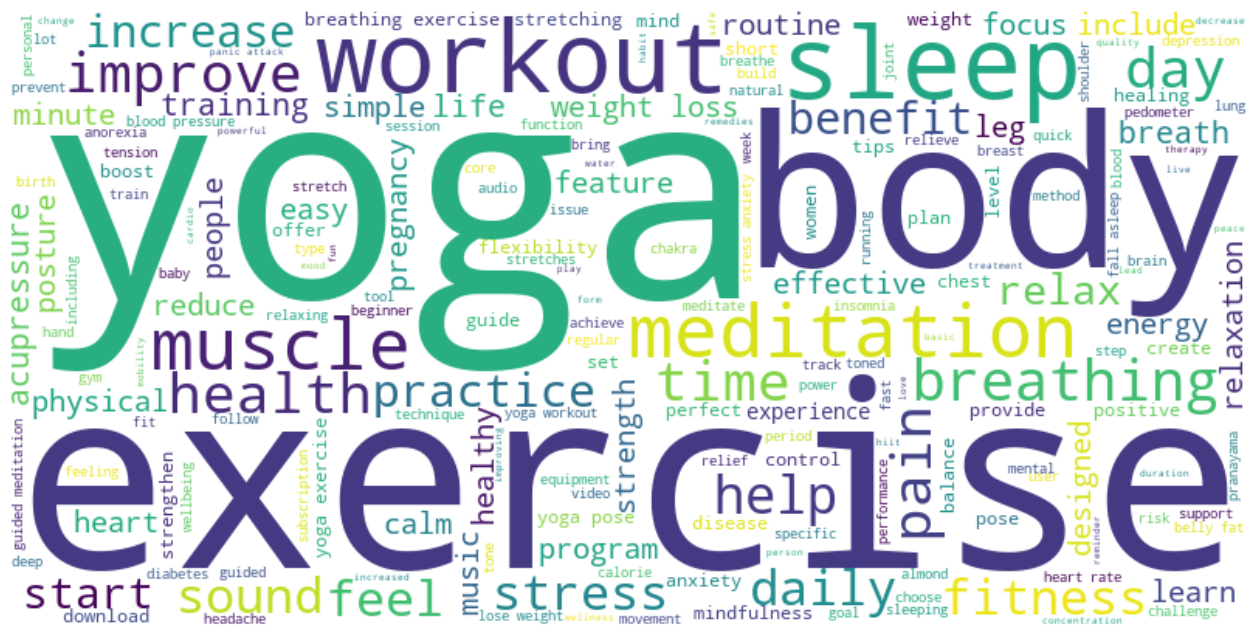

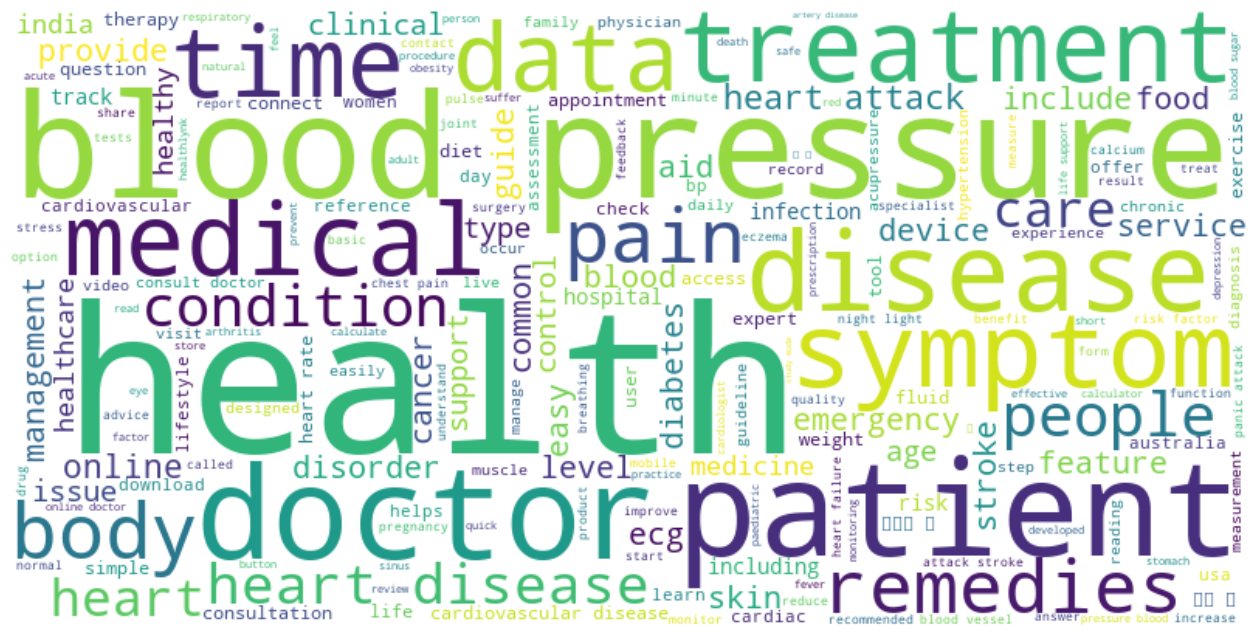

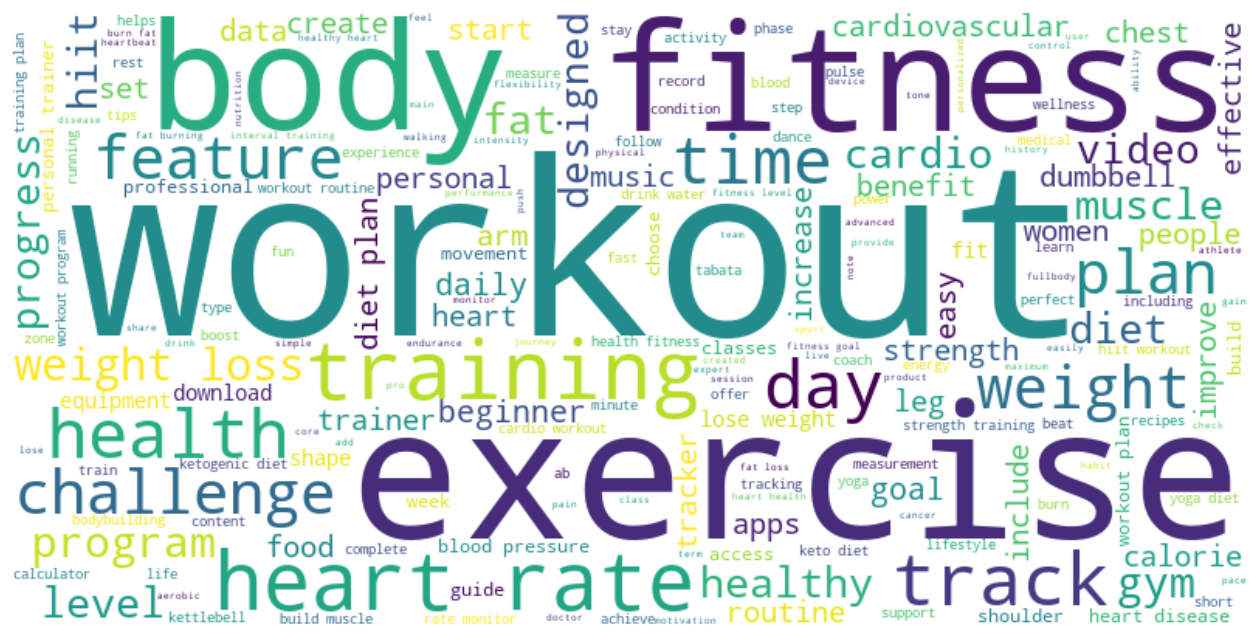

In [10]:
df1 = cluster_dataframes[0]
df2 = cluster_dataframes[1]
df3 = cluster_dataframes[2]
# df4 = cluster_dataframes[3]
# df5 = cluster_dataframes[4]

text2 = [' '.join(row) for row in df1['description_monograms']]
text3 = [' '.join(row) for row in df2['description_monograms']]
text4 = [' '.join(row) for row in df3['description_monograms']]
# text5 = [' '.join(row) for row in df4['description_monograms']]
# text6 = [' '.join(row) for row in df5['description_monograms']]
# ihd_yoga_df = cluster_dataframes[1]
# ihd_fitness_df = cluster_dataframes[2]

# text7 = [' '.join(row) for row in ihd_yoga_df['description_monograms']]
# text8 = [' '.join(row) for row in ihd_fitness_df['description_monograms']]

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the text in text2 into a single string
all_text = ' '.join(text2)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Google_cluster1.pdf')

# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# Join all the text in text2 into a single string
all_text = ' '.join(text3)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Google_cluster2.pdf')


# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# Join all the text in text2 into a single string
all_text = ' '.join(text4)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Google_cluster3.pdf')

# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Join all the text in text2 into a single string
# all_text = ' '.join(text5)

# # Create a WordCloud object
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# # Display the word cloud using matplotlib
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Join all the text in text2 into a single string
# all_text = ' '.join(text6)

# # Create a WordCloud object
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# # Display the word cloud using matplotlib
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [ ]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# import numpy as np

# Data and text for the word clouds
cluster_dataframes = [df1, df2, df3]
text_data = [[' '.join(row) for row in df['description_monograms']] for df in cluster_dataframes]

# Create subplots for the word clouds
fig, axes = plt.subplots(1, len(cluster_dataframes), figsize=(8.27, 5.83))

# Define the titles for the word clouds
wordcloud_titles = ['Sleep and Yoga', 'Clinical', 'Fitness']

# Iterate through each title and text to create word clouds
for i, (title, text) in enumerate(zip(wordcloud_titles, [text2, text3, text4])):
    all_text = ' '.join(text)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    
    ax = axes[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=12)
    ax.axis('off')

# Adjust spacing between subplots and show the plot
plt.tight_layout()
plt.show()


In [73]:
 # Join individual cluster dataframes into a single dataframe and add a column denoting cluster name

df1["Cluster"] = "Lifestyle"
df2["Cluster"] = "Clinical"
df3["Cluster"] = "Fitness"

gdf = pd.concat([df1, df2, df3], ignore_index=True)

#----------------------- organising different columns---------


# Replace 'Varies with device' with NaN values in the 'size' column
gdf['size'] = gdf['size'].replace('Varies with device', np.nan)

# Select values that are numeric and end with 'k'
pattern = r'^[\d,]+\.?\d*[kK]$'
k_values = gdf[gdf['size'].str.contains(pattern, na=False)]['size']

# Define a function to convert 'k' to millions
def convert_to_millions(size):
    if pd.isna(size):
        return size
    if size[-1].lower() == 'k':  # Convert 'k' or 'K' to lowercase for case-insensitive comparison
        size_numeric = size[:-1]  # Remove the last character 'k'
        size_numeric = size_numeric.replace(',', '')  # Remove commas from the numeric part
        if size_numeric.replace('.', '', 1).isdigit():  # Check if the remaining part is numeric
            return str(round(float(size_numeric) / 1000, 2)) + 'M'
    return size

# Apply the function to the 'size' column
gdf['size_mb'] = gdf['size'].apply(convert_to_millions)


# Preprocess size_mb column
def preprocess_size(value):
    if 'M' in value:
        return float(value.rstrip('M'))
    else:
        return float(value)

gdf['size_mb'] = gdf['size_mb'].apply(lambda x: preprocess_size(x) if isinstance(x, str) else x)

# Convert the timestamp column to datetime type if it's not already
gdf['released'] = pd.to_datetime(gdf['released'], format='%b %d, %Y')

# Extract the year and create a new column
gdf['released_year'] = gdf['released'].dt.year

gdf['iap'] = gdf['iap'].astype(int)

gdf['android_2022_major'] = gdf['android_2022'].str.extract(r'(\d+\.\d+)').fillna('0.0')
gdf['android_2022_major'] = gdf['android_2022_major'].astype(float)

gdf["free"] = gdf["price"].apply(lambda x: x==0)

gdf.columns
gdf.to_csv("IHD_google_clusters.csv", index=False)

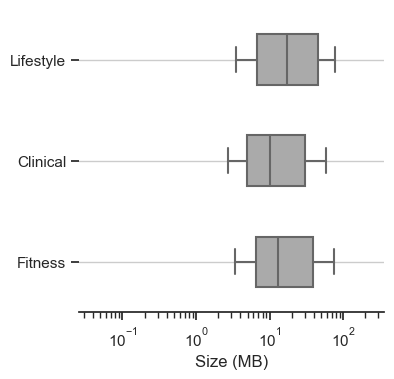

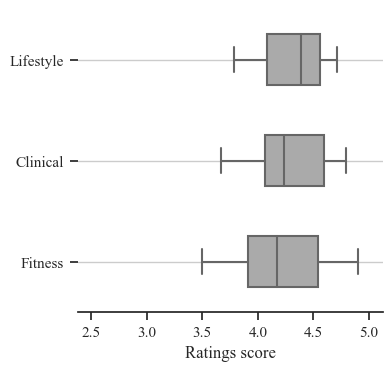

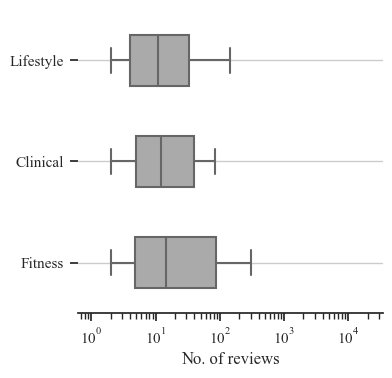

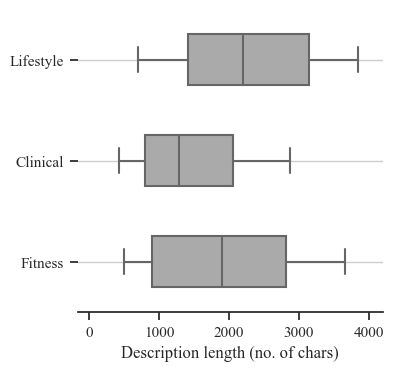

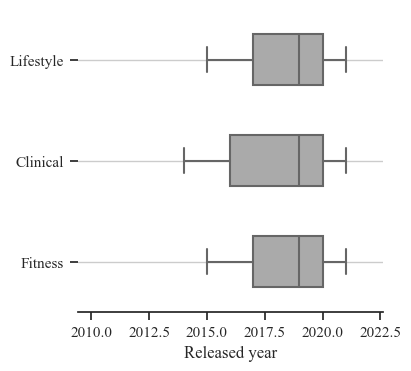

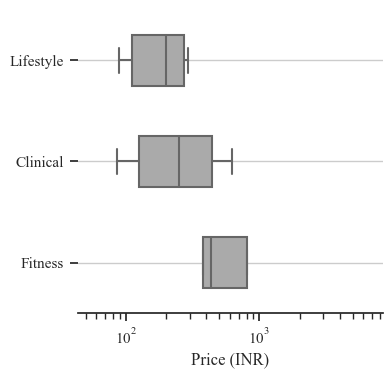

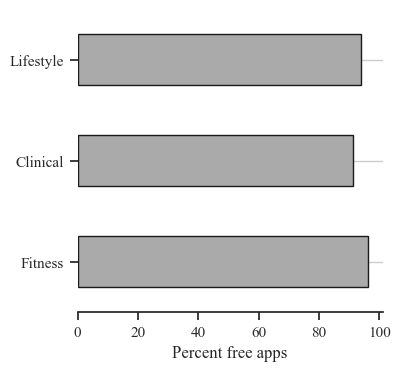

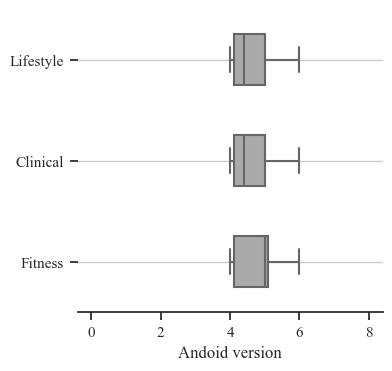

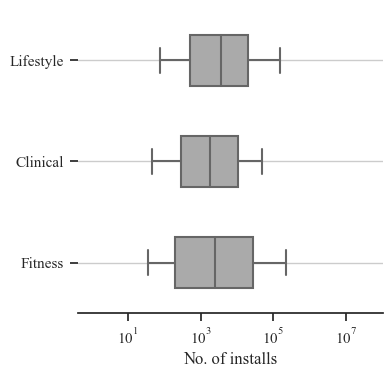

In [72]:
# Boxplots of a few attributes
cm = 1/2.54
os.makedirs("clusters_attributes_distributions", exist_ok=True)
sns.set_theme(style="ticks")

gdf["reviews"] = gdf["reviews"].replace({0: np.nan})
gdf["score"] = gdf["score"].replace({0: np.nan})
gdf["price"] = gdf["price"].replace({0: np.nan})
columns = ["size_mb", "score", "reviews", "description_length", "released_year", "price", "free", "android_2022_major", "installs_2022"]
labels = ["Size (MB)", "Ratings score", "No. of reviews", "Description length (no. of chars)", "Released year", "Price (INR)", "Percent free apps", "Andoid version", "No. of installs"]
log_scale = [True, False, True, False, False, True, False, False, True]

for i, col in enumerate(columns):
    fig, ax = plt.subplots(figsize=(10*cm, 10*cm))
    if col!="free":
        sns.boxplot(data=gdf, y="Cluster", x=col, whis=[10, 90], fliersize=0, color="#aaaaaa", orient="h", width=0.5, ax=ax)
        if log_scale[i]:
            ax.set_xscale('log')
        # sns.stripplot(gdf, y="Cluster", x=col, size=1.5, color=".3")
    else:
        sns.barplot(gdf, y="Cluster", x=col, estimator=lambda x: 100*sum(x)/len(x), width=0.5, color="#aaaaaa", edgecolor="k", errorbar=None)

    # Tweak the visual presentation
    ax.yaxis.grid(True)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("")
    sns.despine(left=True)
    plt.rcParams["font.family"] = "Times New Roman"
    fig.savefig(f"clusters_attributes_distributions/google_{col}.pdf")
